#Estudo de técnicas de aprendizado de máquina para sistema de apoio à decisão do tratamento de câncer de próstata.

CP901TIN2 - Inteligência Artificial

Diogo Pereira Almeida - 210126

João Victor Oliveia Moreira - 211359

João Victor Rosa Tagliarini - 210124


##Análise e pré-processamento

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import ClusterCentroids
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

In [ ]:
df = pd.read_csv('fospfiltered.csv')

<ipython-input-2-b21d60c946ad>:1: DtypeWarning: Columns (26,37,74,75,76,79,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fospfiltered.csv')


In [ ]:
df.head()

INSTITU  ESCOLARI  IDADE  SEXO UFNASC UFRESID       IBGE  \
0   208288         1     66     1     BA      SP  3543907.0   
1    16675         4     81     1     SP      SP  3525904.0   
2   208309         3     50     1     SP      SP  3510005.0   
3   612374         1     74     1     SP      SP  3556453.0   
4     8672         4     62     1     SP      SP  3550308.0   

                   CIDADE  CATEATEND   DTCONSULT  CLINICA  DIAGPREV  \
0               RIO CLARO          1  2014-01-07       24         2   
1                 JUNDIAI          9  2002-09-24       35         2   
2            CANDIDO MOTA          2  2016-11-30       32         2   
3  VARGEM GRANDE PAULISTA          2  2006-12-13       32         2   
4               SAO PAULO          2  2013-09-04       32         1   

       DTDIAG  BASEDIAG  TOPO TOPOGRUP  DESCTOPO  MORFO  \
0  2013-09-04         3  C619      C61  PROSTATA  85503   
1  2002-07-25         3  C619      C61  PROSTATA  81403   
2  2016-11-30         3  C619      C61  PROSTATA  81403   
3  2006-08-02         3  C619      C61  PROSTATA  81403   
4  2013-10-15         3  C619      C61  PROSTATA  85503   

                       DESCMORFO   EC ECGRUP   T  N  M   PT   PN   PM  S  G  \
0  CARCINOMA DE CELULAS ACINOSAS   II     II  1C  0  0  NaN  NaN  NaN  8  2   
1             ADENOCARCINOMA SOE  III    III   3  0  0    X    X    X  8  8   
2             ADENOCARCINOMA SOE  III    III   3  0  0  NaN  NaN  NaN  8  8   
3             ADENOCARCINOMA SOE    X      X   X  X  X    X    X    X  8  9   
4  CARCINOMA DE CELULAS ACINOSAS   II     II  2C  0  0   2C    0    0  8  3   

   LOCALTNM  IDMITOTIC  PSA  GLEASON OUTRACLA META01 META02 META03 META04  \
0         8          8    8        8      NaN    NaN    NaN    NaN    NaN   
1         8          8    8        8      NaN    NaN    NaN    NaN    NaN   
2         8          8    2        3      NaN    NaN    NaN    NaN    NaN   
3         8          8    8        8      NaN    NaN    NaN    NaN    NaN   
4         8          8    8        8      NaN    NaN    NaN    NaN    NaN   

       DTTRAT  NAOTRAT TRATAMENTO TRATHOSP TRATFANTES TRATFAPOS  NENHUM  \
0  2014-01-07        8          B        J          J         B       1   
1  2002-10-11        8          I        I          J         J       0   
2  2016-11-30        8          I        J          J         I       1   
3         NaN        7          J        J          J         J       1   
4  2014-06-18        8          A        A          J         J       0   

   CIRURGIA  RADIO  QUIMIO  HORMONIO  TMO  IMUNO  OUTROS  NENHUMANT  CIRURANT  \
0         0      0       0         0    0      0       0          1         0   
1         0      0       0         1    0      0       0          1         0   
2         0      0       0         0    0      0       0          1         0   
3         0      0       0         0    0      0       0          1         0   
4         1      0       0         0    0      0       0          1         0   

   RADIOANT  QUIMIOANT  HORMOANT  TMOANT  IMUNOANT  OUTROANT  NENHUMAPOS  \
0         0          0         0       0         0         0           0   
1         0          0         0       0         0         0           1   
2         0          0         0       0         0         0           0   
3         0          0         0       0         0         0           1   
4         0          0         0       0         0         0           1   

   CIRURAPOS  RADIOAPOS  QUIMIOAPOS  HORMOAPOS  TMOAPOS  IMUNOAPOS  OUTROAPOS  \
0          0          1           0          0        0          0          0   
1          0          0           0          0        0          0          0   
2          1          1           0          1        0          0          0   
3          0          0           0          0        0          0          0   
4          0          0           0          0        0          0          0   

    DTULTINFO  ULTINFO

In [ ]:
df.shape

(131437, 104)

In [ ]:
df.describe(include='all')

INSTITU       ESCOLARI          IDADE      SEXO  UFNASC UFRESID  \
count   131437.000000  131437.000000  131437.000000  131437.0  131437  131407   
unique            NaN            NaN            NaN       NaN      29      28   
top               NaN            NaN            NaN       NaN      SP      SP   
freq              NaN            NaN            NaN       NaN   78113  121700   
mean    103819.891819       4.524997      67.570646       1.0     NaN     NaN   
std     195425.790146       2.943438       8.837348       0.0     NaN     NaN   
min          4.000000       1.000000       0.000000       1.0     NaN     NaN   
25%      16772.000000       2.000000      62.000000       1.0     NaN     NaN   
50%      20737.000000       3.000000      68.000000       1.0     NaN     NaN   
75%      22950.000000       9.000000      74.000000       1.0     NaN     NaN   
max     928940.000000       9.000000     106.000000       1.0     NaN     NaN   

                IBGE     CIDADE      CATEATEND   DTCONSULT        CLINICA  \
count   1.314070e+05     131407  131437.000000      131437  131437.000000   
unique           NaN       1637            NaN        8184            NaN   
top              NaN  SAO PAULO            NaN  2011-04-13            NaN   
freq             NaN      28518            NaN          72            NaN   
mean    3.551217e+06        NaN       3.815318         NaN      29.232256   
std     3.614777e+05        NaN       3.170833         NaN       7.110790   
min     1.100015e+06        NaN       1.000000         NaN       1.000000   
25%     3.516903e+06        NaN       2.000000         NaN      24.000000   
50%     3.538709e+06        NaN       2.000000         NaN      32.000000   
75%     3.550308e+06        NaN       9.000000         NaN      32.000000   
max     9.999999e+06        NaN       9.000000         NaN      99.000000   

             DIAGPREV      DTDIAG       BASEDIAG    TOPO TOPOGRUP  DESCTOPO  \
count   131437.000000      131437  131437.000000  131437   131437    131437   
unique            NaN        8272            NaN       1        1         1   
top               NaN  2012-07-15            NaN    C619      C61  PROSTATA   
freq              NaN         121            NaN  131437   131437    131437   
mean         1.679375         NaN       2.998417     NaN      NaN       NaN   
std          0.466719         NaN       0.207583     NaN      NaN       NaN   
min          1.000000         NaN       1.000000     NaN      NaN       NaN   
25%          1.000000         NaN       3.000000     NaN      NaN       NaN   
50%          2.000000         NaN       3.000000     NaN      NaN       NaN   
75%          2.000000         NaN       3.000000     NaN      NaN       NaN   
max          2.000000         NaN       9.000000     NaN      NaN       NaN   

                MORFO                      DESCMORFO      EC  ECGRUP       T  \
count   131437.000000                         131437  131437  131437  131437   
unique            NaN                            100      11       6      15   
top               NaN  CARCINOMA DE CELULAS ACINOSAS      II      II      2C   
freq              NaN                          82601   41228   72768   25424   
mean     83993.036451                            NaN     NaN     NaN     NaN   
std       1989.366140                            NaN     NaN     NaN     NaN   
min      80001.000000                            NaN     NaN     NaN     NaN   
25%      81403.000000                            NaN     NaN     NaN     NaN   
50%      85503.000000                            NaN     NaN     NaN     NaN   
75%      85503.000000                            NaN     NaN     NaN     NaN   
max      97293.000000                            NaN     NaN     NaN     NaN   

             N       M     PT     PN     PM         S              G  \
count   131437  131437  49657  48516  43595  131437.0  131437.000000   
unique       4       7     18      7     10       NaN         

In [ ]:
df = df.drop(columns=['CATEATEND','SEXO', 'TOPOGRUP','DESCTOPO', 'TOPO', 'INSTITU', 'ESCOLARI', 'UFNASC', 'UFRESID', 'IBGE', 'CIDADE', 'DTCONSULT', 'CLINICA', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 'ANODIAG', 'FAIXAETAR', 'DRS', 'RRAS', 'DSCINST', 'IBGEATEN', 'DRS_INST', 'RRAS_INST', 'CIDADE_INS', 'HABILIT', 'HABIT11', 'HABILIT1', 'HABILIT2', 'LOCALTNM', 'IDMITOTIC', 'OUTRACLA', 'CICI', 'CICIGRUP', 'CICISUBGRU', 'LATERALI', 'INSTORIG', 'ERRO', 'DTRECIDIVA', 'MORFO', 'DESCMORFO', 'DESCIDO', 'S', 'META01', 'META02', 'META03', 'META04', 'TMOANT', 'TMOAPOS', 'REC01', 'REC02', 'REC03', 'REC04', 'TRATFANTES', 'CIRURANT', 'RADIOANT', 'QUIMIOANT', 'HORMOANT', 'IMUNOANT', 'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'PT', 'PN', 'PM', 'G', 'TRATFAPOS', 'TRATAMENTO', 'NENHUMANT', 'TRATHOSP', 'RECLOCAL', 'RECREGIO', 'RECDIST'])

- Sexo excluído por ser sempre masculino (1);
- TOPOGRUP excluído por ser sempre C61, indicando câncer de próstata;
- DESCTOPO excluído por ser sempre PROSTATA;
- TOPO excluído por sempre ser C619, indicando câncer de próstata;
- INSTITU, ESCOLARI, UFNASC, UFRESID, IBGE, CIDADE, CLINICA, DRS, RRAS, DSCINST, IBGEATEN, DRS_INST, RRAS_INST, CIDADE_INS, HABILIT, HABILIT1, HABILIT2, INSTORIG, CATEATEND removidas para diminuir viés e melhorar generalização;
- DTCONSULT, DTDIAG, DTTRAT, DTULTINFO, ANODIAG, DTRECIDIVA removido por se tratar de um dado temporal passado;
- FAIXAETAR removida por ser apenas um agrupamento da variável IDADE;
- LOCALTNM, IDMITOTIC, LATERALI, S excluídos por ser sempre 8 (Não se aplica);
- OUTRACLA excluído por ter extrema cardinalidade e apenas 11311 linhas preenchidas, ou seja, muitos dados nulos;
- CICI, CICIGRUP e CICISUBGRU excluídas por ter apenas 31 linhas preenchidas;
- ERRO excluída por ser sempre 0 (sem erro);
- MORFO, DESMORFO e DESCIDO excluídas por serem o mesmo dado de CIDO;
- PT, PN, PM excluídas por serem dados pós tratamento;
- META01, META02, META03 e META04 excluídas por terem muitos dados nulos e também serem representadas pela letra M;
- NENHUMANT, CIRURANT, RADIOANT, QUIMIOANT, HORMOANT, TMOANT, IMUNOANT e OUTROANT excluídas por serem sempre 0 (NÃO);
- NENHUMAPOS, CIRURAPOS, RADIOAPOS, QUIMIOAPOS, HORMOAPOS, TMOAPOS, IMUNOAPOS e OUTROAPOS excluídas por serem dados pós-tratamento;
- REC01, REC02, REC03, REC04, RECLOCAL, RECREGIO e RECDIST excluídas por terem muitos dados nulos e serem representadas por RECNENHUM;
- G excluída por ser a mesma coisa que ECGRUP e por ter a maioria dos valores 8 e 9, ou seja, não se aplica ou não determinado;
- TRATAMENTO e TRATHOSP removidas por serem uma classificação pronta do dataset, o qual continha inicialmente muitos outros tipos de câncer, portanto não é a melhor para descrever os agrupamentos mais comuns ao câncer de próstata.


In [ ]:
df.head()

IDADE  DIAGPREV  BASEDIAG   EC ECGRUP   T  N  M  PSA  GLEASON  NAOTRAT  \
0     66         2         3   II     II  1C  0  0    8        8        8   
1     81         2         3  III    III   3  0  0    8        8        8   
2     50         2         3  III    III   3  0  0    2        3        8   
3     74         2         3    X      X   X  X  X    8        8        7   
4     62         1         3   II     II  2C  0  0    8        8        8   

   NENHUM  CIRURGIA  RADIO  QUIMIO  HORMONIO  TMO  IMUNO  OUTROS  ULTINFO  \
0       1         0      0       0         0    0      0       0        2   
1       0         0      0       0         1    0      0       0        4   
2       1         0      0       0         0    0      0       0        1   
3       1         0      0       0         0    0      0       0        3   
4       0         1      0       0         0    0      0       0        3   

   CONSDIAG  TRATCONS  DIAGTRAT  PERDASEG  RECNENHUM     CIDO  
0       125       0.0     125.0         0          1  85503.0  
1        61      17.0      78.0         0          1  81403.0  
2         0       0.0       0.0         0          1  81403.0  
3       133       NaN       NaN         0          1  81403.0  
4        41     287.0     246.0         0          1  85503.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131437 entries, 0 to 131436
Data columns (total 26 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   IDADE      131437 non-null  int64  
 1   DIAGPREV   131437 non-null  int64  
 2   BASEDIAG   131437 non-null  int64  
 3   EC         131437 non-null  object 
 4   ECGRUP     131437 non-null  object 
 5   T          131437 non-null  object 
 6   N          131437 non-null  object 
 7   M          131437 non-null  object 
 8   PSA        131437 non-null  int64  
 9   GLEASON    131437 non-null  int64  
 10  NAOTRAT    131437 non-null  int64  
 11  NENHUM     131437 non-null  int64  
 12  CIRURGIA   131437 non-null  int64  
 13  RADIO      131437 non-null  int64  
 14  QUIMIO     131437 non-null  int64  
 15  HORMONIO   131437 non-null  int64  
 16  TMO        131437 non-null  int64  
 17  IMUNO      131437 non-null  int64  
 18  OUTROS     131437 non-null  int64  
 19  ULTINFO    131437 non-n

DICIONÁRIO

IDADE

DIAGPREV
 - 1 – SEM DIAGNÓSTICO / SEM TRATAMENTO
 - 2 – COM DIAGNÓSTICO / SEM TRATAMENTO
 - 3 – COM DIAGNÓSTICO / COM TRATAMENTO
 - 4 – OUTROS


BASEDIAG
 - 1 – EXAME CLINICO
 - 2 – RECURSOS AUXILIARES NÃO MICROSCÓPICOS
 - 3 – CONFIRMAÇÃO MICROSCÓPICA
 - 9 – SEM INFORMAÇÃO


EC
  - Y significa que a classificação TNM foi feita depois que o paciente já passou por um tratamento inicial, antes da cirurgia, por exemplo, Quimioterapia, Radioterapia ou Terapia-alvo.
  - X significa que não pôde ser avaliado
  - ['II', 'III', 'IV', 'IIA', 'Y', 'X', 'I', 'IIB', 'IA', 'IIIA', 'IB']
  - 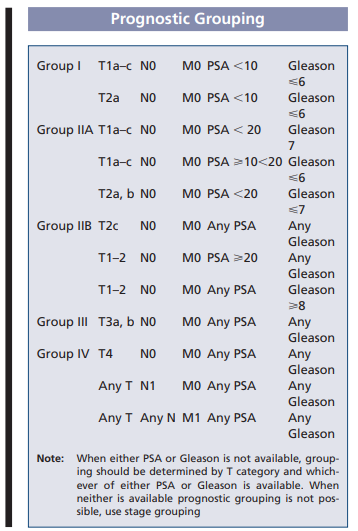

ECGRUP
 - X
 - Y
 - ['II', 'III', 'IV', 'Y', 'X', 'I']
 - 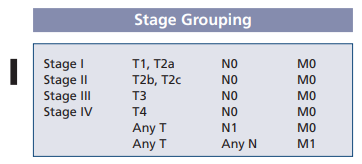

T
 - X
 - Y
 - ['1C', '3', '2C', '3B', '1', '2', '2A', '1A', '2B', 'Y', 'X', '4', '3A', '0', '1B']
 - 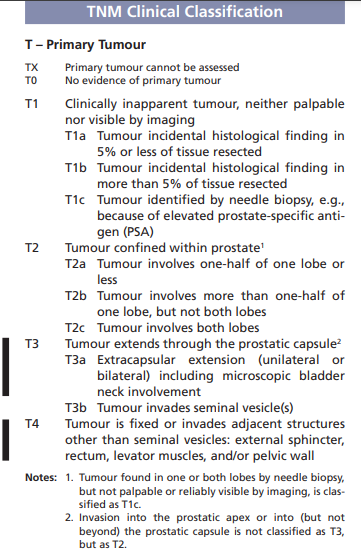

N
 - X
 - Y
 - ['0', '1', 'Y', 'X']
 - 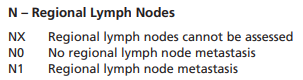

M
 - X
 - Y
 - ['0', '1', 'Y', 'X', '1B', '1C', '1A']
 - 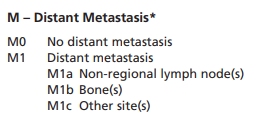

PSA
  - É a sigla para Antígeno Prostático Específico, uma proteína produzida pela próstata. O exame de PSA é um exame de sangue que mede a quantidade de PSA no sangue.
  - 1 – MENOR QUE 10
  - 2 – MAIOR OU IGUAL A 10 E MENOR QUE 20
  - 3 – MAIOR OU IGUAL A 20
  - 8 – NÃO SE APLICA
  - 9 – X

GLEASON
  - A escala de Gleason é um sistema de pontuação que avalia a agressividade do câncer de próstata. Foi desenvolvida pelo patologista americano Donald Gleason na década de 1960.
  - 1 – MENOR OU IGUAL A 6
  - 2 – IGUAL A 7
  - 3 – MAIOR OU IGUAL A 8
  - 8 – NÃO SE APLICA
  - 9 – X

NAOTRAT
 - Código da razão para não realização do tratamento
 - 1 – RECUSA DO TRATAMENTO
 - 2 – DOENÇA AVANÇADA, FALTA DE CONDIÇÕES CLINICAS
 - 3 – OUTRAS DOENÇAS ASSOCIADAS
 - 4 – ABANDONO DE TRATAMENTO
 - 5 – OBITO POR CANCER
 - 6 – OBITO POR OUTRAS CAUSAS, SOE
 - 7 – OUTRAS
 - 8 – NÃO SE APLICA (CASO TENHA TRATAMENTO)
 - 9 – SEM INFORMAÇÃO

NENHUM
 - Nenhum tratamento aplicado
 - 1 - SIM
 - 0 - NÃO

CIRURGIA
 - Cirurgia aplicada
 - 1 - SIM
 - 0 - NÃO

RADIO
 - Radioterapia aplicada
 - 1 - SIM
 - 0 - NÃO

QUIMIO
 - Quimioterapia aplicada
 - 1 - SIM
 - 0 - NÃO

HORMONIO
 - Hormonioterapia aplicada
 - 1 - SIM
 - 0 - NÃO

TMO
 - Transplante de medula óssea aplicada
 - 1 - SIM
 - 0 - NÃO

IMUNO
 - Imunoterapia aplicada
 - 1 - SIM
 - 0 - NÃO

OUTROS
 - Outros tratamentos aplicados
 - 1 - SIM
 - 0 - NÃO  

ULTINFO
 - 1 – VIVO, COM CÂNCER
 - 2 – VIVO, SOE (Sem outras especificações)
 - 3 – OBITO POR CANCER
 - 4 – OBITO POR OUTRAS CAUSAS, SOE (Sem outras especificações)

CONSDIAG
 - Diferença em dias entre as datas de consulta o diagnóstico

TRATCONS
 - Diferença em dias entre as datas de consulta e tratamento

DIAGTRAT
 - Diferença em dias entra as datas de tratamento e diagnóstico

PERDASEG
  - Perda de segmento
  - 0 – Não
  - 1 – Sim
  - 8 – Não se aplica


RECNENHUM
  - Se o paciente teve recidiva
  - 0 – Não
  - 1 – Sim

CID_O
  - Classificação Internacional de Doenças para Oncologia
  - https://fosp.saude.sp.gov.br/fosp/diretoria-adjunta-de-informacao-e-epidemiologia/cid-o/
  - 81403 - Adenocarcinoma, SOE (Sem outra especificação) - O termo adenocarcinoma indica que o tumor se origina em células glandulares. Sem outra especificação significa que não há detalhes adicionais sobre o subtipo específico do adenocarcinoma.
  - 85503 - Carcinoma de células acinosas - É o tipo mais comum de câncer de próstata (cerca de 95% dos casos). Origina-se nas células acinosas da glândula prostática, responsáveis pela produção do fluido prostático. É um subtipo específico de adenocarcinoma.

Tratativa de valores nulos

Para o CIDO, como é apenas um valor, decidimos colocar a moda

In [ ]:
df["CIDO"].fillna(df["CIDO"].mode().iloc[0], inplace=True)

<ipython-input-9-396d7a8f92fc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CIDO"].fillna(df["CIDO"].mode().iloc[0], inplace=True)


Pelo dicionário de dados, há uma suspeita de que TRATCONS e DIAGTRAT são nulas quando não foi aplicado nenhum tratamento

In [ ]:
df[["TRATCONS", "DIAGTRAT"]].isna().sum()

TRATCONS    9754
DIAGTRAT    9754
dtype: int64

In [ ]:
(df["TRATCONS"].isna() & (df["NENHUM"] != 1)).sum()

np.int64(0)

In [ ]:
(df["DIAGTRAT"].isna() & (df["NENHUM"] != 1)).sum()

np.int64(0)

Confirmada a hipótese, vamos colocar o valor 0, já que não queremos apagar essas linhas, por NENHUM tratamento também ser uma forma válida de lidar com a doença

In [ ]:
df[["TRATCONS", "DIAGTRAT"]] = df[["TRATCONS", "DIAGTRAT"]].fillna(0)

Em sequência, iremos apenas selecionar os casos bem sucedidos do dataset, ou seja, que não tiveram perda de segmento e não tiveram recidiva

In [ ]:
df.shape

(131437, 26)

In [ ]:
df = df[df['PERDASEG'] == 0]
df = df[df['RECNENHUM'] == 1]
df = df.drop(columns=['PERDASEG','RECNENHUM'])

Selecionaremos apenas as pessoas que não faleceram pelo câncer

In [ ]:
df = df[df['ULTINFO'] != 3]
df = df.drop(columns=['ULTINFO'])

Não incluiremos na análise as pessoas que recusaram o tratamento, abandonaram ele ou faleceram pelo câncer

In [ ]:
df = df[~df['NAOTRAT'].isin([1, 4, 5])].copy()
df = df.drop(columns=['NAOTRAT'])

Não consideraremos os valores Y das colunas T, N e M, já que é uma classificação pós tratamento

In [ ]:
df = df[(df['T'] != 'Y') & (df['N'] != 'Y') & (df['M'] != 'Y')]

In [ ]:
df.shape

(84954, 22)

Para definição das classes alvos, foi realizada uma revisão de literatura e separadas da seguinte forma

In [ ]:
trat_cols = ['CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO', 'IMUNO', 'OUTROS']
def custom_treatment(row):
    if row['NENHUM'] == 1:
        return 'NENHUM'
    if row['OUTROS'] == 1:
        return 'OUTROS'
    if row['IMUNO'] == 1:
        return 'OUTROS'
    if row['TMO'] == 1:
        return 'OUTROS'
    if row['QUIMIO'] == 1:
        return 'QUIMIO + OUTRAS MODALIDADES'
    tratamentos = [col for col in trat_cols if row[col] == 1]
    if not tratamentos:
        return 'NENHUM'
    return ' + '.join(tratamentos) if tratamentos else ''
df['TRATAMENTO'] = df.apply(custom_treatment, axis=1)
df = df.drop(columns=['NENHUM','CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO', 'IMUNO', 'OUTROS'])

<ipython-input-21-15facc808c86>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


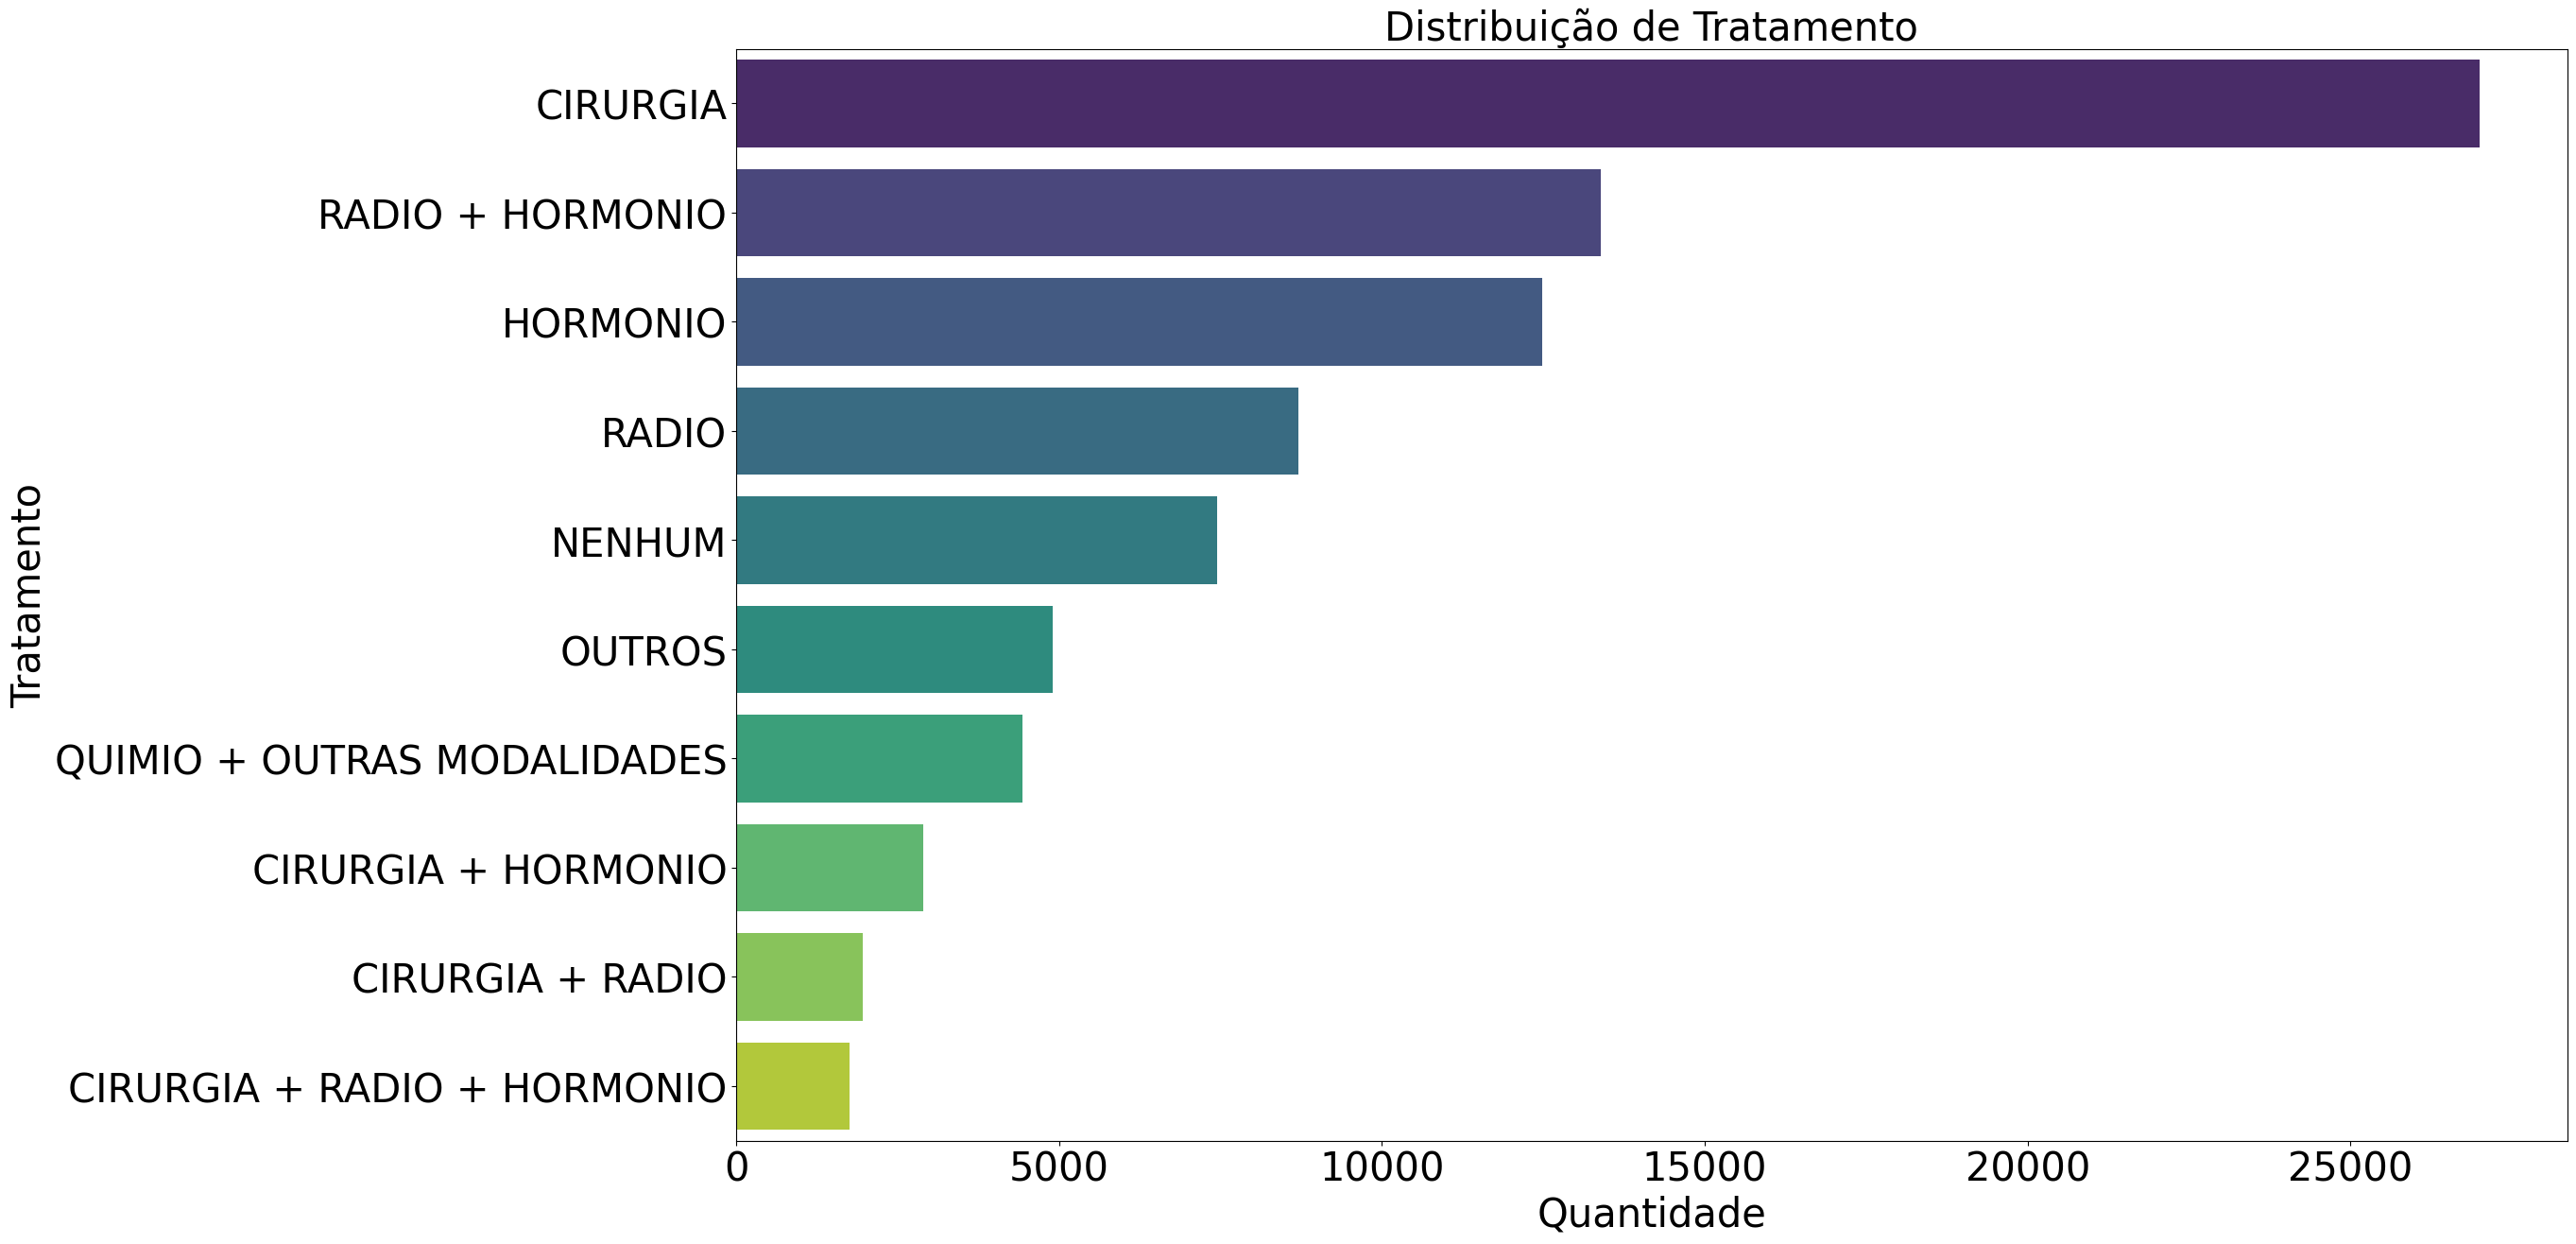

TRATAMENTO
CIRURGIA                       27006
RADIO + HORMONIO               13382
HORMONIO                       12477
RADIO                           8706
NENHUM                          7444
OUTROS                          4896
QUIMIO + OUTRAS MODALIDADES     4434
CIRURGIA + HORMONIO             2900
CIRURGIA + RADIO                1953
CIRURGIA + RADIO + HORMONIO     1756
TRATAMENTO
CIRURGIA                       31.788968
RADIO + HORMONIO               15.752054
HORMONIO                       14.686772
RADIO                          10.247899
NENHUM                          8.762389
OUTROS                          5.763119
QUIMIO + OUTRAS MODALIDADES     5.219295
CIRURGIA + HORMONIO             3.413612
CIRURGIA + RADIO                2.298891
CIRURGIA + RADIO + HORMONIO     2.067001


In [ ]:
tratamento_counts = df['TRATAMENTO'].value_counts().sort_values(ascending=False)

tratamento_df = tratamento_counts.reset_index()
tratamento_df.columns = ['Tratamento', 'Quantidade']

plt.figure(figsize=(25, 15))
sns.barplot(
    data=tratamento_df,
    y='Tratamento',
    x='Quantidade',
    palette="viridis"
)

plt.ylabel("Tratamento", fontsize=30)
plt.xlabel("Quantidade", fontsize=30)
plt.title("Distribuição de Tratamento", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()

print(tratamento_counts.to_string())

porcentagem = (df['TRATAMENTO'].value_counts(normalize=True)
                .sort_values(ascending=False) * 100)
print(porcentagem.to_string())

Percebe-se a predominância de casos cirúrgicos, seguido de radioterapia junto de hormonioterapia, apenas hormonioterapia e apenas radio.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84954 entries, 0 to 131436
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IDADE       84954 non-null  int64  
 1   DIAGPREV    84954 non-null  int64  
 2   BASEDIAG    84954 non-null  int64  
 3   EC          84954 non-null  object 
 4   ECGRUP      84954 non-null  object 
 5   T           84954 non-null  object 
 6   N           84954 non-null  object 
 7   M           84954 non-null  object 
 8   PSA         84954 non-null  int64  
 9   GLEASON     84954 non-null  int64  
 10  CONSDIAG    84954 non-null  int64  
 11  TRATCONS    84954 non-null  float64
 12  DIAGTRAT    84954 non-null  float64
 13  CIDO        84954 non-null  float64
 14  TRATAMENTO  84954 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 10.4+ MB


Análise individual de cada coluna

<ipython-input-23-5b91ff614068>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=idade_counts.index, y=idade_counts.values, palette="viridis")


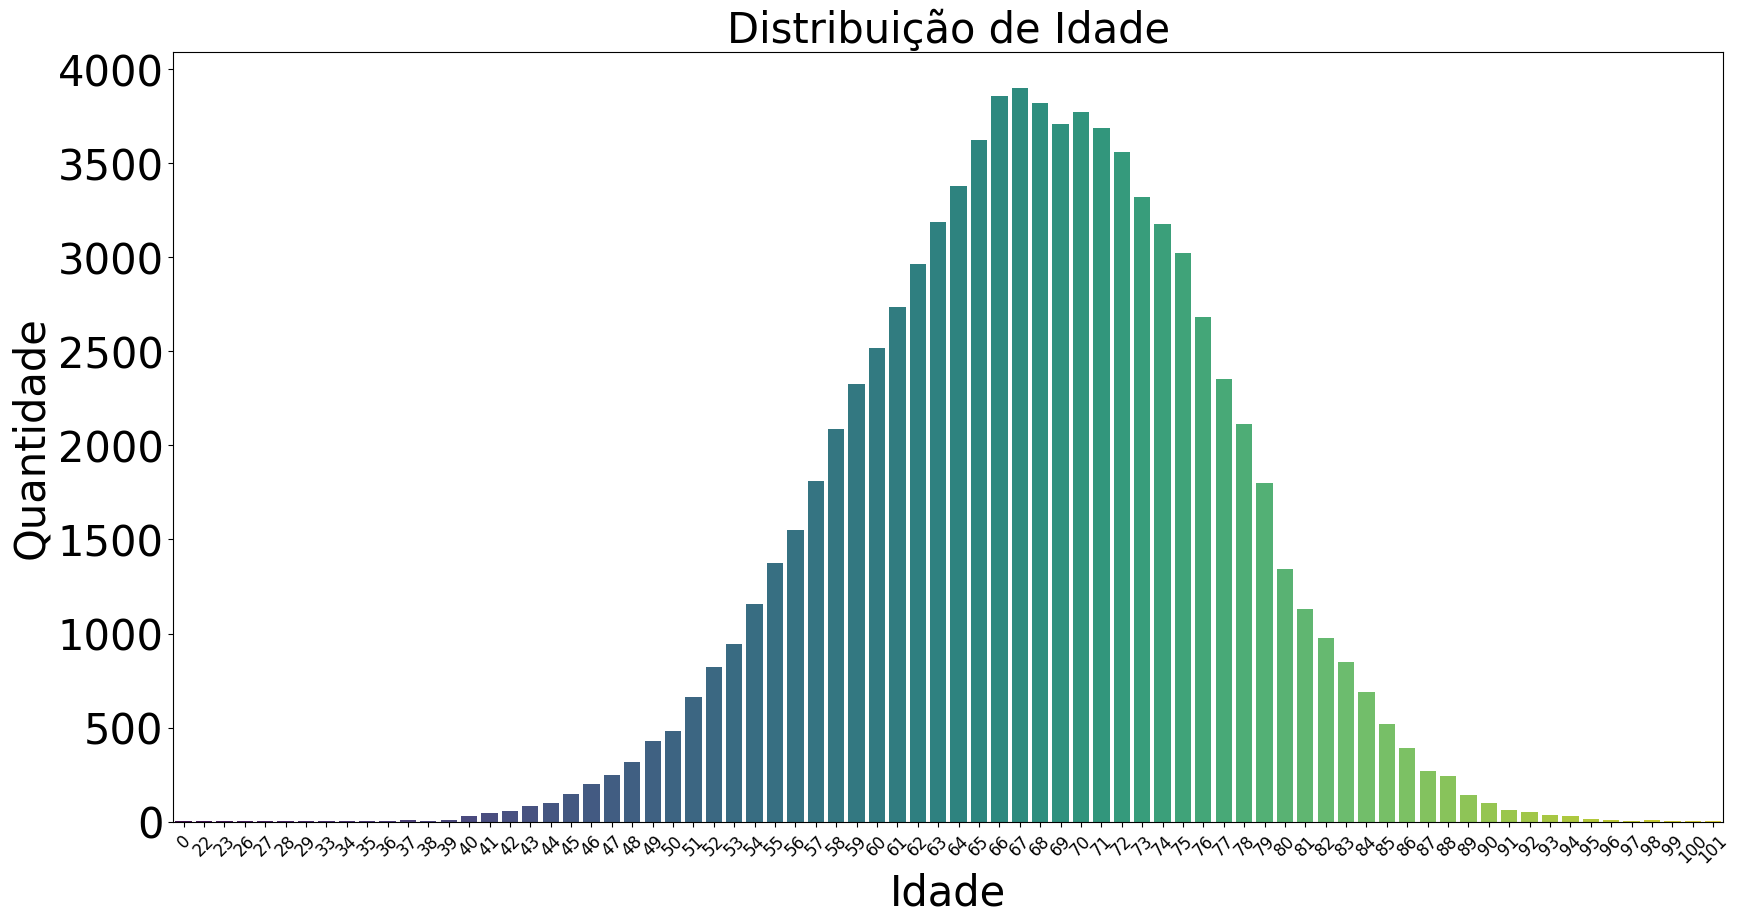

IDADE
0         1
22        1
23        1
26        1
27        1
28        1
29        1
33        2
34        5
35        2
36        3
37        6
38        2
39       10
40       28
41       45
42       55
43       81
44       96
45      144
46      202
47      247
48      315
49      429
50      484
51      660
52      822
53      946
54     1155
55     1377
56     1551
57     1812
58     2086
59     2328
60     2518
61     2734
62     2963
63     3187
64     3379
65     3626
66     3860
67     3900
68     3824
69     3708
70     3771
71     3686
72     3563
73     3321
74     3178
75     3021
76     2685
77     2351
78     2114
79     1801
80     1343
81     1129
82      977
83      850
84      688
85      521
86      392
87      270
88      240
89      142
90      100
91       63
92       49
93       34
94       28
95       13
96        8
97        4
98        7
99        2
100       2
101       2


In [ ]:
idade_counts = df.IDADE.value_counts().sort_index()

plt.figure(figsize=(20, 10))
sns.barplot(x=idade_counts.index, y=idade_counts.values, palette="viridis")

plt.xlabel("Idade", fontsize=30)
plt.ylabel("Quantidade", fontsize=30)
plt.title("Distribuição de Idade", fontsize=30)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=30)

plt.show()
print(df.IDADE.value_counts().sort_index().to_string())

Remoção de outliers de idade, de maneira que serão considerados apenas aquelas maiores ou iguais a 10. Então o intervalo seria de 39 a 95 anos, justamente o intervalo de maioria dos casos observados na literatura

In [ ]:
df = df[(df["IDADE"] >= 39) & (df["IDADE"] <= 95)]

<ipython-input-25-d309821563a4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnostico_e_tratamento_anterior_counts.index, y=diagnostico_e_tratamento_anterior_counts.values, palette="viridis")


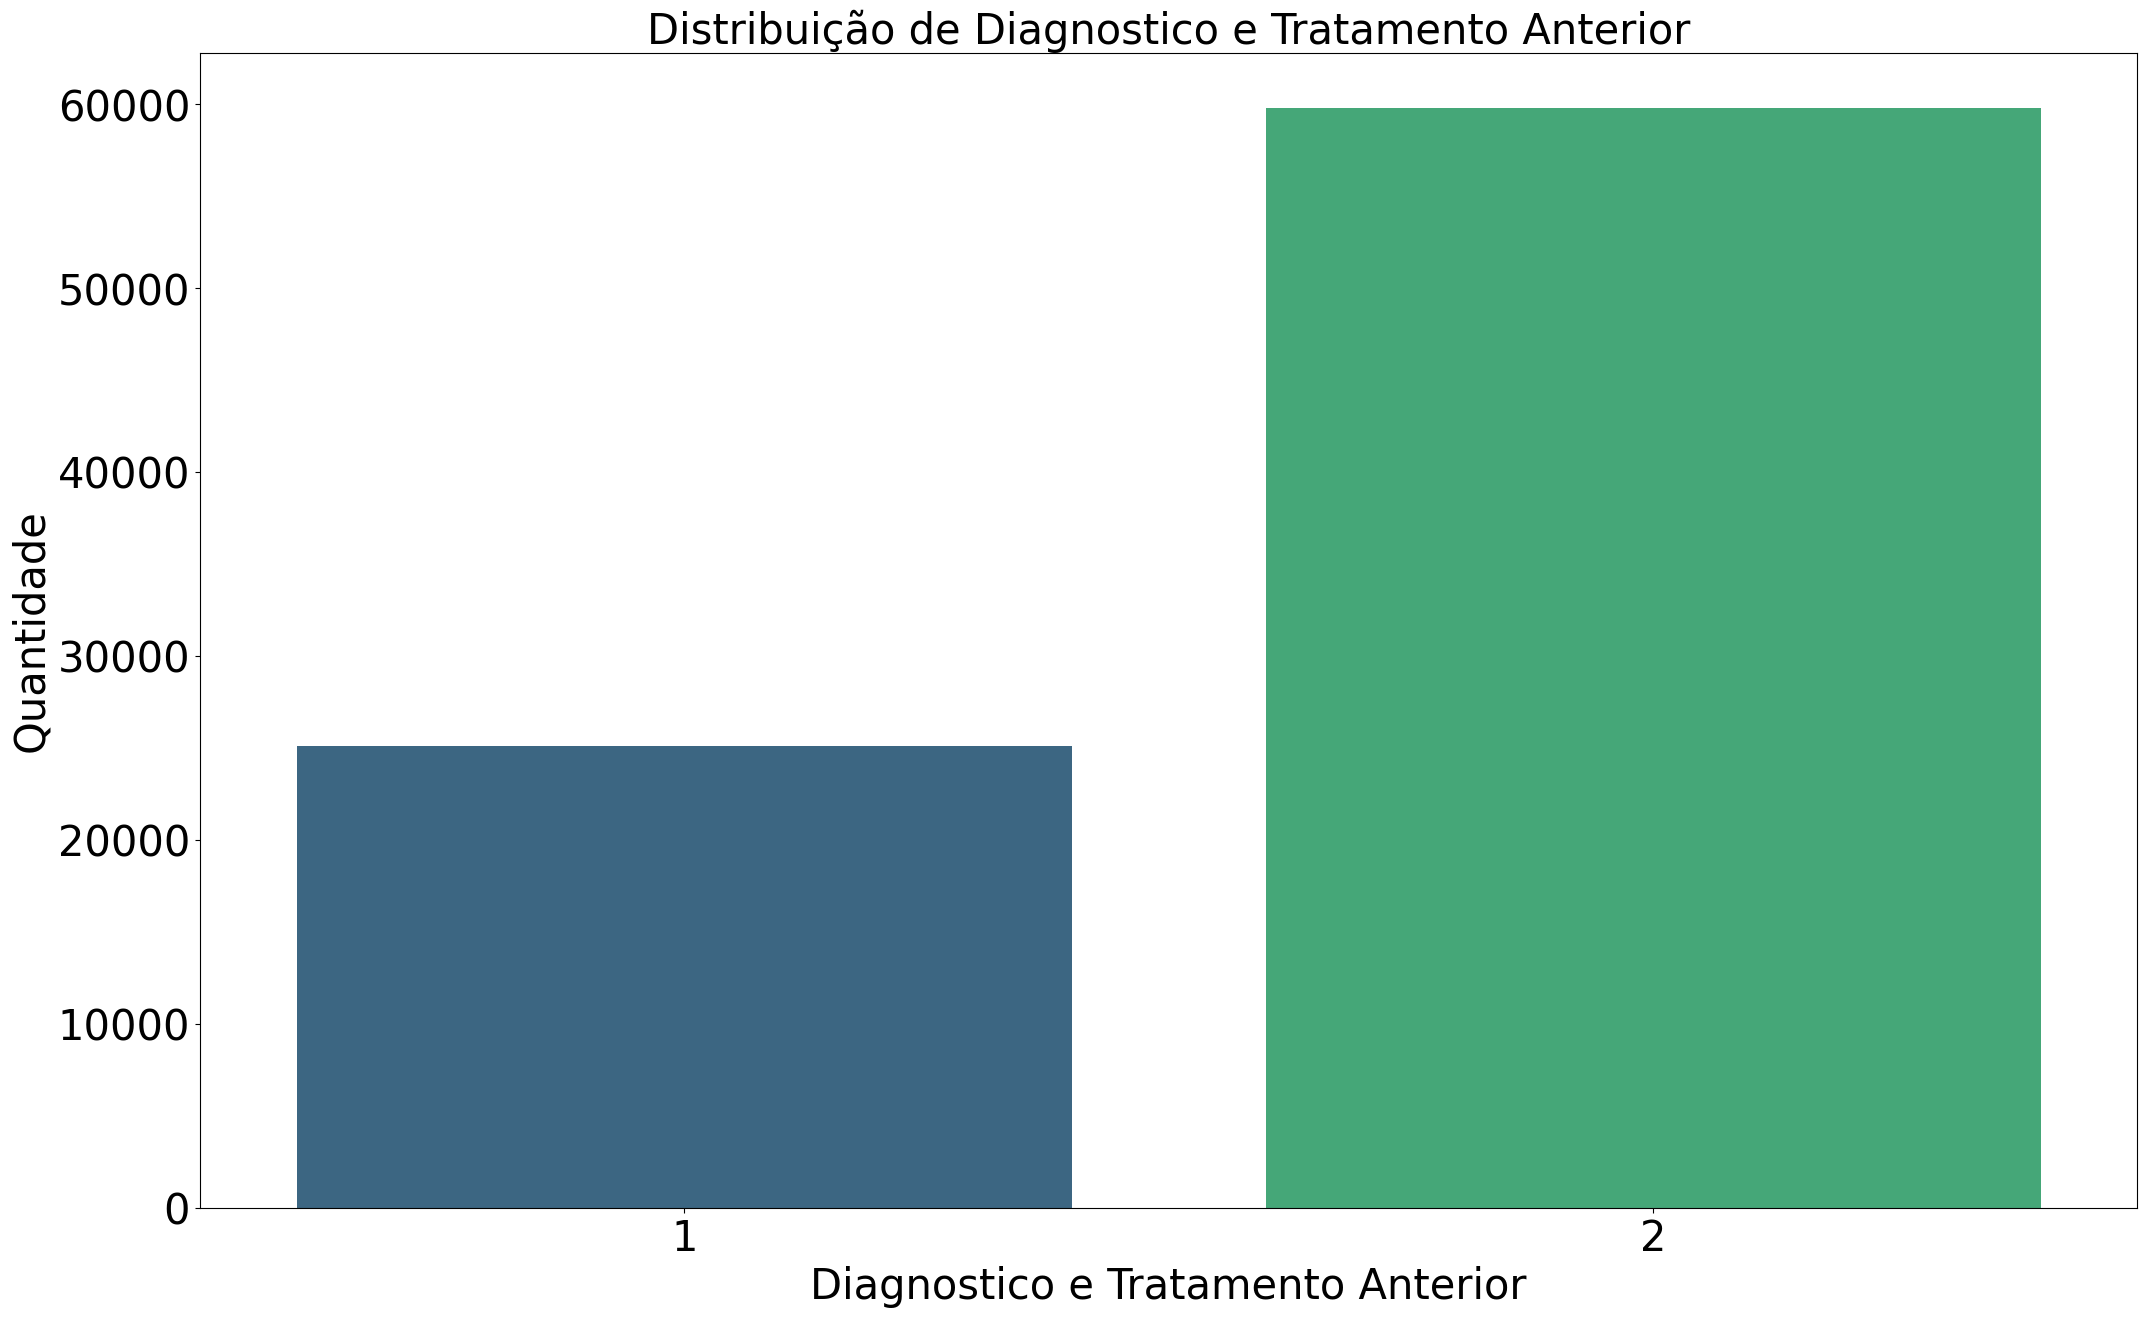

DIAGPREV
1    25101
2    59801


In [ ]:
diagnostico_e_tratamento_anterior_counts = df.DIAGPREV.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=diagnostico_e_tratamento_anterior_counts.index, y=diagnostico_e_tratamento_anterior_counts.values, palette="viridis")

plt.xlabel("Diagnostico e Tratamento Anterior", fontsize=30)
plt.ylabel("Quantidade", fontsize=30)
plt.title("Distribuição de Diagnostico e Tratamento Anterior", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()
print(df.DIAGPREV.value_counts().sort_index().to_string())

Por DIAGPREV ter apenas duas classes, será transformada em booleana, com 2 sendo como True, indicando a ocorrência de diagnóstico anterior e 1 como False, indicando o contrário

In [ ]:
df['DIAGPREV'] = df['DIAGPREV'].replace({2: True, 1: False}).astype(bool)

<ipython-input-26-71433323da89>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DIAGPREV'] = df['DIAGPREV'].replace({2: True, 1: False}).astype(bool)


<ipython-input-27-3fa7a07a10ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=codigo_base_diagnostico_counts.index, y=codigo_base_diagnostico_counts.values, palette="viridis")


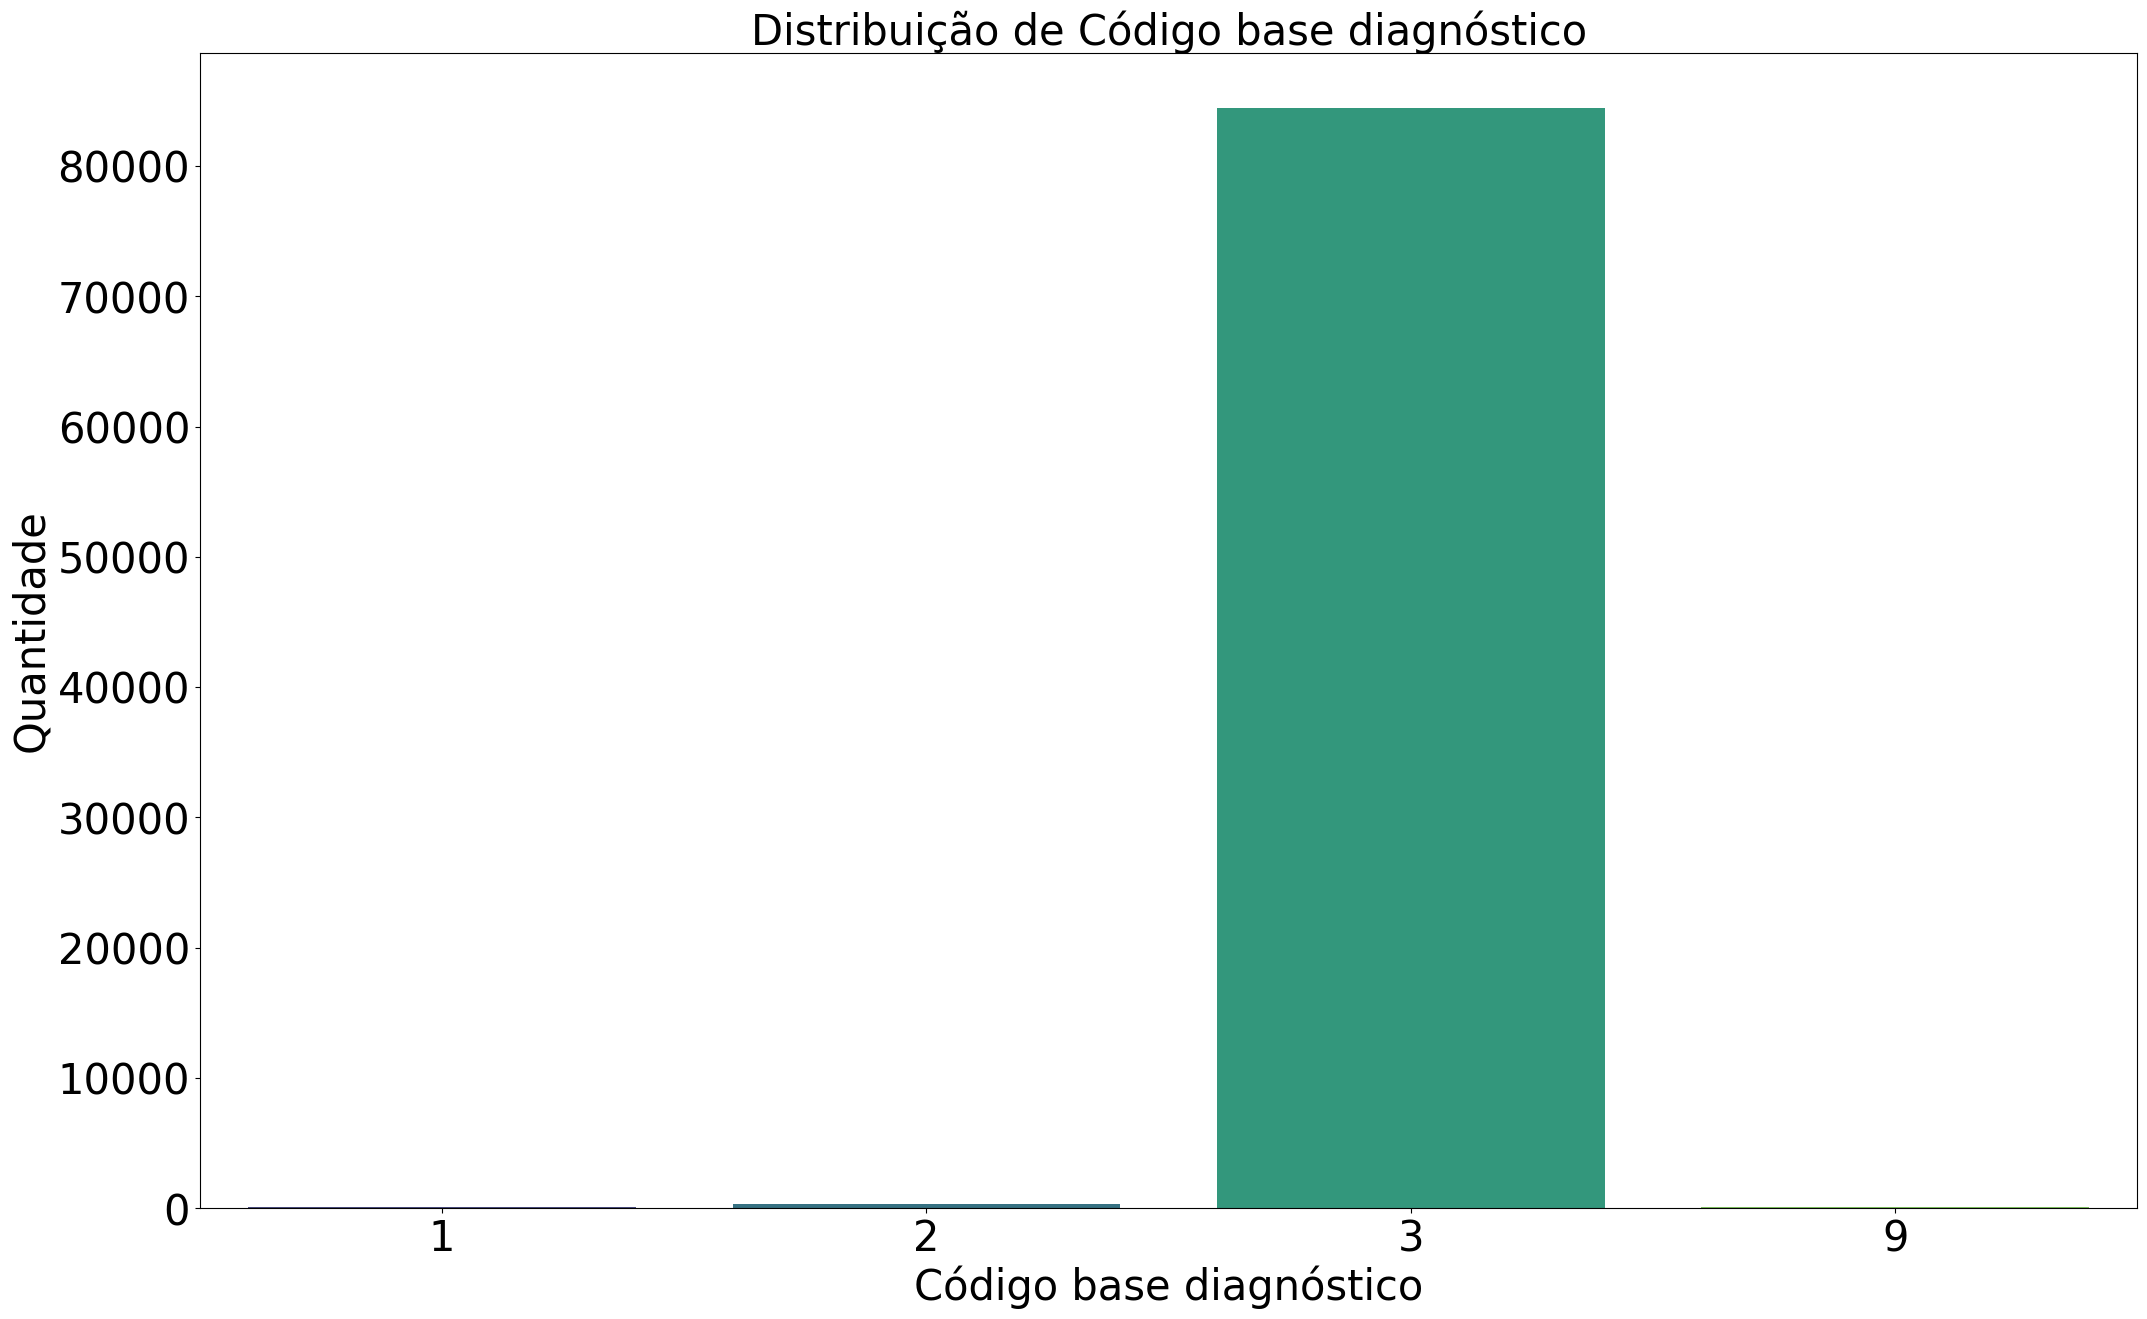

BASEDIAG
1       76
2      318
3    84432
9       76


In [ ]:
codigo_base_diagnostico_counts = df.BASEDIAG.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=codigo_base_diagnostico_counts.index, y=codigo_base_diagnostico_counts.values, palette="viridis")

plt.xlabel("Código base diagnóstico", fontsize=30)
plt.ylabel("Quantidade", fontsize=30)
plt.title("Distribuição de Código base diagnóstico", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()
print(df.BASEDIAG.value_counts().sort_index().to_string())

No cenário de base de diagnóstico, a grande maioria é de Confirmação Microscópica.

<ipython-input-28-80a1de73113a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estadio_clinico_counts.index, y=estadio_clinico_counts.values, palette="viridis")


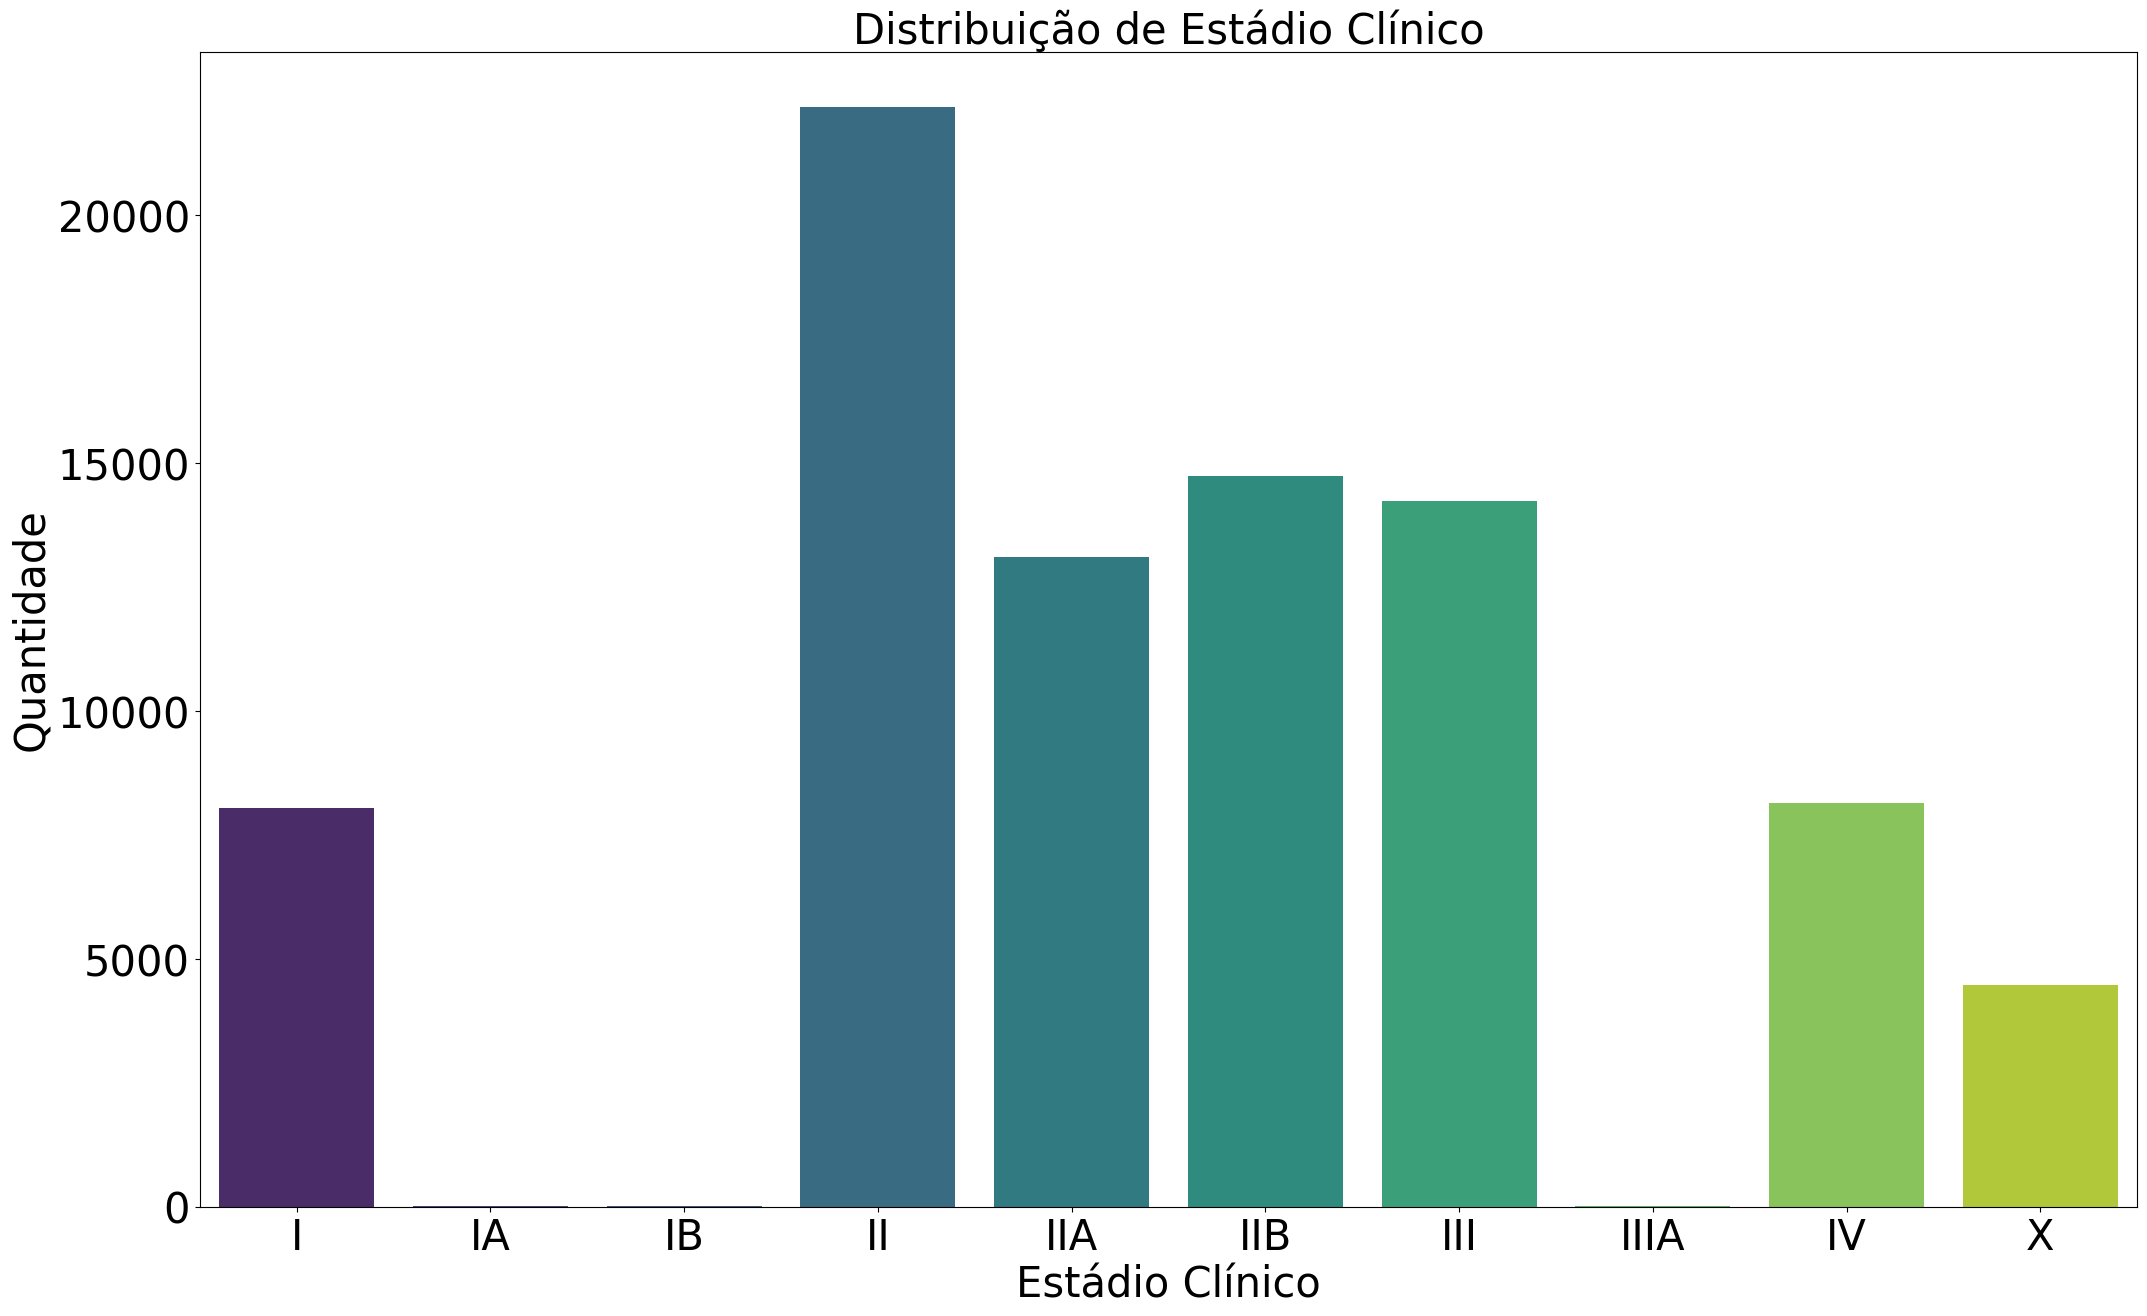

EC
I        8032
IA         13
IB         21
II      22178
IIA     13093
IIB     14726
III     14221
IIIA        8
IV       8144
X        4466


In [ ]:
estadio_clinico_counts = df.EC.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=estadio_clinico_counts.index, y=estadio_clinico_counts.values, palette="viridis")

plt.xlabel("Estádio Clínico", fontsize=30)
plt.ylabel("Quantidade", fontsize=30)
plt.title("Distribuição de Estádio Clínico", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()
print(df.EC.value_counts().sort_index().to_string())

Percebe-se pela análise do estadio clínico, que a maioria dos casos se encontram no grupo II em geral, seguido do III, I e IV.

<ipython-input-29-d2fd4ed89fd1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grupo_estadio_clinico_counts.index, y=grupo_estadio_clinico_counts.values, palette="viridis")


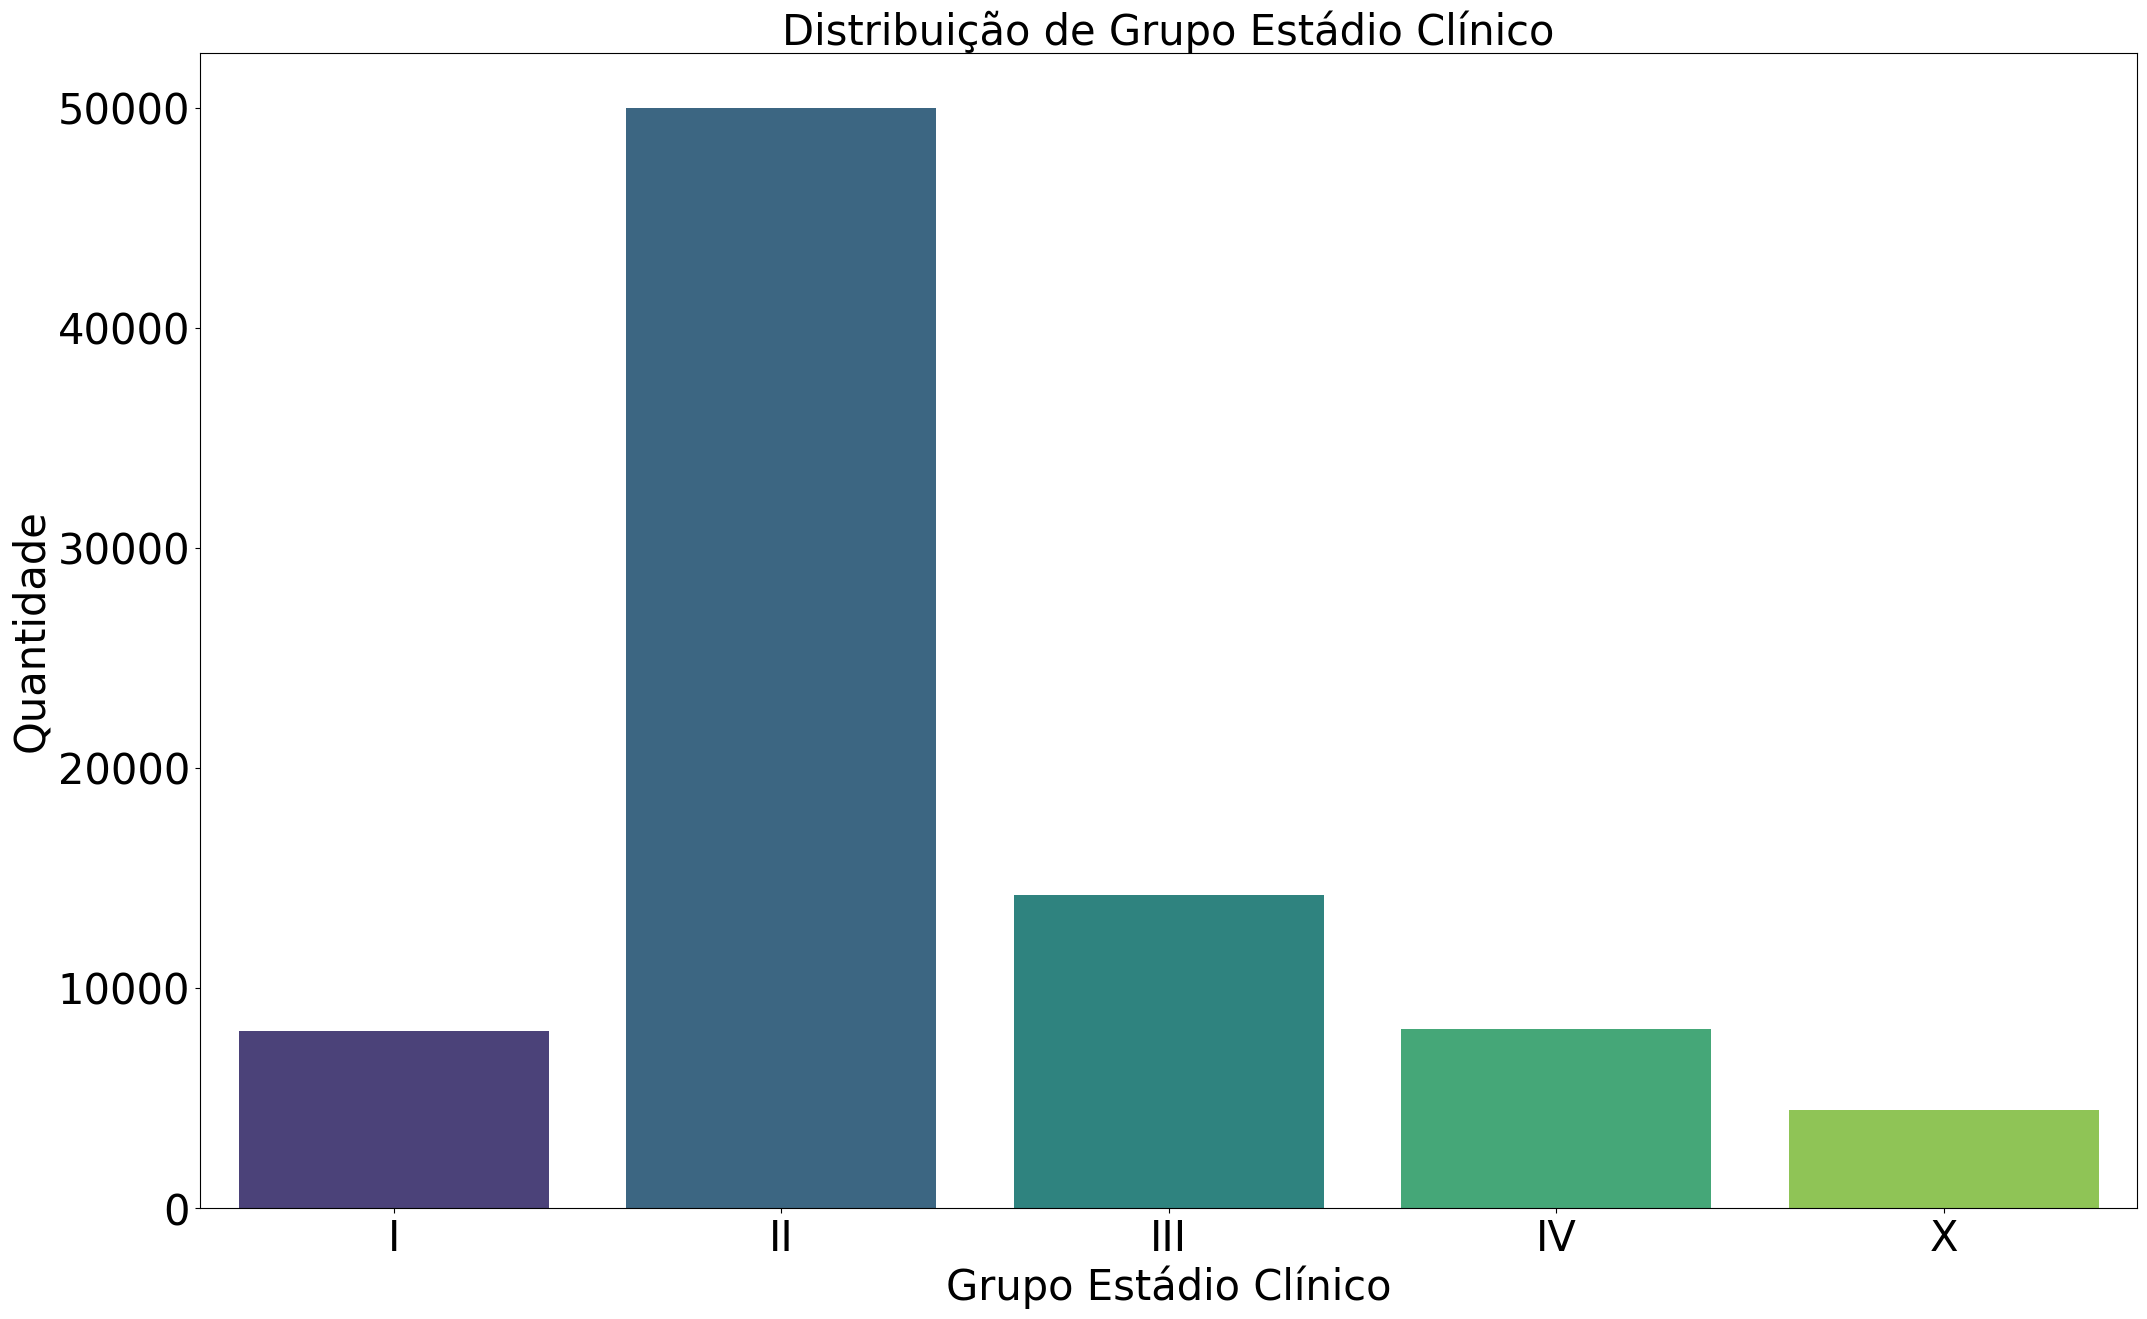

ECGRUP
I       8066
II     49997
III    14229
IV      8144
X       4466


In [ ]:
grupo_estadio_clinico_counts = df.ECGRUP.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=grupo_estadio_clinico_counts.index, y=grupo_estadio_clinico_counts.values, palette="viridis")

plt.xlabel("Grupo Estádio Clínico", fontsize=30)
plt.ylabel("Quantidade", fontsize=30)
plt.title("Distribuição de Grupo Estádio Clínico", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()
print(df.ECGRUP.value_counts().sort_index().to_string())

Para o grupo de estadiamento clínico, é possível ver o mesmo comportamento

<class 'pandas.core.frame.DataFrame'>
Index: 84902 entries, 0 to 131436
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   EC_I        84902 non-null  bool 
 1   EC_IA       84902 non-null  bool 
 2   EC_IB       84902 non-null  bool 
 3   EC_II       84902 non-null  bool 
 4   EC_IIA      84902 non-null  bool 
 5   EC_IIB      84902 non-null  bool 
 6   EC_III      84902 non-null  bool 
 7   EC_IIIA     84902 non-null  bool 
 8   EC_IV       84902 non-null  bool 
 9   EC_X        84902 non-null  bool 
 10  ECGRUP_I    84902 non-null  bool 
 11  ECGRUP_II   84902 non-null  bool 
 12  ECGRUP_III  84902 non-null  bool 
 13  ECGRUP_IV   84902 non-null  bool 
 14  ECGRUP_X    84902 non-null  bool 
dtypes: bool(15)
memory usage: 1.9 MB


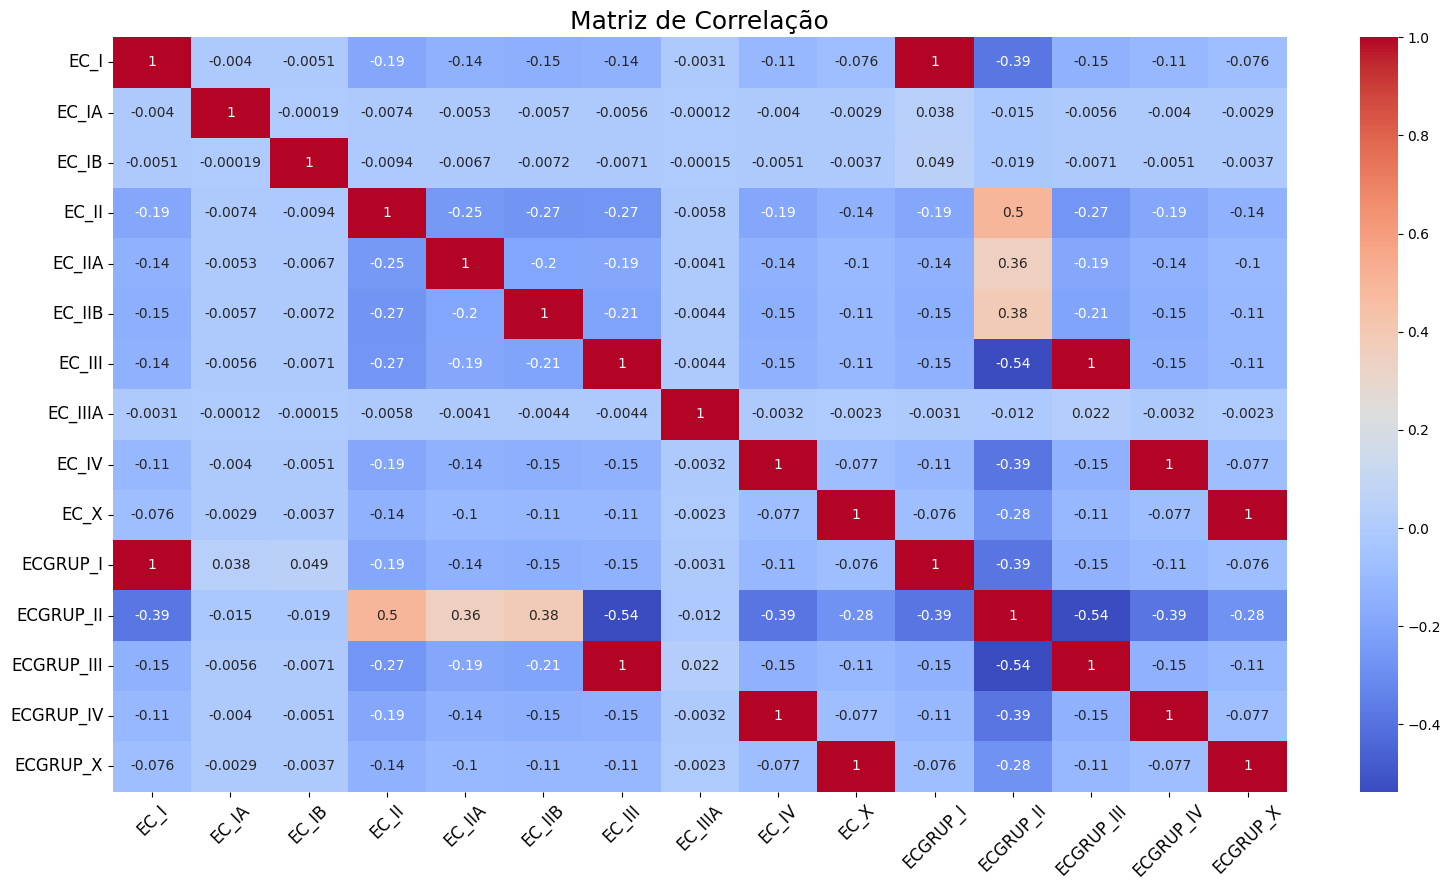

In [ ]:
df_corr_encoded = pd.get_dummies(df[['EC', 'ECGRUP']], prefix=['EC', 'ECGRUP'])
df_corr_encoded.info()

plt.figure(figsize=(16, 9))

sns.heatmap(df_corr_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação', fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Como ECGRUP corresponde exatamente as descrições de EC, a coluna será removida pela redundância

In [ ]:
df = df.drop(columns=['ECGRUP'])

<ipython-input-32-d806473b474c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tnm_t_counts.index, y=tnm_t_counts.values, palette="viridis")


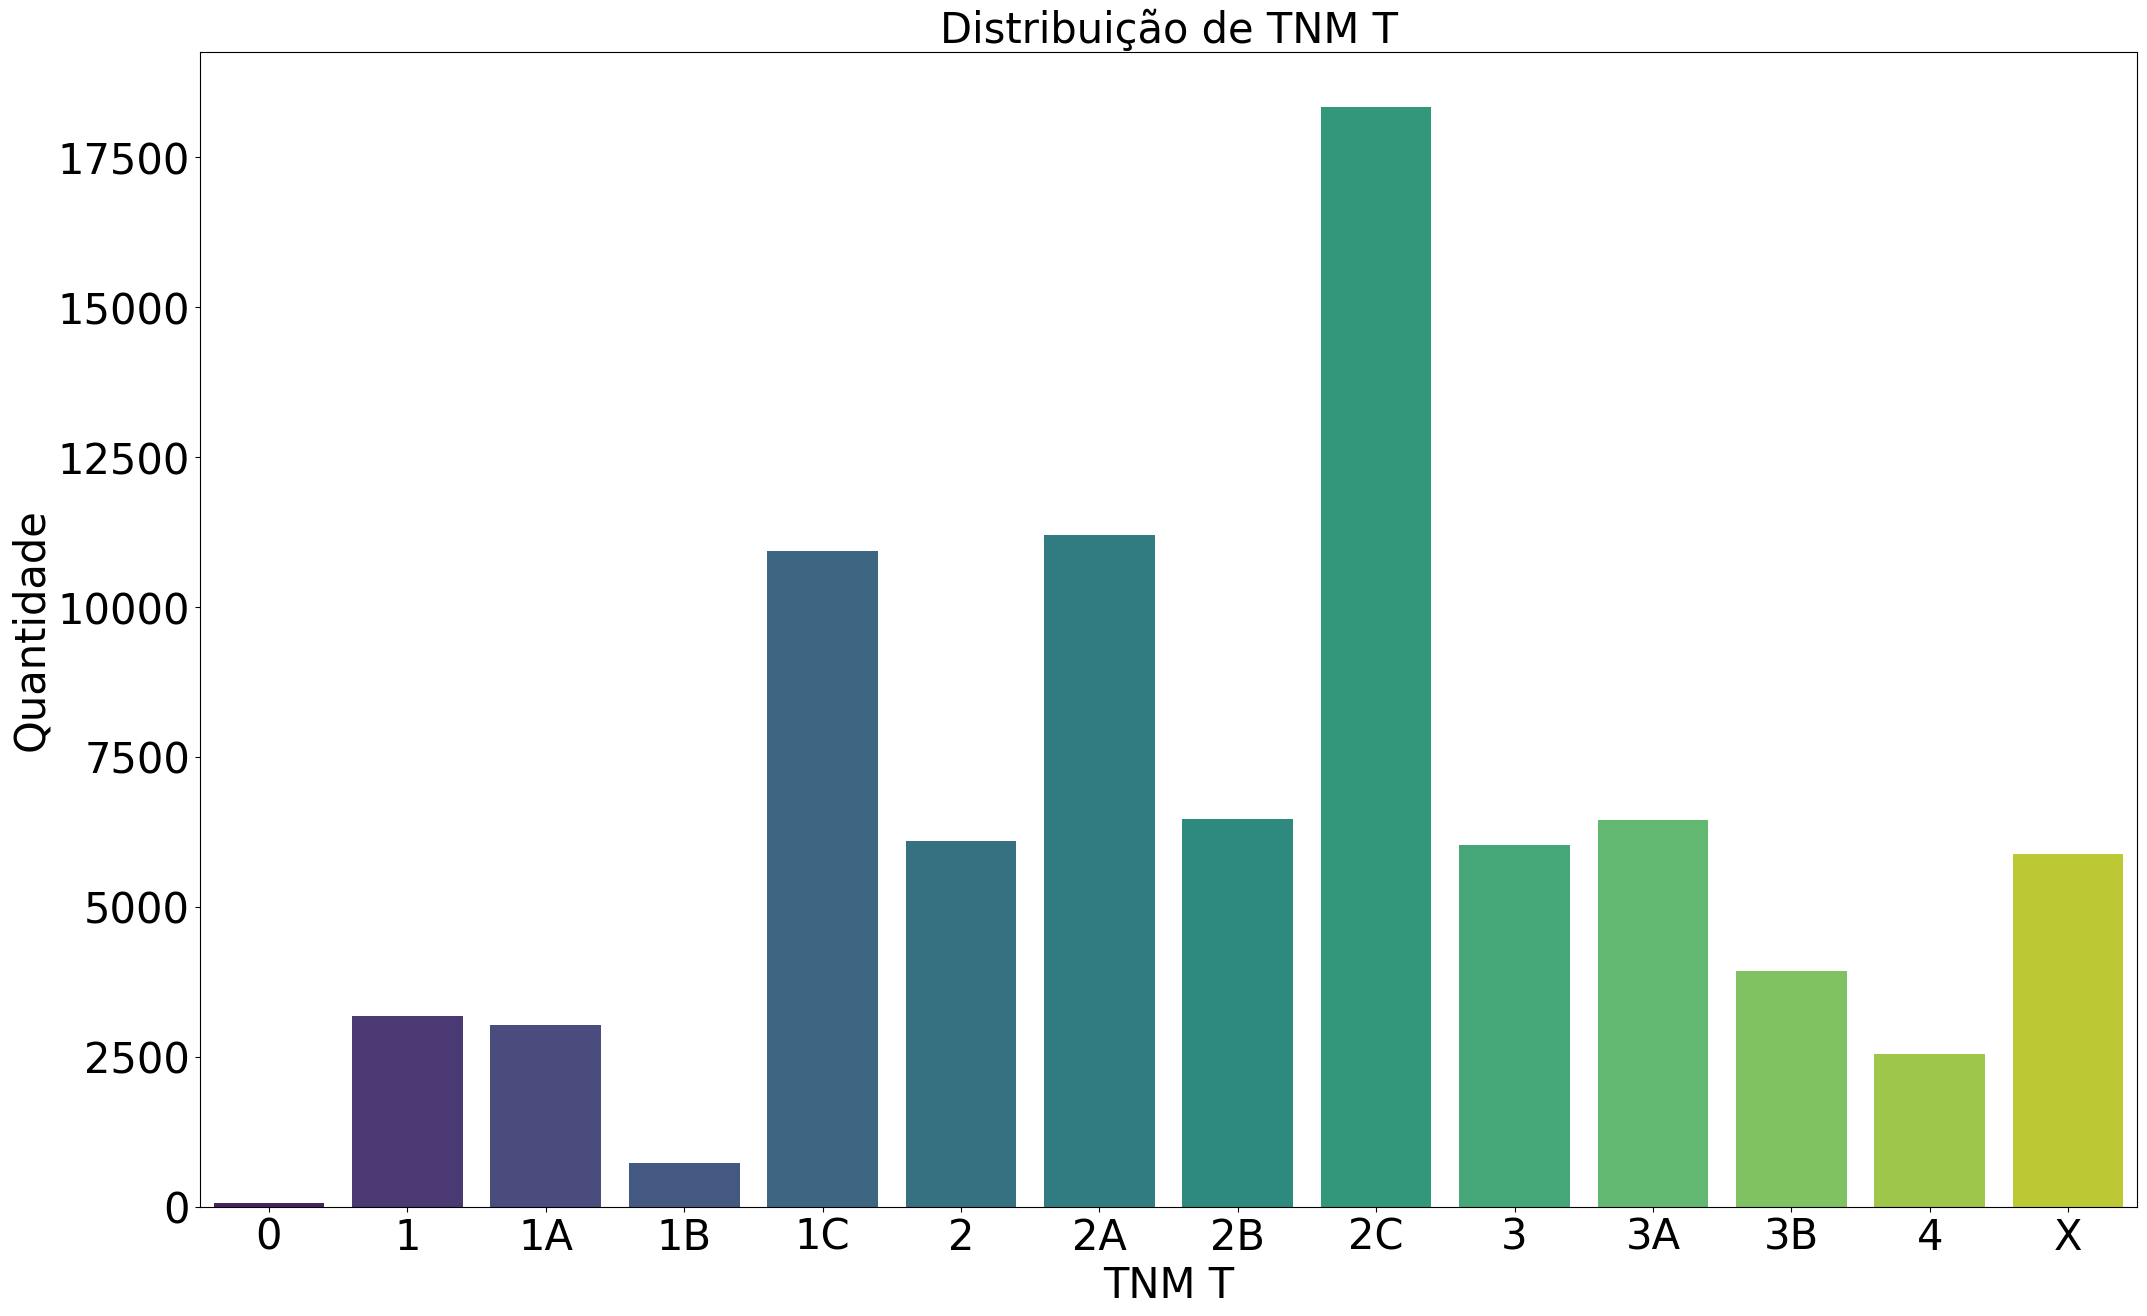

T
0        62
1      3186
1A     3036
1B      737
1C    10938
2      6091
2A    11198
2B     6457
2C    18341
3      6036
3A     6454
3B     3937
4      2540
X      5889


In [ ]:
tnm_t_counts = df["T"].value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=tnm_t_counts.index, y=tnm_t_counts.values, palette="viridis")

plt.xlabel("TNM T", fontsize=30)
plt.ylabel("Quantidade", fontsize=30)
plt.title("Distribuição de TNM T", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()
print(df["T"].value_counts().sort_index().to_string())

Pelo gráfico, percebe-se a maior quantidade de 2C, quando o tumor atinge os dois hemisférios da próstata, seguido de 2A, quando o tumor ocupa 1/4 do volume do órgão e 1C, quando o tumor não é detectável por toque ou imagens, mas foi percebido pela biópsia ou alto PSA. Os menors são 1B, quando a amostra retirada tem mais de 5% do tecido comprometido, e 4, os casos mais graves nos quais ocorrem metástase

In [ ]:
df = df[df['T'] != '0']

Como T0 indica que não foi detectado tumor, serão excluídos da análise

<ipython-input-34-9a7f45cfdf91>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tnm_n_counts.index, y=tnm_n_counts.values, palette="viridis")


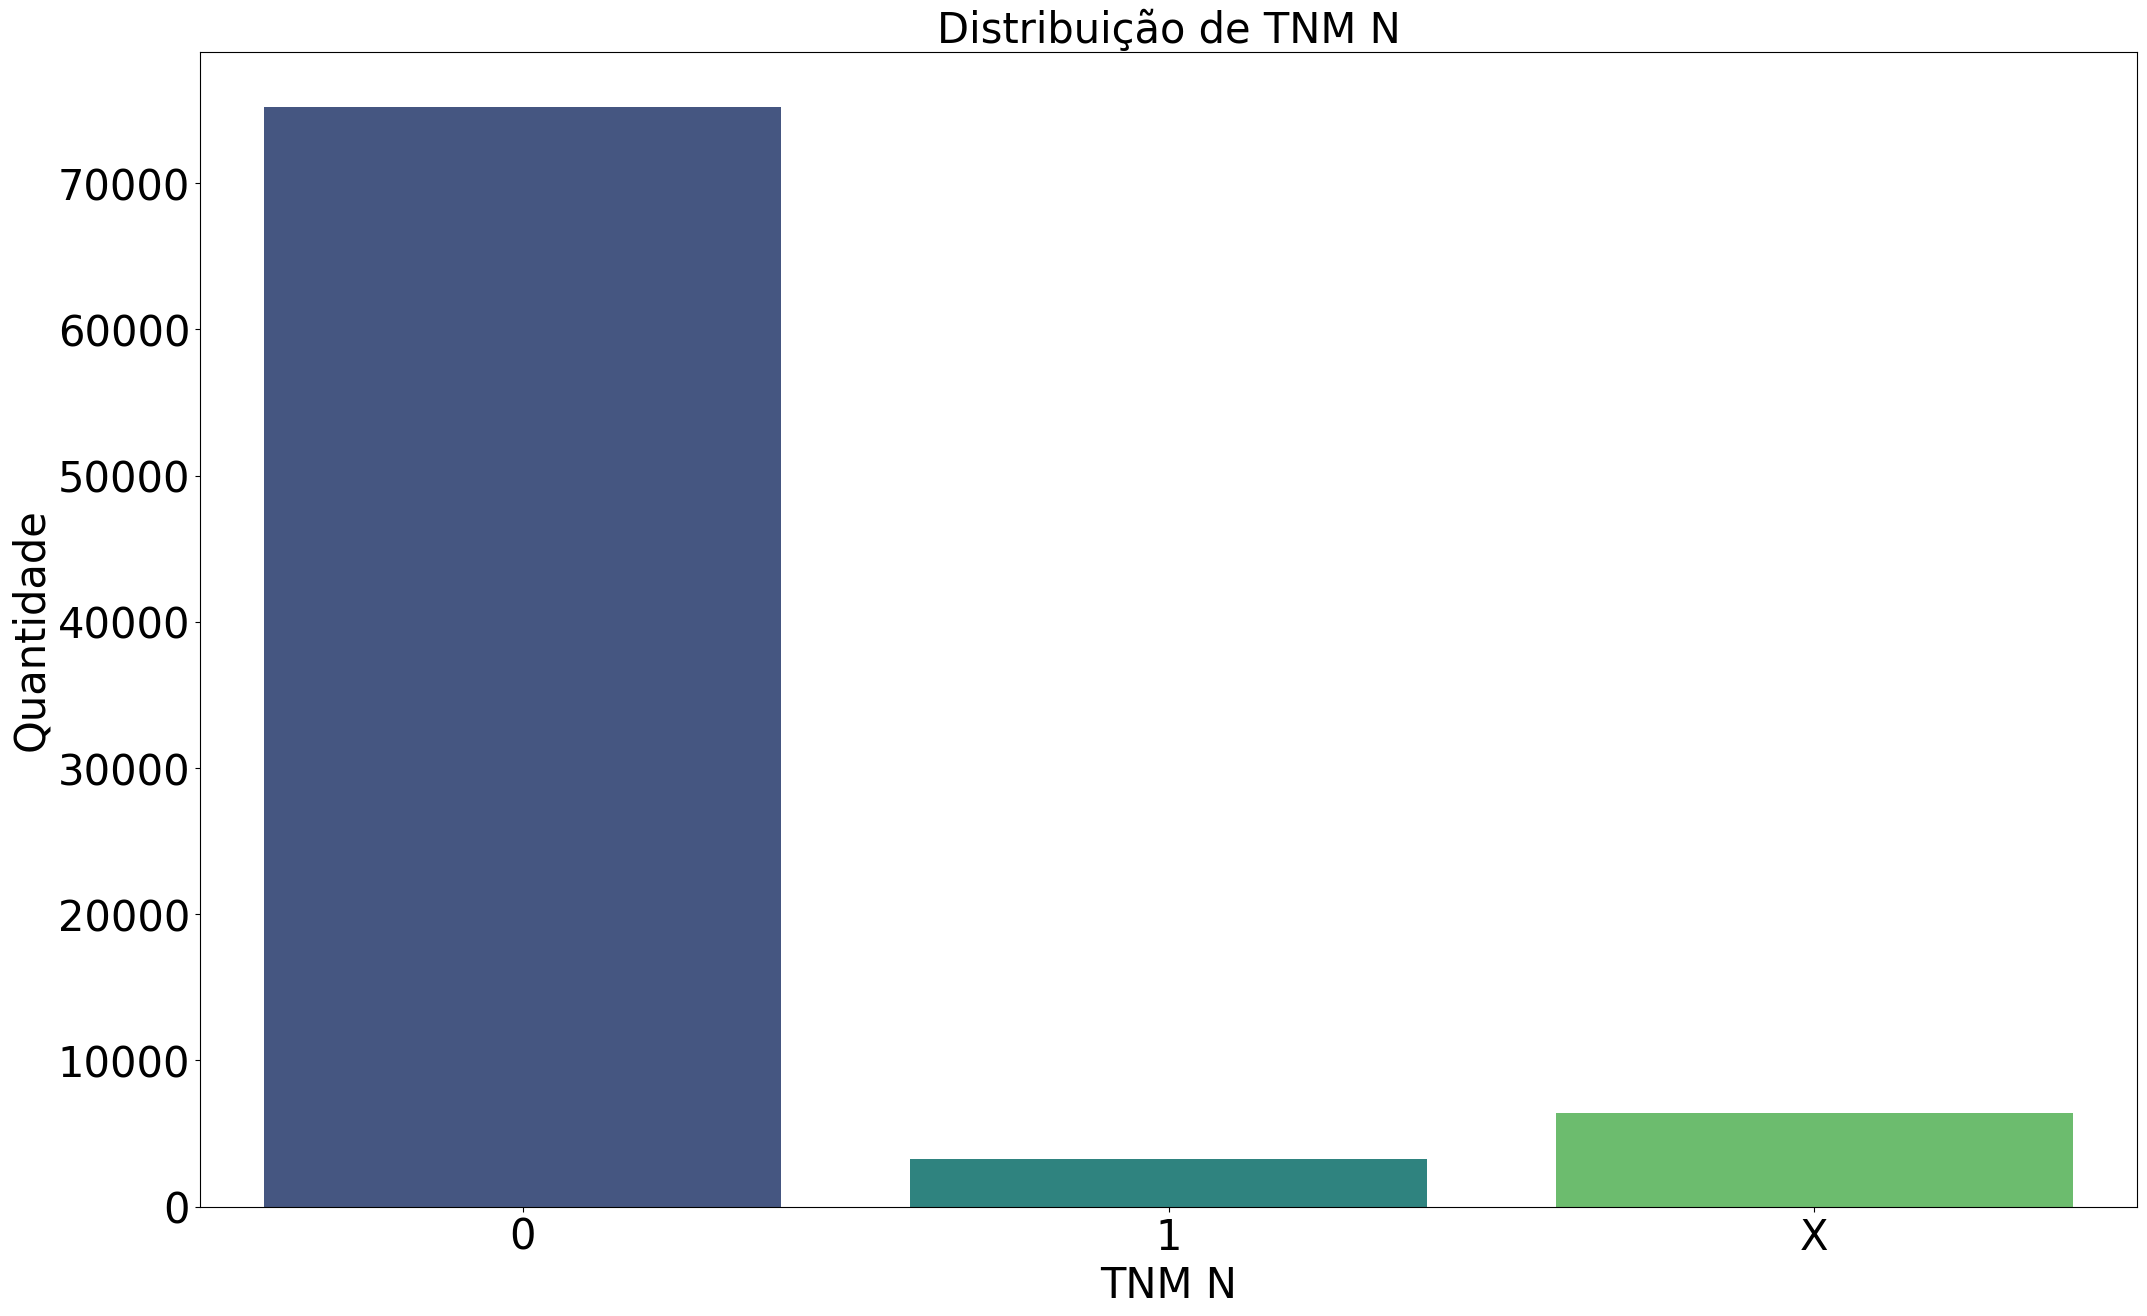

N
0    75227
1     3236
X     6377


In [ ]:
tnm_n_counts = df.N.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=tnm_n_counts.index, y=tnm_n_counts.values, palette="viridis")

plt.xlabel("TNM N", fontsize=30)
plt.ylabel("Quantidade", fontsize=30)
plt.title("Distribuição de TNM N", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()
print(df.N.value_counts().sort_index().to_string())

Na maioria dos casos não foram detectadas metástases nos linfonodos adjacentes (0)

<ipython-input-35-aec790ced6a8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tnm_m_counts.index, y=tnm_m_counts.values, palette="viridis")


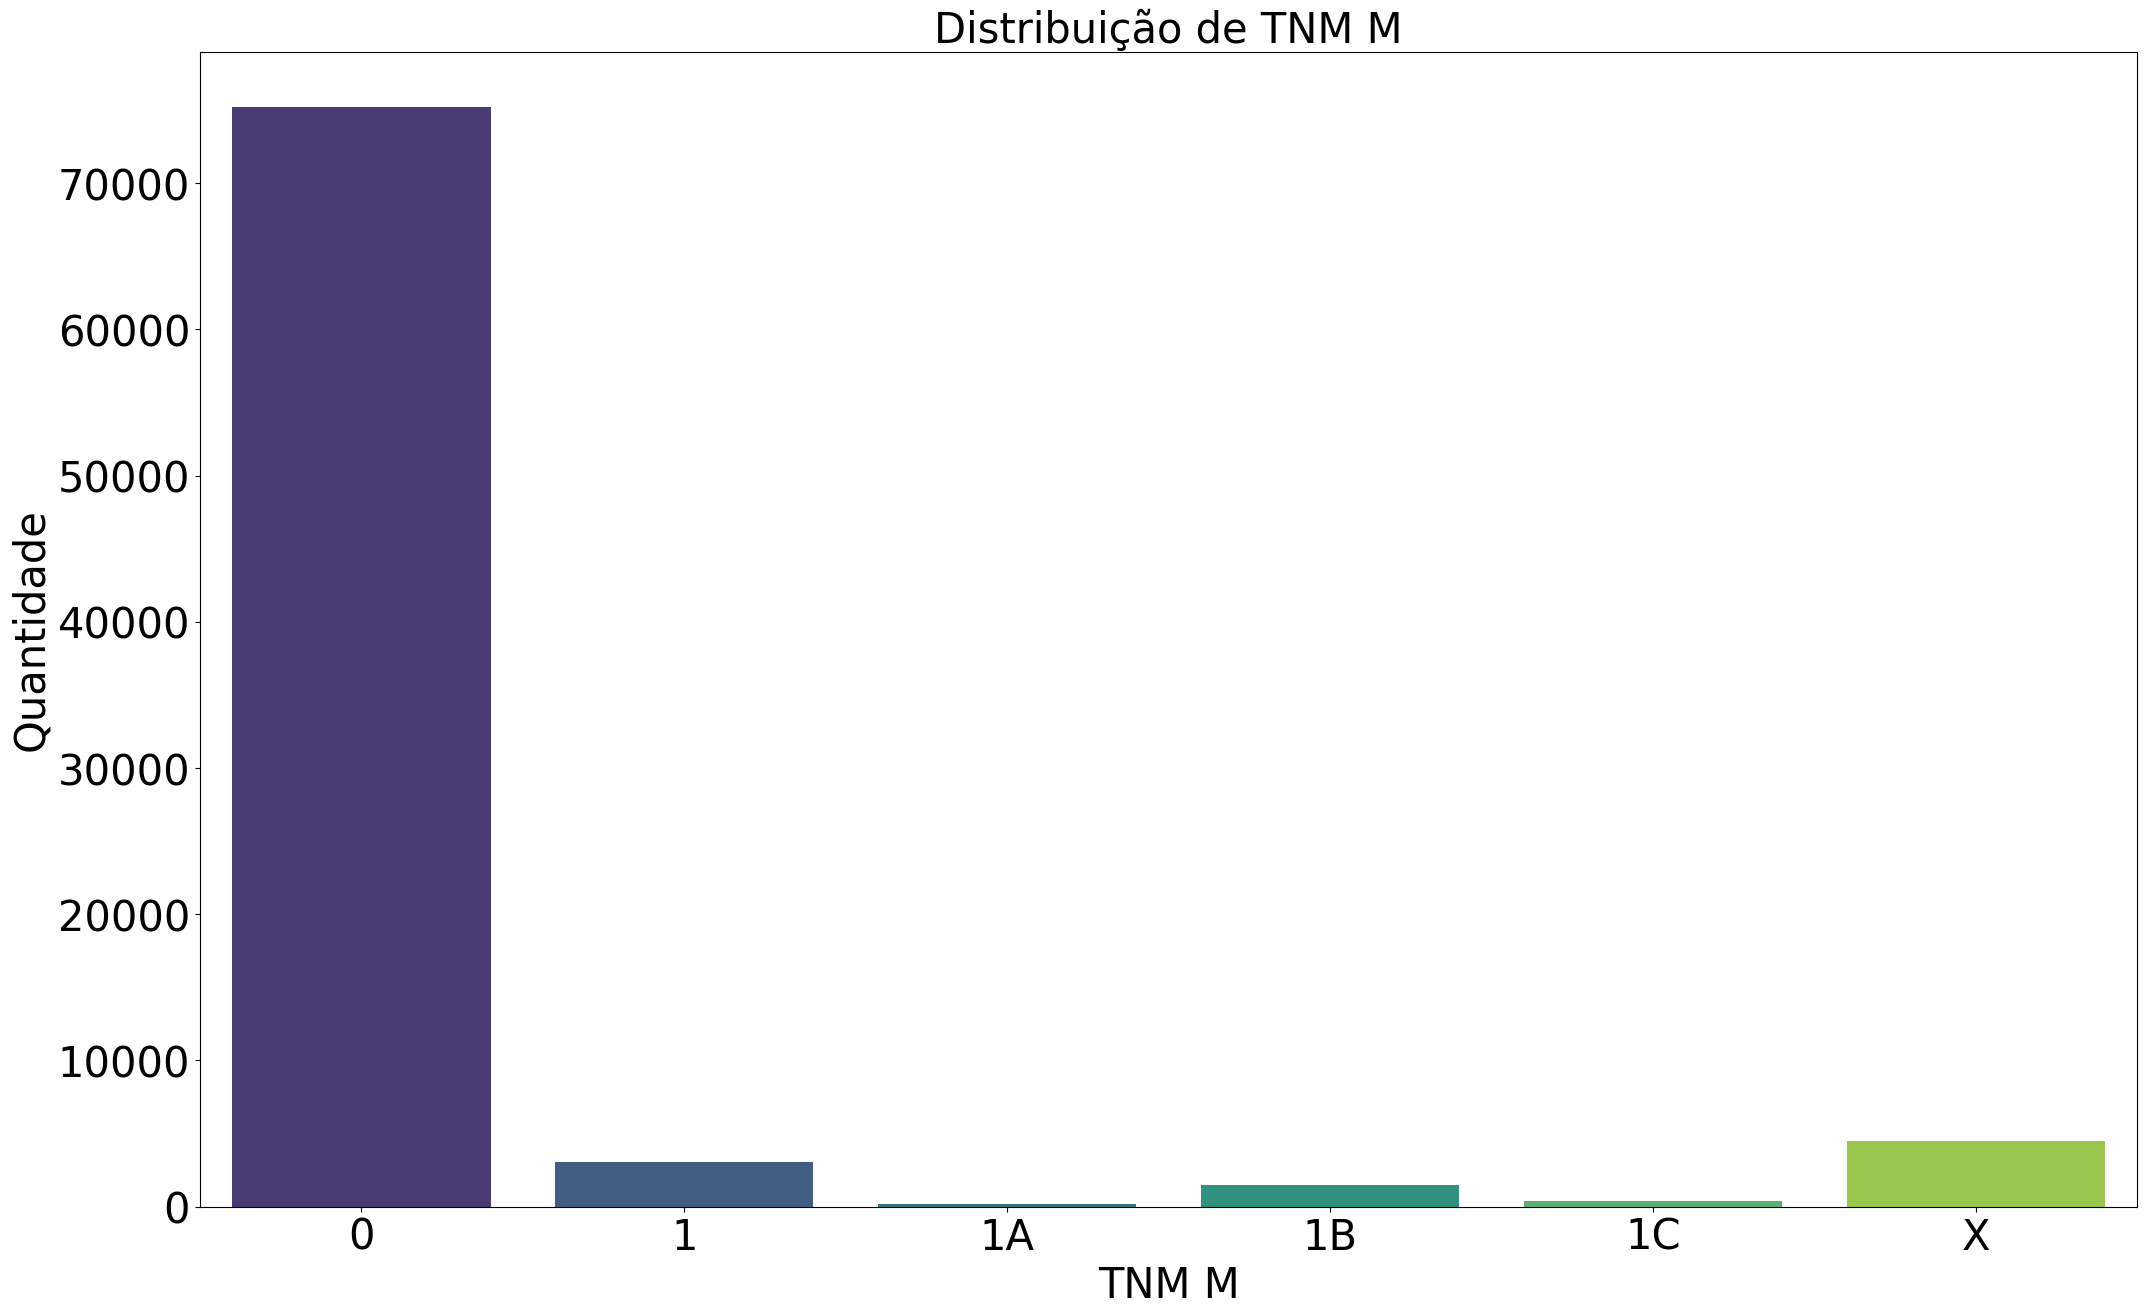

M
0     75218
1      3044
1A      178
1B     1504
1C      414
X      4482


In [ ]:
tnm_m_counts = df.M.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=tnm_m_counts.index, y=tnm_m_counts.values, palette="viridis")

plt.xlabel("TNM M", fontsize=30)
plt.ylabel("Quantidade", fontsize=30)
plt.title("Distribuição de TNM M", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()
print(df.M.value_counts().sort_index().to_string())

Percebe-se novamente a predominância de casos sem metástase em órgãos distantes

<ipython-input-36-b03428ba03bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=psa_counts.index, y=psa_counts.values, palette="viridis")


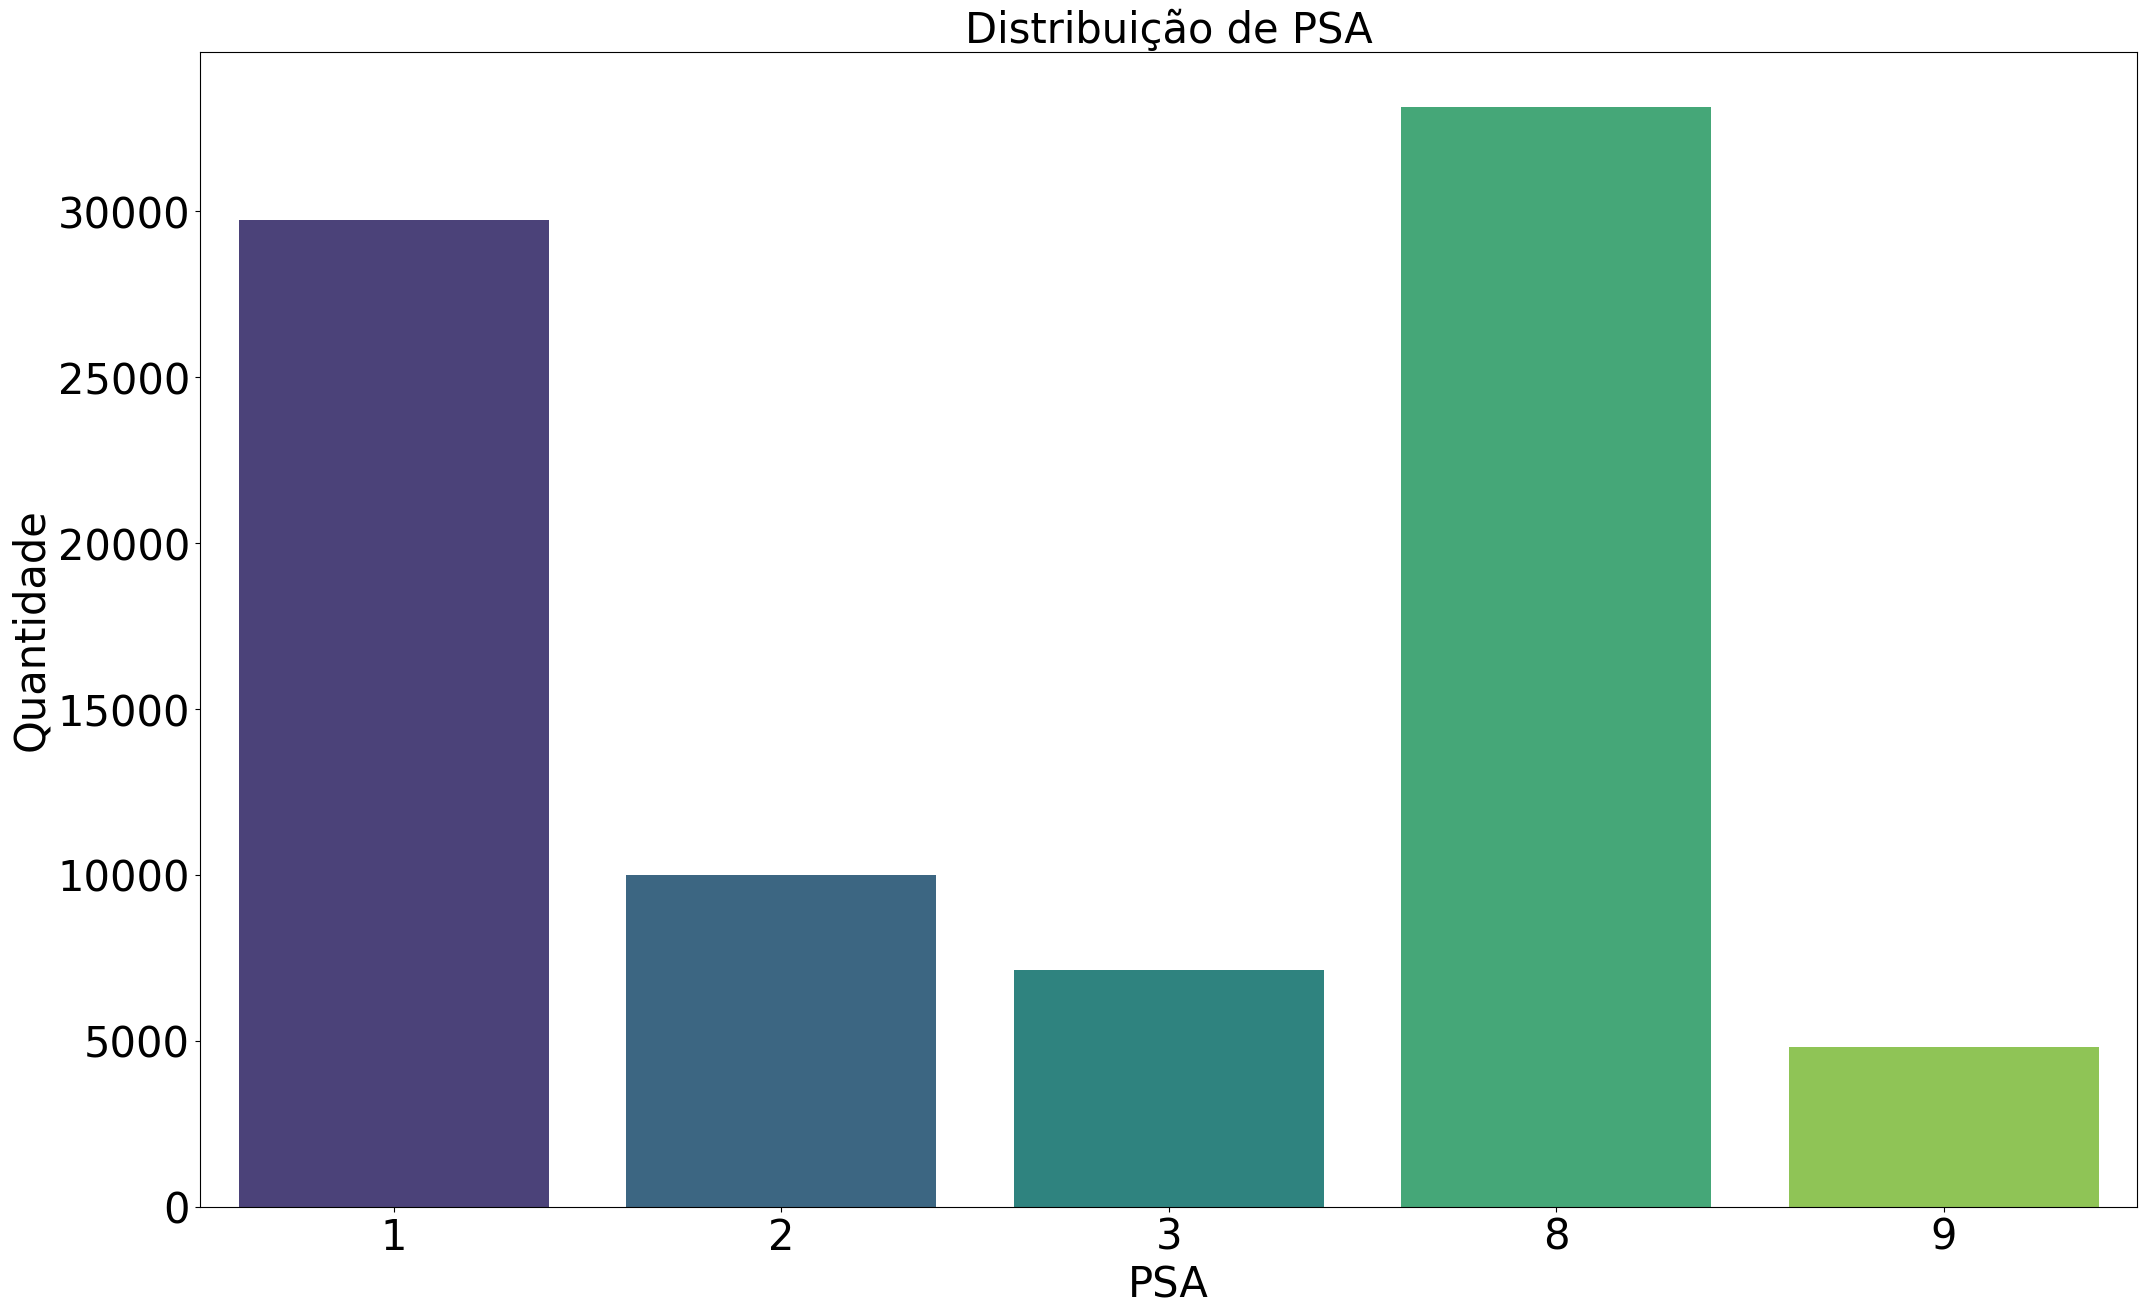

PSA
1    29731
2    10005
3     7142
8    33155
9     4807


In [ ]:
psa_counts = df.PSA.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=psa_counts.index, y=psa_counts.values, palette="viridis")

plt.xlabel("PSA", fontsize=30)
plt.ylabel("Quantidade", fontsize=30)
plt.title("Distribuição de PSA", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()
print(df.PSA.value_counts().sort_index().to_string())

A maioria dos registros não tem o PSA anotado, seguido das menores métricas, menor que 10 ng/mL

<ipython-input-37-d09901583df7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gleason_counts.index, y=gleason_counts.values, palette="viridis")


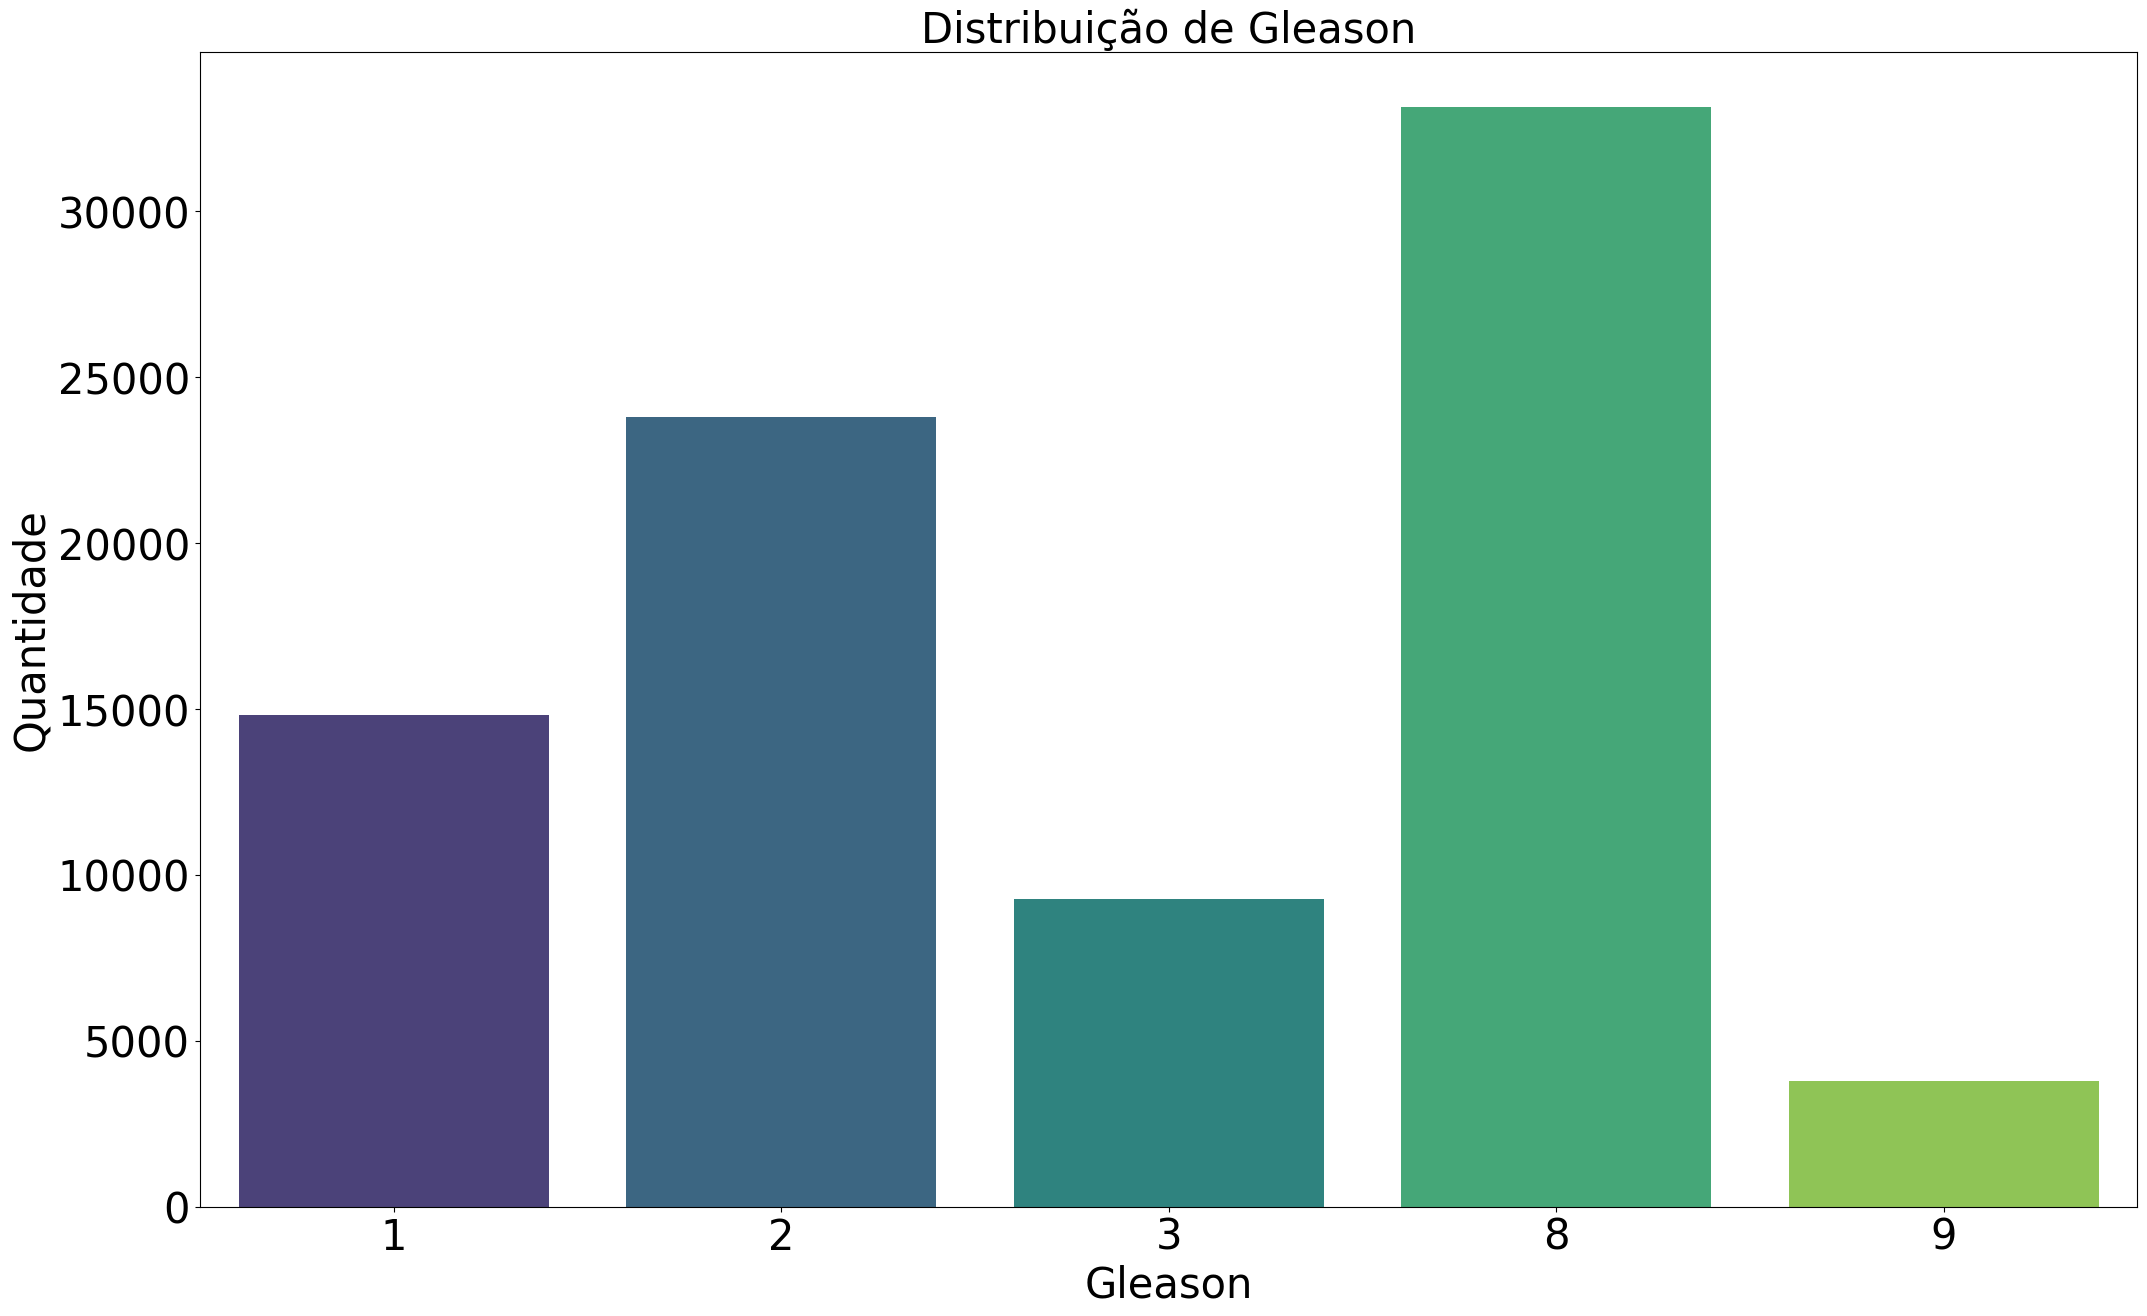

GLEASON
1    14822
2    23797
3     9263
8    33155
9     3803


In [ ]:
gleason_counts = df.GLEASON.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=gleason_counts.index, y=gleason_counts.values, palette="viridis")

plt.xlabel("Gleason", fontsize=30)
plt.ylabel("Quantidade", fontsize=30)
plt.title("Distribuição de Gleason", fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.show()
print(df.GLEASON.value_counts().sort_index().to_string())

Para a escala de Gleason, os casos sem os valores anotados também são maioria, seguido do estágio igual a 7 e depois menor ou igual a 6

<ipython-input-38-94139670b419>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cid_o_counts.index, y=cid_o_counts.values, palette="viridis")


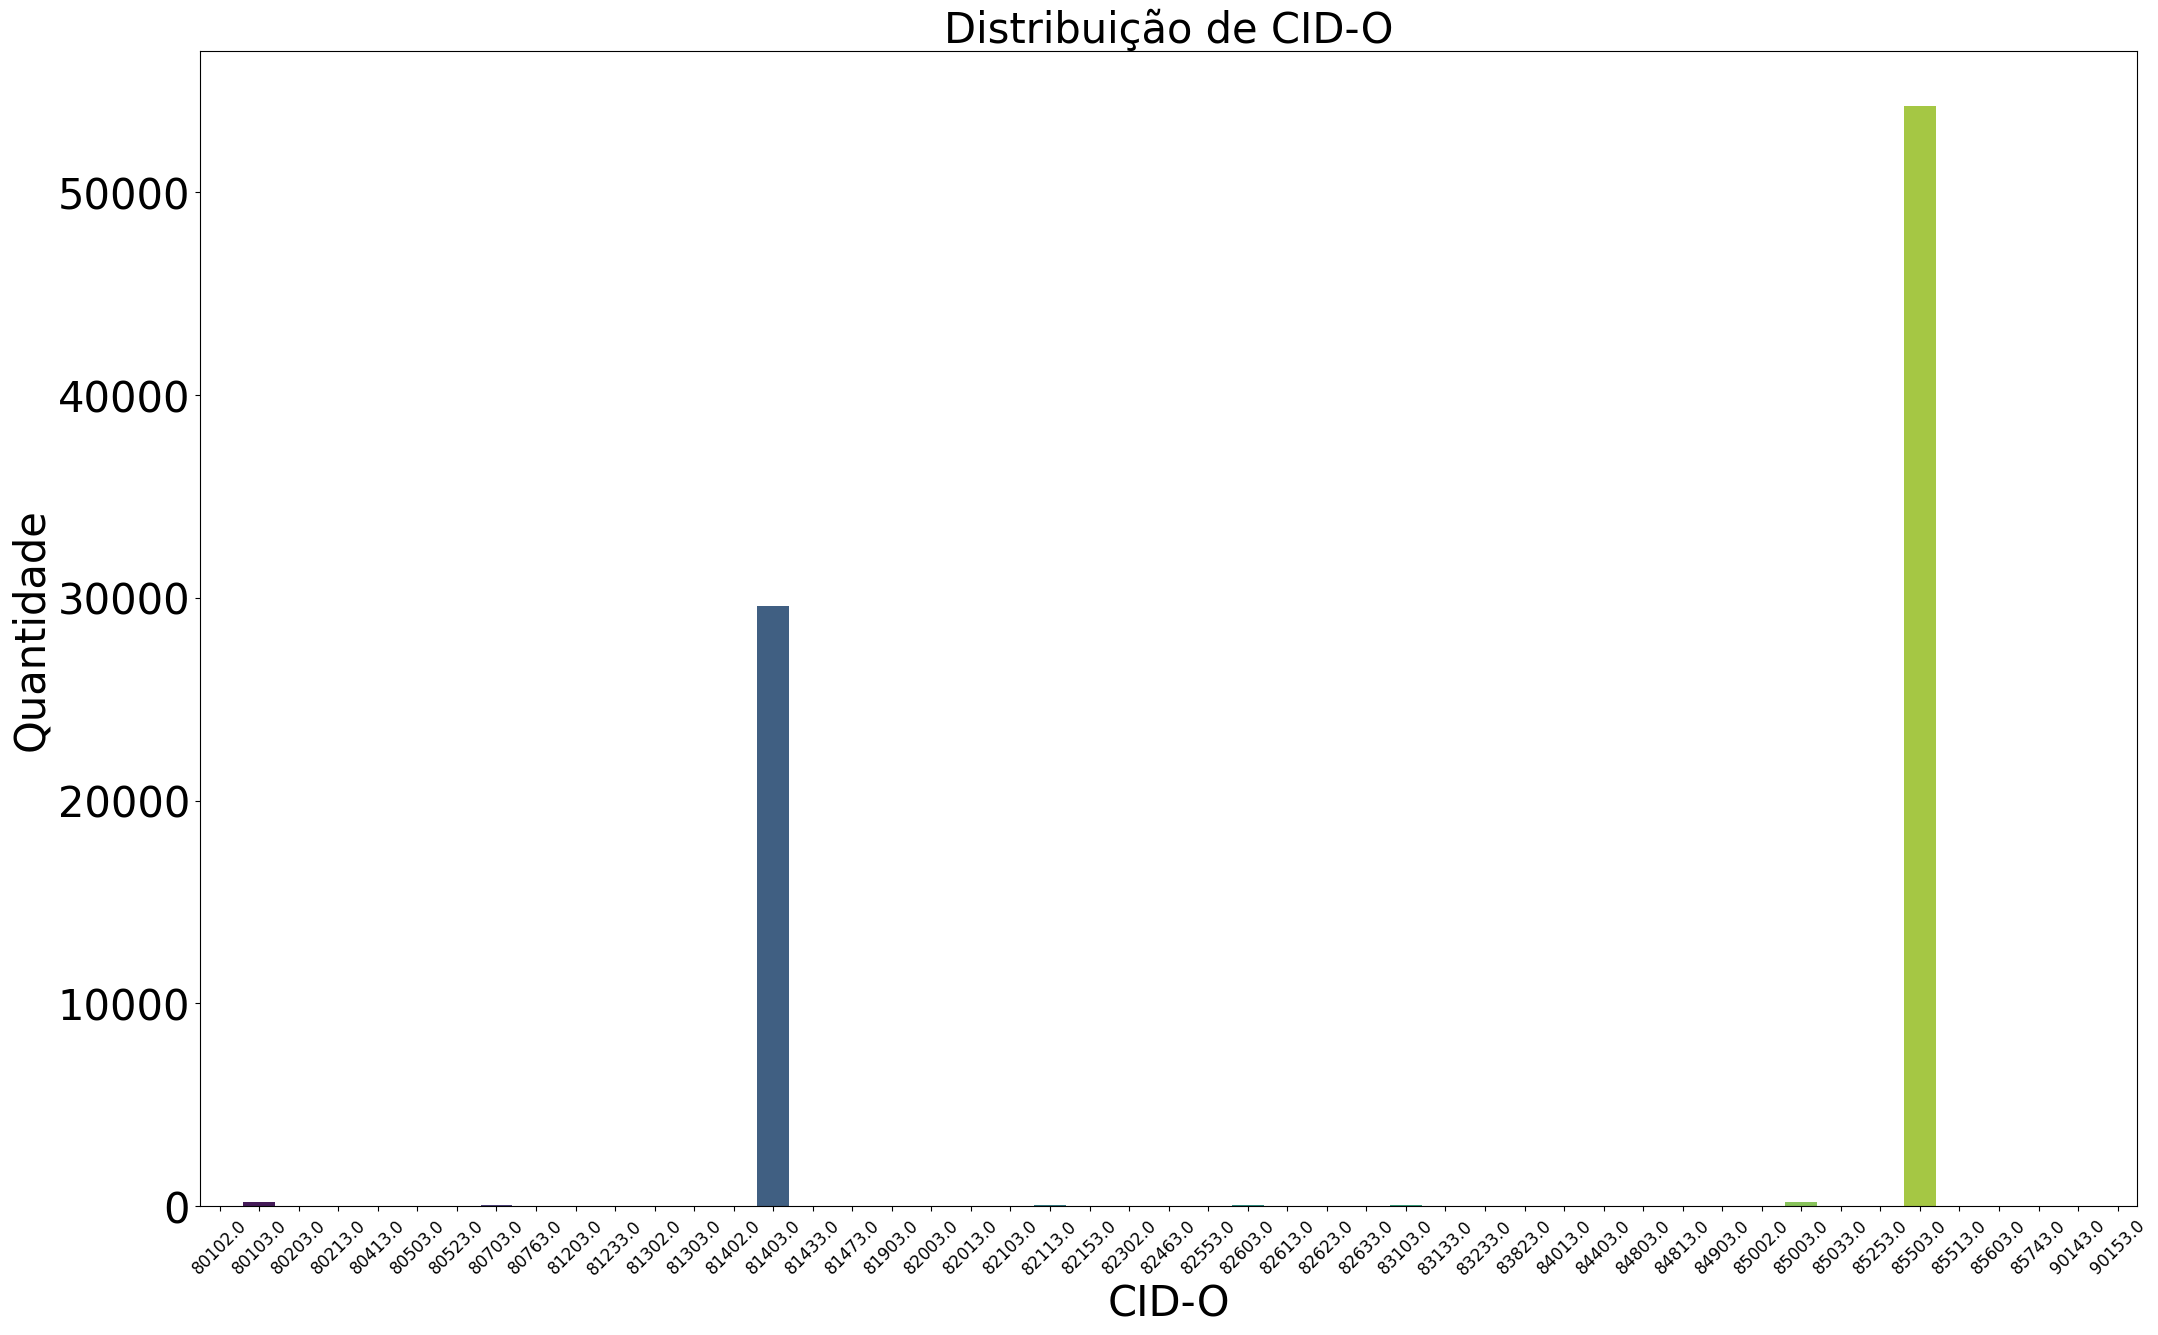

Contagem absoluta:
CIDO
85503.0    54208
81403.0    29611
80103.0      215
85003.0      213
82603.0       77
82113.0       72
83103.0       64
80703.0       61
81402.0       40
81473.0       27
84803.0       24
84013.0       23
83133.0       19
80503.0       19
82623.0       18
83233.0       14
85513.0       14
84813.0       14
81203.0       13
82463.0        9
85033.0        7
84903.0        6
90153.0        6
80413.0        6
82013.0        5
82553.0        5
81303.0        4
82153.0        4
82633.0        4
81903.0        4
82103.0        3
80213.0        3
80203.0        3
82613.0        2
81302.0        2
81233.0        2
84403.0        2
85002.0        2
83823.0        2
85743.0        2
90143.0        2
85603.0        2
82003.0        1
82302.0        1
80523.0        1
80102.0        1
85253.0        1
80763.0        1
81433.0        1

Porcentagem:
CIDO
85503.0    63.894389
81403.0    34.902169
80103.0     0.253418
85003.0     0.251061
82603.0     0.090759
82113.0     0.08486

In [ ]:
cid_o_counts = df.CIDO.value_counts().sort_index()

plt.figure(figsize=(25, 15))
sns.barplot(x=cid_o_counts.index, y=cid_o_counts.values, palette="viridis")

plt.xlabel("CID-O", fontsize=30)
plt.ylabel("Quantidade", fontsize=30)
plt.title("Distribuição de CID-O", fontsize=30)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=30)

plt.show()
print("Contagem absoluta:")
print(df.CIDO.value_counts().sort_values(ascending=False).to_string())

print("\nPorcentagem:")
porcentagem = df.CIDO.value_counts(normalize=True).sort_values(ascending=False) * 100
print(porcentagem.to_string())

É possível perceber a grande predominância de duas classes e uma alta cardinalidade dos dados. Portanto, para auxiliar o modelo, os menores registros são agrupados em uma categoria OUTROS

In [ ]:
counts = df['CIDO'].value_counts()
threshold = 1000
rare_categories = counts[counts < threshold].index
df['CIDO'] = df['CIDO'].apply(lambda x: 'OUTROS' if x in rare_categories else x)
df.CIDO.value_counts()

CIDO
85503.0    54208
81403.0    29611
OUTROS      1021
Name: count, dtype: int64

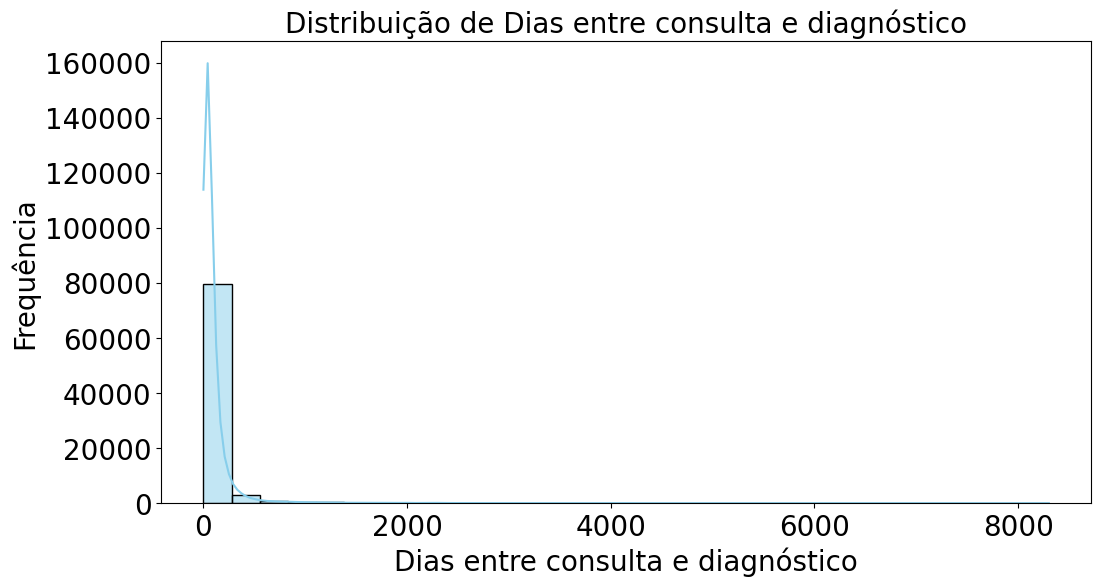

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df["CONSDIAG"], bins=30, kde=True, color="skyblue")

plt.xlabel("Dias entre consulta e diagnóstico", fontsize=20)
plt.ylabel("Frequência", fontsize=20)
plt.title("Distribuição de Dias entre consulta e diagnóstico", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

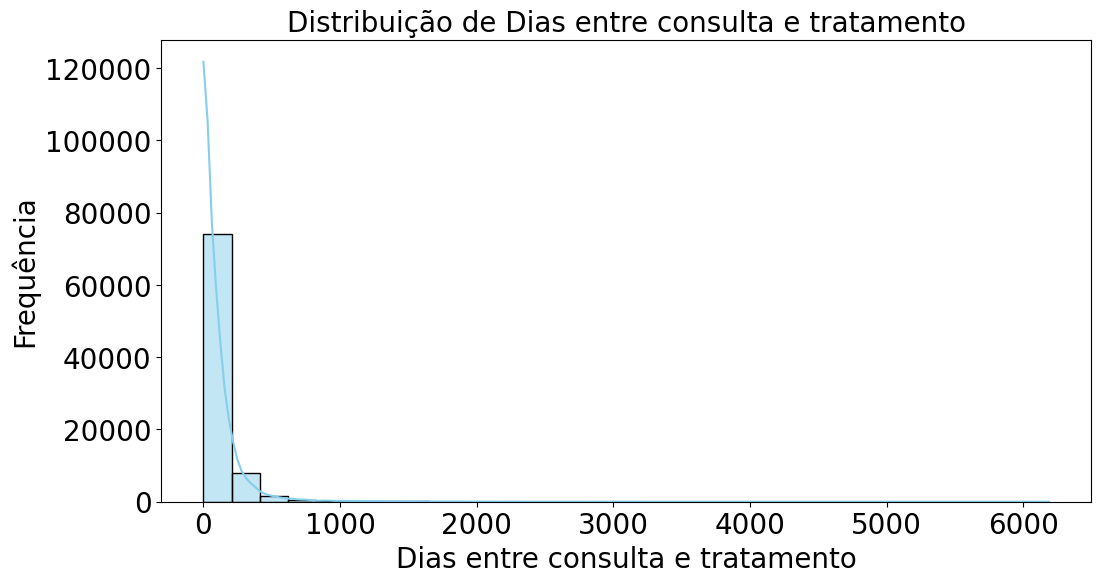

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df["TRATCONS"], bins=30, kde=True, color="skyblue")

plt.xlabel("Dias entre consulta e tratamento", fontsize=20)
plt.ylabel("Frequência", fontsize=20)
plt.title("Distribuição de Dias entre consulta e tratamento", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

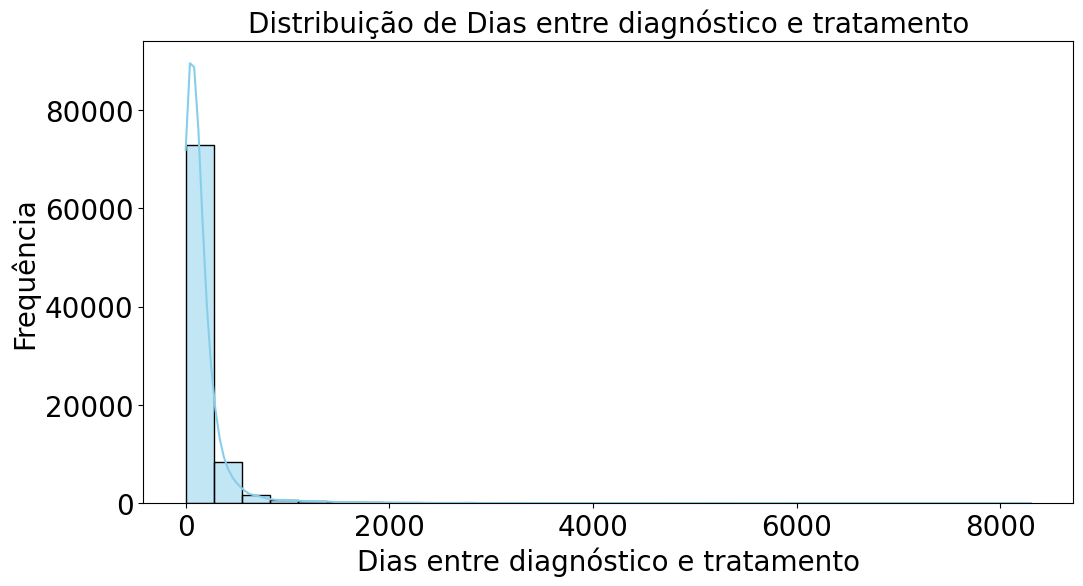

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df["DIAGTRAT"], bins=30, kde=True, color="skyblue")

plt.xlabel("Dias entre diagnóstico e tratamento", fontsize=20)
plt.ylabel("Frequência", fontsize=20)
plt.title("Distribuição de Dias entre diagnóstico e tratamento", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

In [ ]:
df[["CONSDIAG", "TRATCONS", "DIAGTRAT"]].describe()

CONSDIAG      TRATCONS      DIAGTRAT
count  84840.000000  84840.000000  84840.000000
mean     111.361174    104.223173    173.177039
std      294.787589    189.154260    327.121344
min        0.000000      0.000000      0.000000
25%       23.000000      7.000000     42.000000
50%       54.000000     56.000000    104.000000
75%      103.000000    129.000000    194.000000
max     8302.000000   6186.000000   8302.000000

Na análise dos dias, é possível verificar a presença de baixo números, com grandes outilers que acabam desvirtuando os dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84840 entries, 0 to 131436
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IDADE       84840 non-null  int64  
 1   DIAGPREV    84840 non-null  bool   
 2   BASEDIAG    84840 non-null  int64  
 3   EC          84840 non-null  object 
 4   T           84840 non-null  object 
 5   N           84840 non-null  object 
 6   M           84840 non-null  object 
 7   PSA         84840 non-null  int64  
 8   GLEASON     84840 non-null  int64  
 9   CONSDIAG    84840 non-null  int64  
 10  TRATCONS    84840 non-null  float64
 11  DIAGTRAT    84840 non-null  float64
 12  CIDO        84840 non-null  object 
 13  TRATAMENTO  84840 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 9.1+ MB


Análise das features com a variável alvo

<ipython-input-45-df3229f9f936>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["TRATAMENTO"], y=df["IDADE"], palette="Set2")


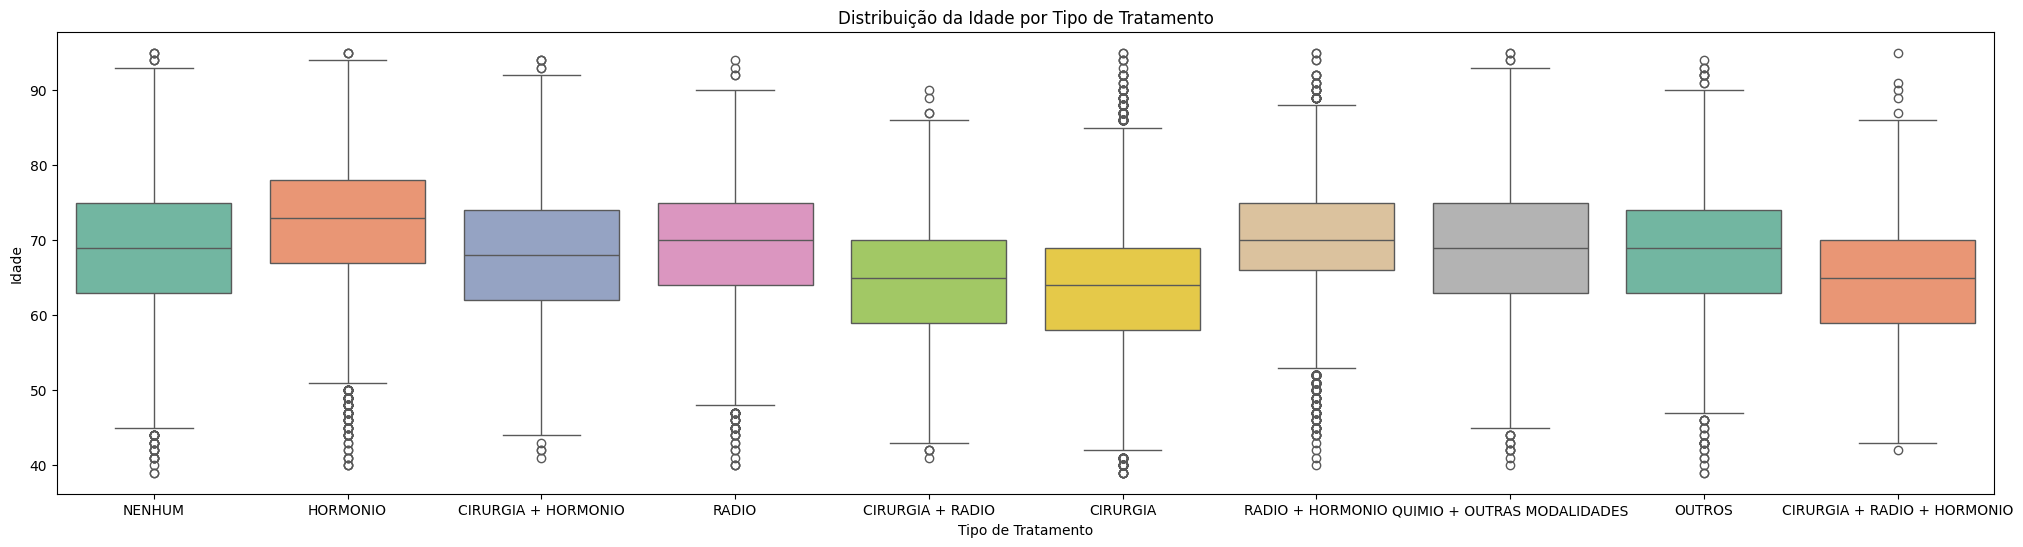

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x=df["TRATAMENTO"], y=df["IDADE"], palette="Set2")

plt.xlabel("Tipo de Tratamento")
plt.ylabel("Idade")
plt.title("Distribuição da Idade por Tipo de Tratamento")

plt.show()

A mediana das idades varia pouco entre os tratamentos. Tratamentos como HORMONIO; RADIO + HORMONIO e QUIMIO + OUTRAS MODALIDADES têm medianas levemente mais altas. CIRURGIA e CIRURGIA + RADIO têm menores valores mínimos e menores medianas, indicando que podem ser mais comuns em pacientes mais jovens.

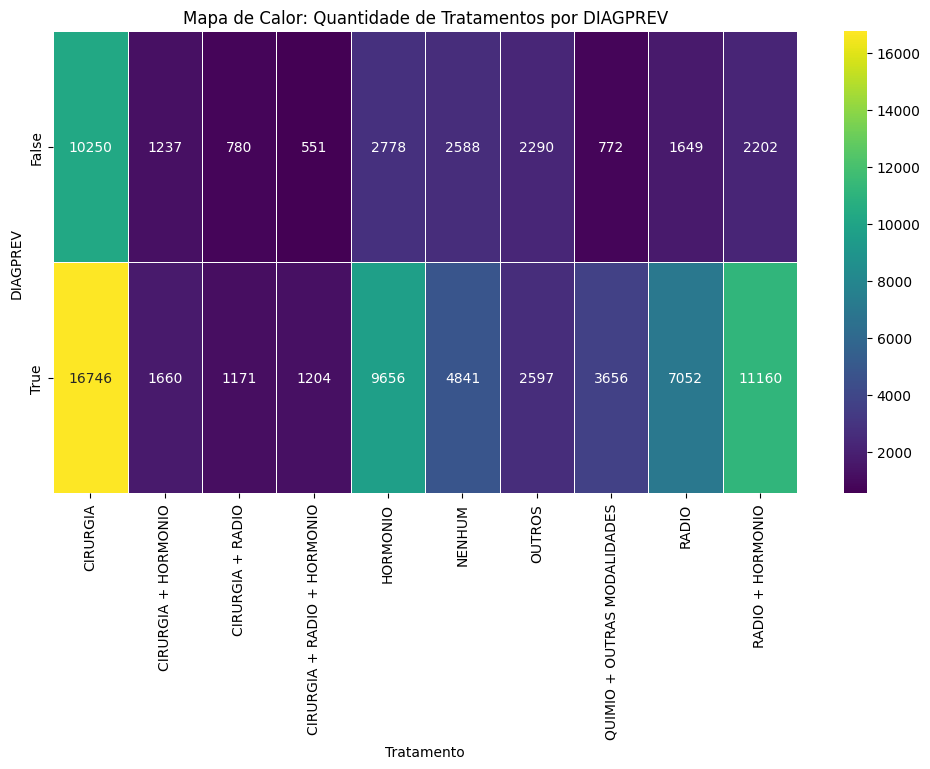

In [ ]:
categoria_atendimento_counts = df.groupby(["DIAGPREV", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(categoria_atendimento_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("DIAGPREV")
plt.title("Mapa de Calor: Quantidade de Tratamentos por DIAGPREV")

plt.show()

Pessoas que já receberam o diagnóstico anteriormente tendem a receber mais CIRURGIA, RADIO + HORMONIO e HORMONIO. Já pessoas com o primeiro diagnóstico recebem CIRURGIA, HORMONIO e NENHUM.

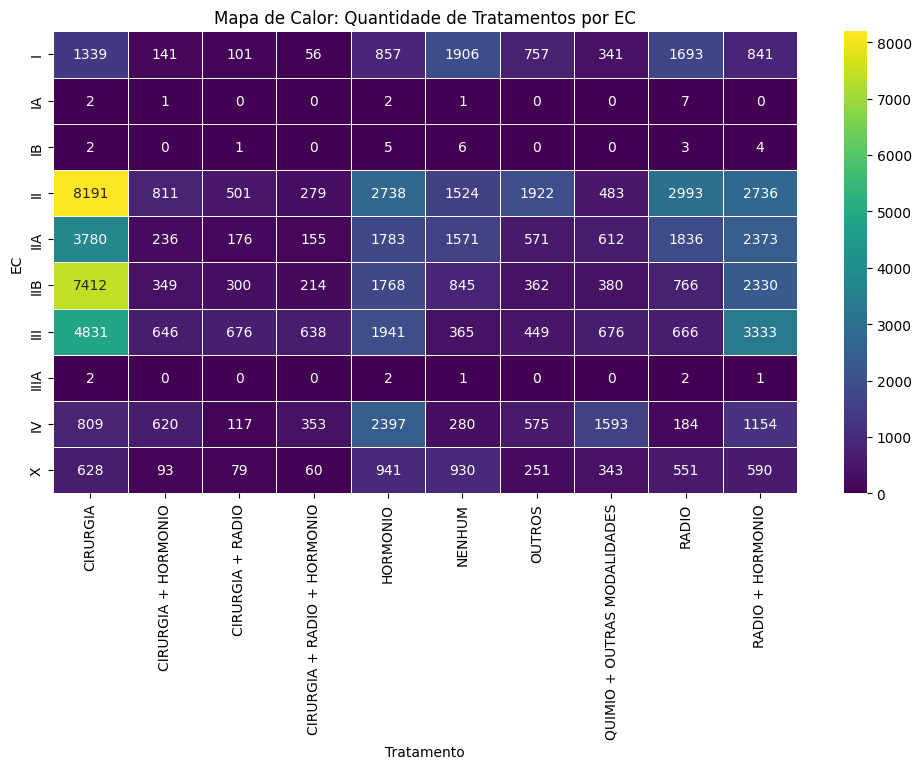

In [ ]:
categoria_atendimento_counts = df.groupby(["EC", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(categoria_atendimento_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("EC")
plt.title("Mapa de Calor: Quantidade de Tratamentos por EC")

plt.show()

CIRURGIA é o tratamento mais frequente nos estágios iniciais (IA, IB, II, IIA, IIB). Combinação de tratamentos cresce em estágios mais avançados, QUIMIO + OUTRAS MODALIDADES aumenta em EC IV (1.598), III (676), IIB (380); RADIO + HORMONIO é comum em EC II (2.736), IIB (2.330), III (3.333). Padrão de tratamento com NENHUM é mais presente em estágios iniciais e intermediários - EC II: 1.524 pacientes não receberam tratamento registrado; EC I: 1.906 também aparecem sem tratamento.

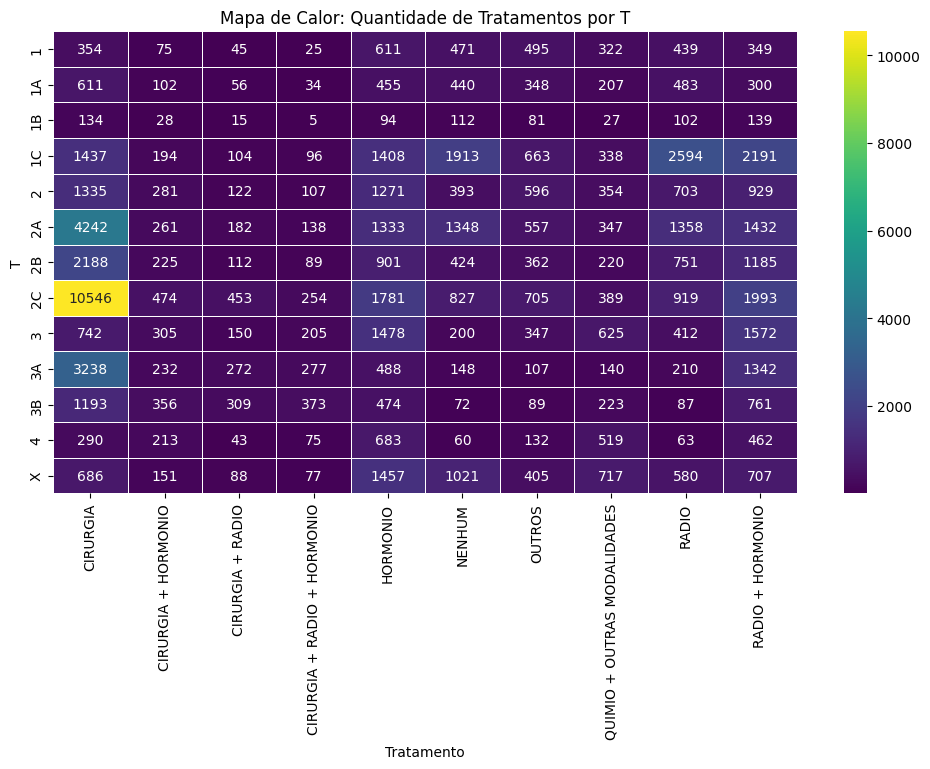

In [ ]:
categoria_atendimento_counts = df.groupby(["T", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(categoria_atendimento_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("T")
plt.title("Mapa de Calor: Quantidade de Tratamentos por T")

plt.show()

T2C é um dos estágios mais frequentes e a cirurgia isolada é a abordagem mais utilizada nesse estágio. Em T3A, T3B, T4 nos tratamentos combinados. O número de pacientes em estágio 1 é significativo. Tratamentos hormonais têm presença relevante, especialmente combinados.

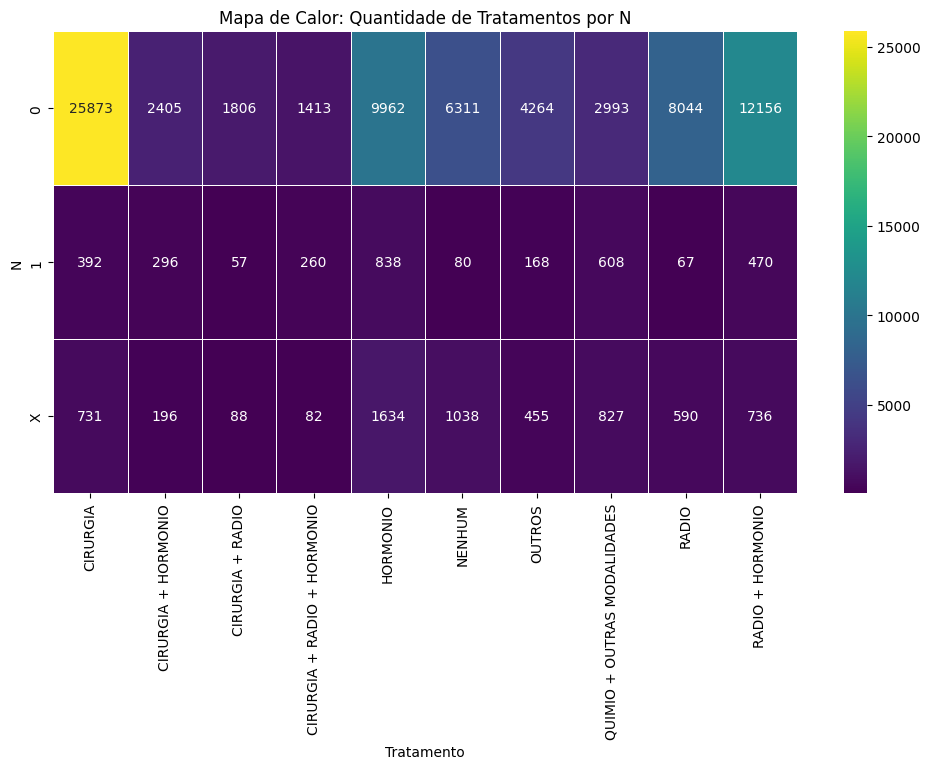

In [ ]:
categoria_atendimento_counts = df.groupby(["N", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(categoria_atendimento_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("N")
plt.title("Mapa de Calor: Quantidade de Tratamentos por N")

plt.show()

A maior parte dos pacientes não apresenta metástase em linfonodos no diagnóstico. A hormonioterapia é a base do tratamento para pacientes com metástase linfonodal, frequentemente combinada com outras modalidades. Nos casos X, o tratamento que mais prevalece é a hormonioterapia, nenhum e aqueles que usam quimio.

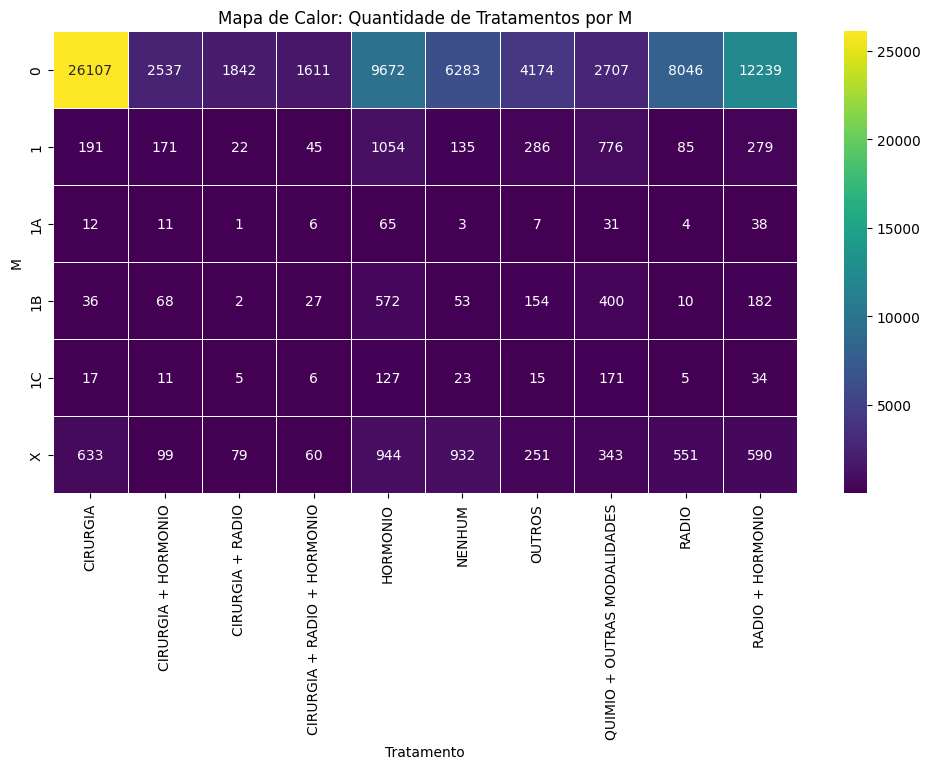

In [ ]:
categoria_atendimento_counts = df.groupby(["M", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(categoria_atendimento_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("M")
plt.title("Mapa de Calor: Quantidade de Tratamentos por M")

plt.show()

Novamente os casos sem metástase dominam a quantidade do dataset. Nos cenários metastáticos, destacam-se os tratamentos de HORMONIO, QUIMIO + OUTRAS MODALIDADES.

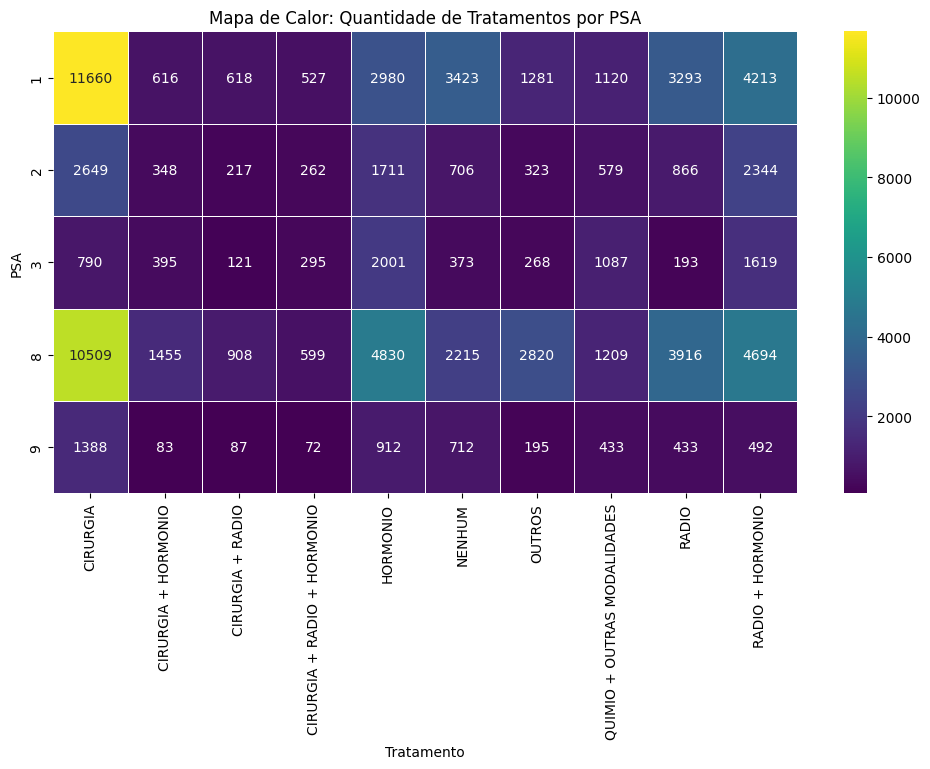

In [ ]:
categoria_atendimento_counts = df.groupby(["PSA", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(categoria_atendimento_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("PSA")
plt.title("Mapa de Calor: Quantidade de Tratamentos por PSA")

plt.show()

O comportamento do PSA 1 e 2 são parecidos. Para o 3, é possível ver a diminuição da cirurgia e aumento de HORMONIO e QUIMIO + OUTRAS MODALIDADES.

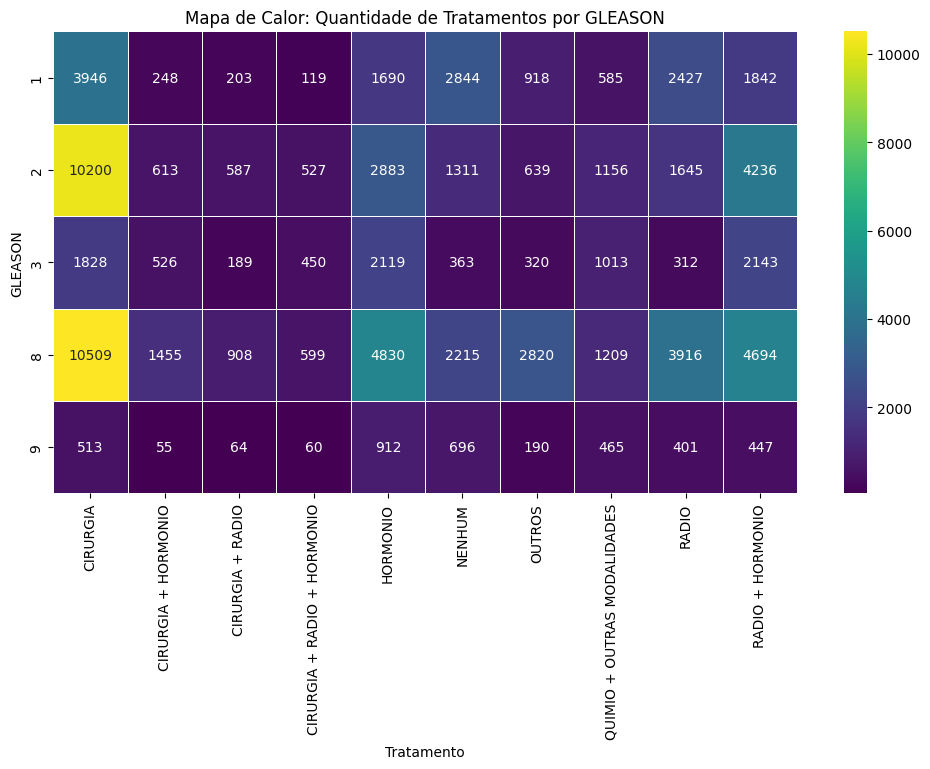

In [ ]:
categoria_atendimento_counts = df.groupby(["GLEASON", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(categoria_atendimento_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("GLEASON")
plt.title("Mapa de Calor: Quantidade de Tratamentos por GLEASON")

plt.show()

É possível ver um comportamento semelhante ao anterior, com a CIRURGIA caindo e HORMONIO e RADIO+HORMONIO aumentando no estágio 3.

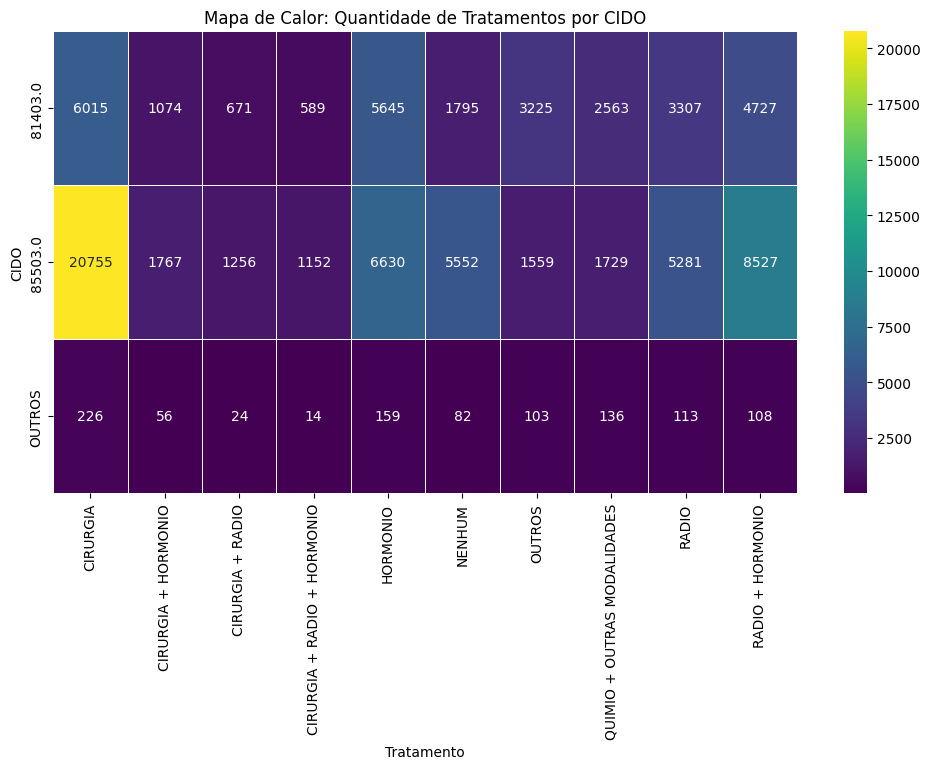

In [ ]:
categoria_atendimento_counts = df.groupby(["CIDO", "TRATAMENTO"]).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(categoria_atendimento_counts, annot=True, fmt=".0f", cmap="viridis", linewidths=0.5)

plt.xlabel("Tratamento")
plt.ylabel("CIDO")
plt.title("Mapa de Calor: Quantidade de Tratamentos por CIDO")

plt.show()

<ipython-input-54-185521d1a75a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["TRATAMENTO"], y=df["CONSDIAG"], palette="Set2")


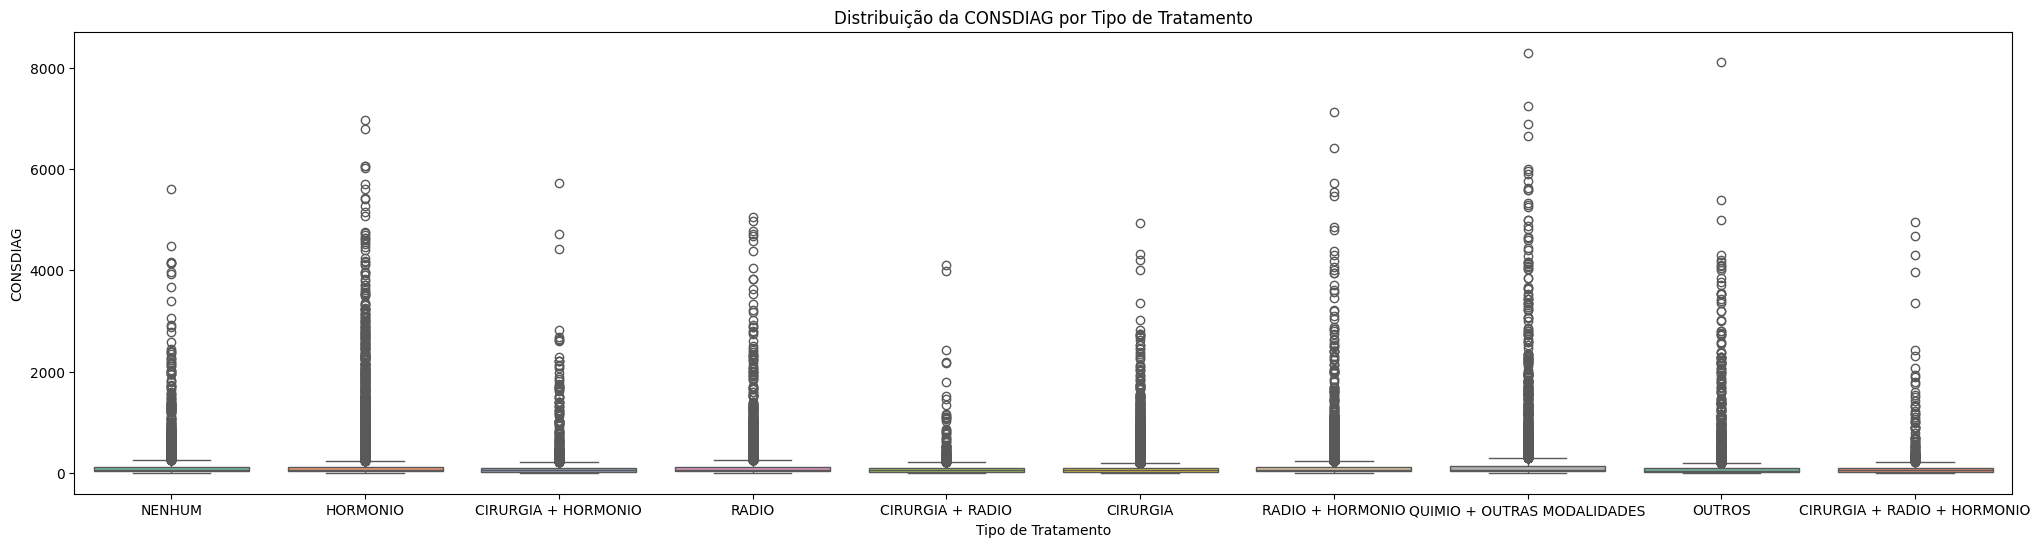

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x=df["TRATAMENTO"], y=df["CONSDIAG"], palette="Set2")

plt.xlabel("Tipo de Tratamento")
plt.ylabel("CONSDIAG")
plt.title("Distribuição da CONSDIAG por Tipo de Tratamento")

plt.show()

<ipython-input-55-5ecb5b52a689>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["TRATAMENTO"], y=df["DIAGTRAT"], palette="Set2")


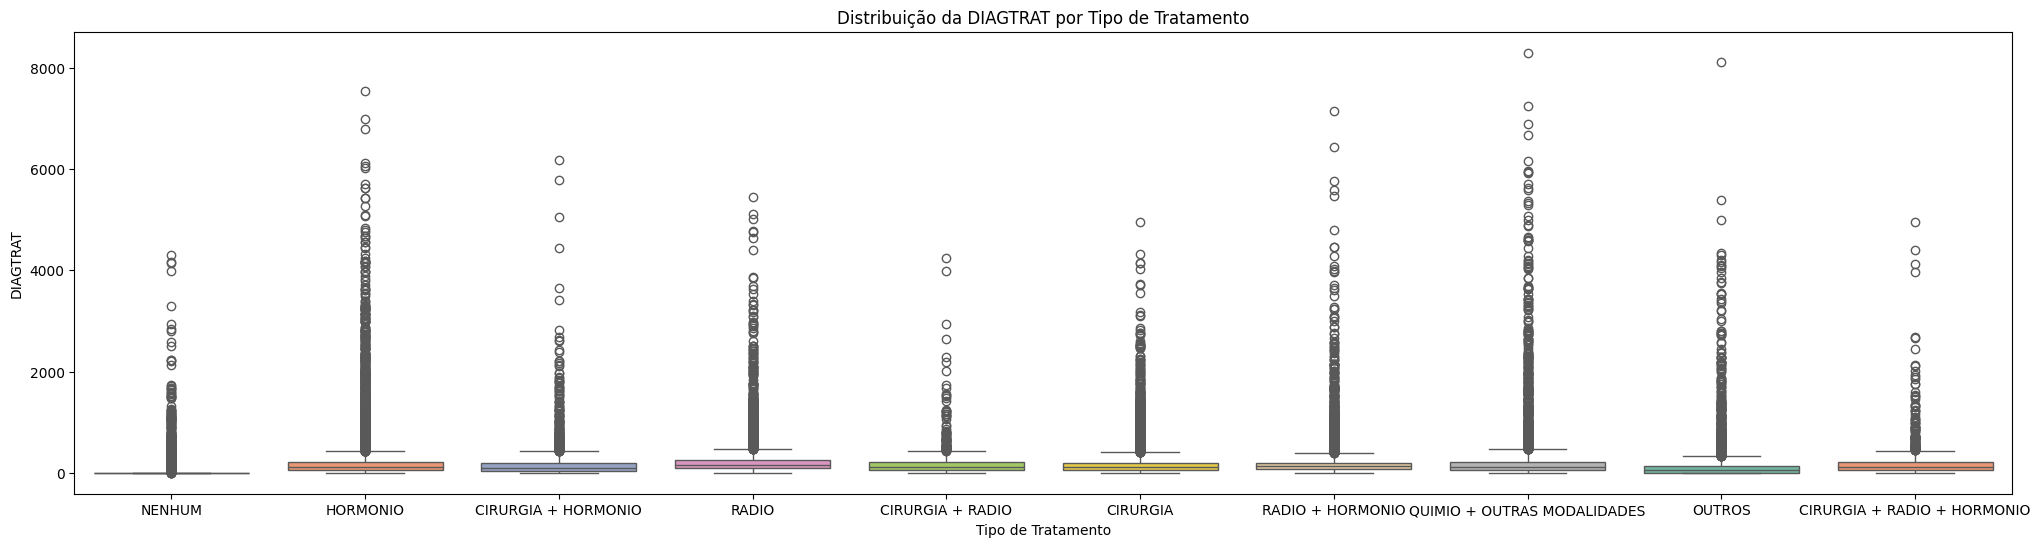

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x=df["TRATAMENTO"], y=df["DIAGTRAT"], palette="Set2")

plt.xlabel("Tipo de Tratamento")
plt.ylabel("DIAGTRAT")
plt.title("Distribuição da DIAGTRAT por Tipo de Tratamento")

plt.show()

<ipython-input-56-e4396672bfeb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["TRATAMENTO"], y=df["TRATCONS"], palette="Set2")


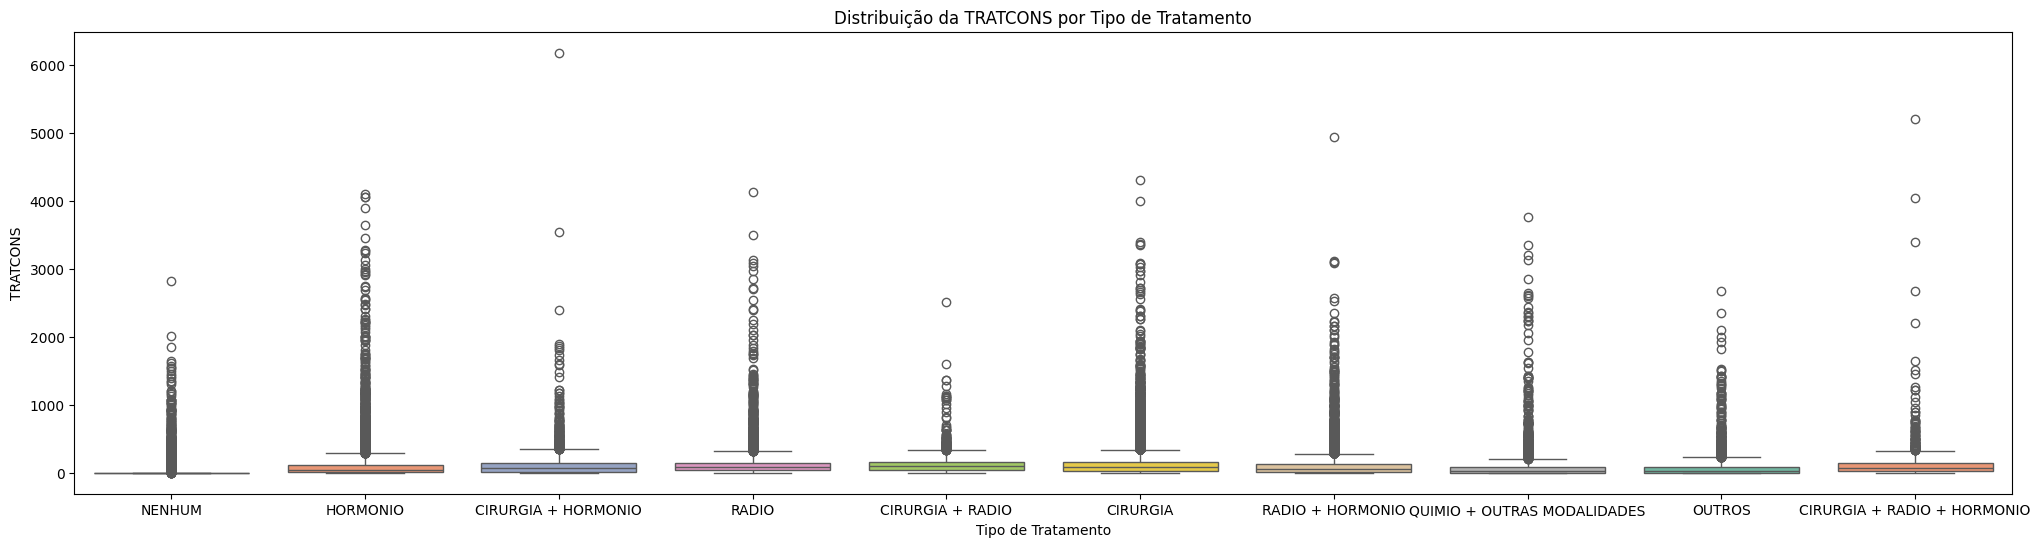

In [ ]:
plt.figure(figsize=(25, 6))
sns.boxplot(x=df["TRATAMENTO"], y=df["TRATCONS"], palette="Set2")

plt.xlabel("Tipo de Tratamento")
plt.ylabel("TRATCONS")
plt.title("Distribuição da TRATCONS por Tipo de Tratamento")

plt.show()

As variaveis de dias serão removidas por conta de não apresentarem correlação evidente com os métodos de tratamento

In [ ]:
df = df.drop(columns=['TRATCONS', 'DIAGTRAT', 'CONSDIAG'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84840 entries, 0 to 131436
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IDADE       84840 non-null  int64 
 1   DIAGPREV    84840 non-null  bool  
 2   BASEDIAG    84840 non-null  int64 
 3   EC          84840 non-null  object
 4   T           84840 non-null  object
 5   N           84840 non-null  object
 6   M           84840 non-null  object
 7   PSA         84840 non-null  int64 
 8   GLEASON     84840 non-null  int64 
 9   CIDO        84840 non-null  object
 10  TRATAMENTO  84840 non-null  object
dtypes: bool(1), int64(4), object(6)
memory usage: 7.2+ MB


Trativa para balanceamento das classes alvo

Aplicação de one-hot enconding

In [ ]:
categoricas = [
    'EC',
    'T', 'N', 'M', 'PSA', 'GLEASON', 'CIDO', 'BASEDIAG'
]

df[categoricas] = df[categoricas].astype(str)

df_encoded = pd.get_dummies(df, columns=categoricas)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84840 entries, 0 to 131436
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IDADE         84840 non-null  int64 
 1   DIAGPREV      84840 non-null  bool  
 2   TRATAMENTO    84840 non-null  object
 3   EC_I          84840 non-null  bool  
 4   EC_IA         84840 non-null  bool  
 5   EC_IB         84840 non-null  bool  
 6   EC_II         84840 non-null  bool  
 7   EC_IIA        84840 non-null  bool  
 8   EC_IIB        84840 non-null  bool  
 9   EC_III        84840 non-null  bool  
 10  EC_IIIA       84840 non-null  bool  
 11  EC_IV         84840 non-null  bool  
 12  EC_X          84840 non-null  bool  
 13  T_1           84840 non-null  bool  
 14  T_1A          84840 non-null  bool  
 15  T_1B          84840 non-null  bool  
 16  T_1C          84840 non-null  bool  
 17  T_2           84840 non-null  bool  
 18  T_2A          84840 non-null  bool  
 19  T_2B    

In [ ]:
df_encoded.TRATAMENTO.value_counts()

TRATAMENTO
CIRURGIA                       26996
RADIO + HORMONIO               13362
HORMONIO                       12434
RADIO                           8701
NENHUM                          7429
OUTROS                          4887
QUIMIO + OUTRAS MODALIDADES     4428
CIRURGIA + HORMONIO             2897
CIRURGIA + RADIO                1951
CIRURGIA + RADIO + HORMONIO     1755
Name: count, dtype: int64

Balanceamento das classes

O ClusterCentroids é uma técnica de undersampling usada para balancear conjuntos de dados desbalanceados, especialmente em tarefas de classificação. Em vez de simplesmente remover amostras das classes majoritárias de forma aleatória, ele utiliza o algoritmo de k-means para representar cada classe majoritária por um número menor de amostras (os centróides dos clusters), preservando a distribuição geral da classe de maneira mais informativa. Ou seja, ele reduz o número de amostras nas classes mais frequentes para os pontos mais próximos dos centroides, que sintetizam os dados daquela classe. Isso ajuda a balancear o conjunto de dados, evitando o viés que ocorre quando uma classe domina a outra em quantidade.

In [ ]:
X = df_encoded.drop(columns=["TRATAMENTO"])
y = df_encoded["TRATAMENTO"]

le = LabelEncoder()
y_enc = le.fit_transform(y)

print("Distribuição original:", Counter(y_enc))

cc = ClusterCentroids(random_state=42)
X_res, y_res = cc.fit_resample(X, y_enc)

print("Após ClusterCentroids:", Counter(y_res))

y_res_labels = le.inverse_transform(y_res)

df_res = pd.concat([
    pd.DataFrame(X_res, columns=X.columns),
    pd.Series(y_res_labels, name="TRATAMENTO")
], axis=1)

Distribuição original: Counter({np.int64(0): 26996, np.int64(9): 13362, np.int64(4): 12434, np.int64(8): 8701, np.int64(5): 7429, np.int64(6): 4887, np.int64(7): 4428, np.int64(1): 2897, np.int64(2): 1951, np.int64(3): 1755})


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1466) found smaller than n_clusters (1755). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Após ClusterCentroids: Counter({np.int64(0): 1755, np.int64(1): 1755, np.int64(2): 1755, np.int64(3): 1755, np.int64(4): 1755, np.int64(5): 1755, np.int64(6): 1755, np.int64(7): 1755, np.int64(8): 1755, np.int64(9): 1755})


In [ ]:
X_columns = df_res.columns.tolist()
X_columns.remove('TRATAMENTO')

X = df_res[X_columns]
y = df_res.TRATAMENTO

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Distribuição no conjunto de treino:", Counter(y_train))
print("Distribuição no conjunto de teste:",  Counter(y_test))

Distribuição no conjunto de treino: Counter({'NENHUM': 1229, 'QUIMIO + OUTRAS MODALIDADES': 1229, 'CIRURGIA + HORMONIO': 1229, 'CIRURGIA': 1229, 'RADIO': 1229, 'OUTROS': 1228, 'HORMONIO': 1228, 'CIRURGIA + RADIO': 1228, 'CIRURGIA + RADIO + HORMONIO': 1228, 'RADIO + HORMONIO': 1228})
Distribuição no conjunto de teste: Counter({'HORMONIO': 527, 'RADIO + HORMONIO': 527, 'OUTROS': 527, 'CIRURGIA + RADIO': 527, 'CIRURGIA + RADIO + HORMONIO': 527, 'NENHUM': 526, 'CIRURGIA': 526, 'QUIMIO + OUTRAS MODALIDADES': 526, 'RADIO': 526, 'CIRURGIA + HORMONIO': 526})


##Modelos

Dado um ponto novo a ser classificado, o KNN procura os K vizinhos mais próximos desse ponto no conjunto de dados de treinamento, com base em uma métrica de distância (geralmente a distância euclidiana). A classe mais comum entre esses vizinhos é atribuída ao novo ponto. O "K" é um parâmetro ajustável que define quantos vizinhos serão considerados, e o desempenho do modelo pode variar bastante dependendo do valor escolhido.

=== Relatório de Classificação (Treino) ===
                             precision    recall  f1-score   support

                   CIRURGIA       0.91      0.94      0.93      1229
        CIRURGIA + HORMONIO       0.35      0.38      0.36      1229
           CIRURGIA + RADIO       0.37      0.67      0.48      1228
CIRURGIA + RADIO + HORMONIO       0.34      0.49      0.40      1228
                   HORMONIO       0.94      0.77      0.85      1228
                     NENHUM       0.76      0.51      0.61      1229
                     OUTROS       0.60      0.46      0.52      1228
QUIMIO + OUTRAS MODALIDADES       0.57      0.48      0.52      1229
                      RADIO       0.84      0.58      0.69      1229
           RADIO + HORMONIO       0.99      0.79      0.88      1228

                   accuracy                           0.61     12285
                  macro avg       0.67      0.61      0.62     12285
               weighted avg       0.67      0.61      0.6

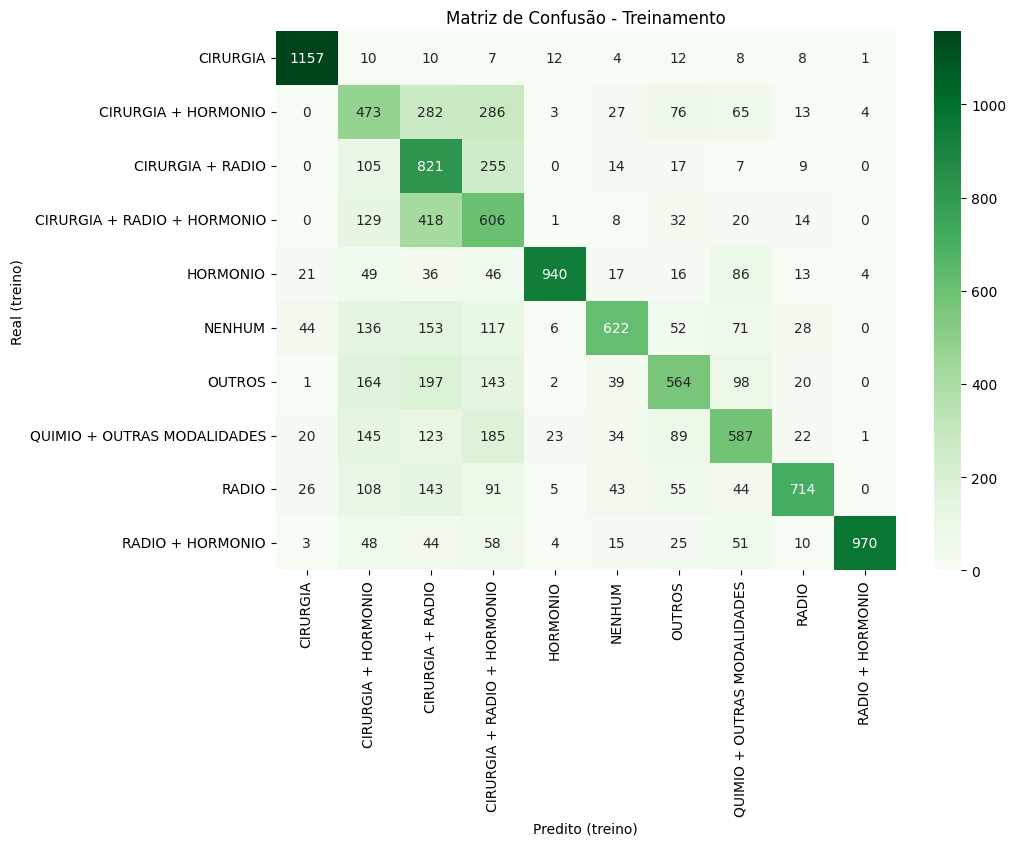

=== Relatório de Classificação (Teste) ===
                             precision    recall  f1-score   support

                   CIRURGIA       0.90      0.92      0.91       526
        CIRURGIA + HORMONIO       0.26      0.27      0.26       526
           CIRURGIA + RADIO       0.28      0.53      0.36       527
CIRURGIA + RADIO + HORMONIO       0.26      0.39      0.31       527
                   HORMONIO       0.91      0.78      0.84       527
                     NENHUM       0.73      0.51      0.60       526
                     OUTROS       0.53      0.38      0.44       527
QUIMIO + OUTRAS MODALIDADES       0.51      0.42      0.46       526
                      RADIO       0.79      0.55      0.65       526
           RADIO + HORMONIO       0.97      0.75      0.84       527

                   accuracy                           0.55      5265
                  macro avg       0.61      0.55      0.57      5265
               weighted avg       0.61      0.55      0.57

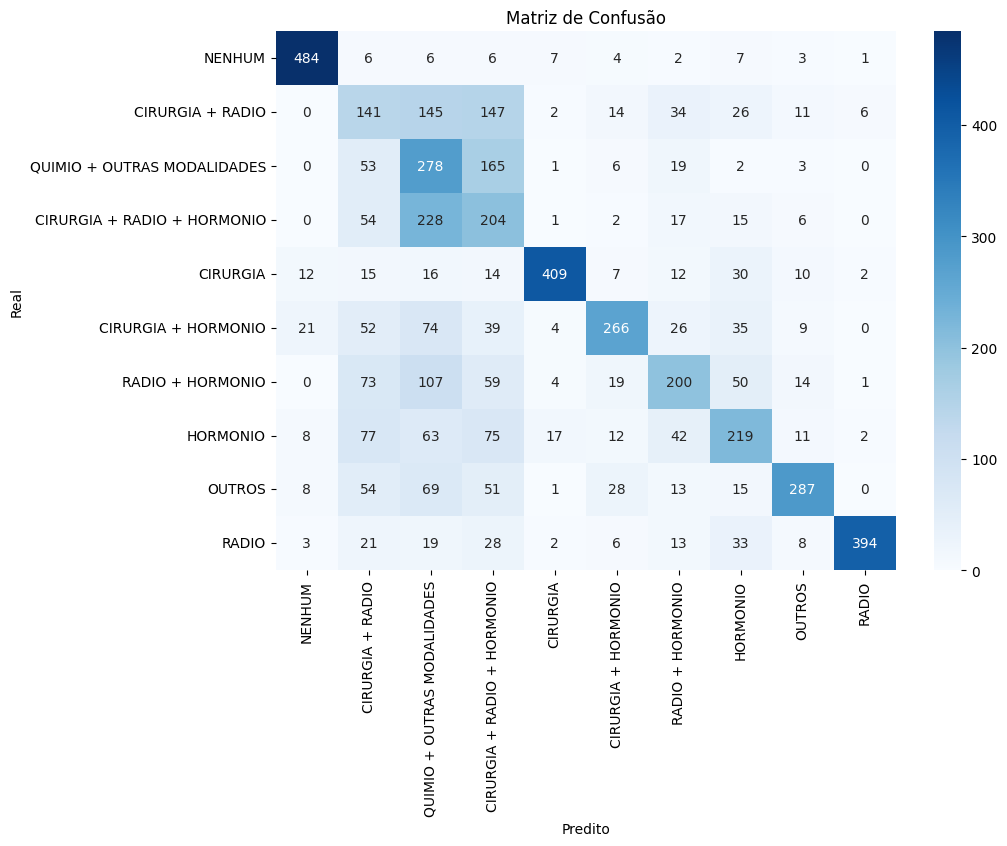

In [ ]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)

print("=== Relatório de Classificação (Treino) ===")
print(classification_report(y_train, y_train_pred))

cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.xlabel("Predito (treino)")
plt.ylabel("Real (treino)")
plt.title("Matriz de Confusão - Treinamento")
plt.show()

print("=== Relatório de Classificação (Teste) ===")
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

A regressão logística é um algoritmo de classificação que estima a probabilidade de uma observação pertencer a uma determinada classe. Ela faz isso aplicando uma função logística (sigmoide) que transforma uma combinação linear das variáveis de entrada em valores entre 0 e 1, representando uma probabilidade. A regressão logística para múltiplas classes é uma extensão da regressão logística binária, que permite classificar uma observação entre três ou mais categorias. O modelo considera todas as classes simultaneamente, calculando probabilidades relativas entre elas usando a função softmax, que generaliza a função sigmoide. Isso permite que a soma das probabilidades de todas as classes seja igual a 1, garantindo uma interpretação probabilística mais coerente em cenários com múltiplas categorias.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['CIRURGIA' 'CIRURGIA + HORMONIO' 'CIRURGIA + RADIO'
 'CIRURGIA + RADIO + HORMONIO' 'HORMONIO' 'NENHUM' 'OUTROS'
 'QUIMIO + OUTRAS MODALIDADES' 'RADIO' 'RADIO + HORMONIO']
=== Relatório de Classificação (Treino) ===
                             precision    recall  f1-score   support

                   CIRURGIA       0.98      0.95      0.96      1229
        CIRURGIA + HORMONIO       0.35      0.23      0.28      1229
           CIRURGIA + RADIO       0.37      0.64      0.47      1228
CIRURGIA + RADIO + HORMONIO       0.35      0.44      0.39      1228
                   HORMONIO       0.96      0.78      0.86      1228
                     NENHUM       0.68      0.55      0.61      1229
                     OUTROS       0.50      0.47      0.48      1228
QUIMIO + OUTRAS MODALIDADES       0.51      0.56      0.53      1229
                      RADIO       0.72      0.62      0.67      1229
           RADIO + HORMONIO       0.93      0.81      0.86      1228

                   accu

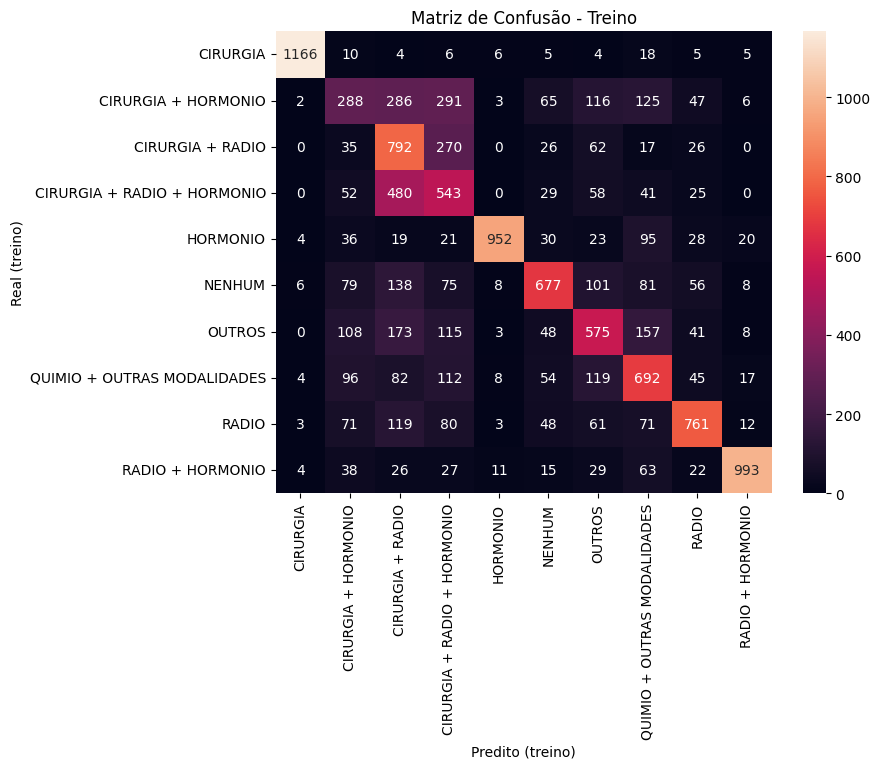

=== Relatório de Classificação (Teste) ===
                             precision    recall  f1-score   support

                   CIRURGIA       0.98      0.94      0.96       526
        CIRURGIA + HORMONIO       0.31      0.20      0.24       526
           CIRURGIA + RADIO       0.35      0.61      0.44       527
CIRURGIA + RADIO + HORMONIO       0.32      0.38      0.35       527
                   HORMONIO       0.94      0.81      0.87       527
                     NENHUM       0.66      0.53      0.59       526
                     OUTROS       0.46      0.45      0.46       527
QUIMIO + OUTRAS MODALIDADES       0.50      0.55      0.52       526
                      RADIO       0.71      0.61      0.65       526
           RADIO + HORMONIO       0.92      0.77      0.83       527

                   accuracy                           0.58      5265
                  macro avg       0.61      0.58      0.59      5265
               weighted avg       0.61      0.58      0.59

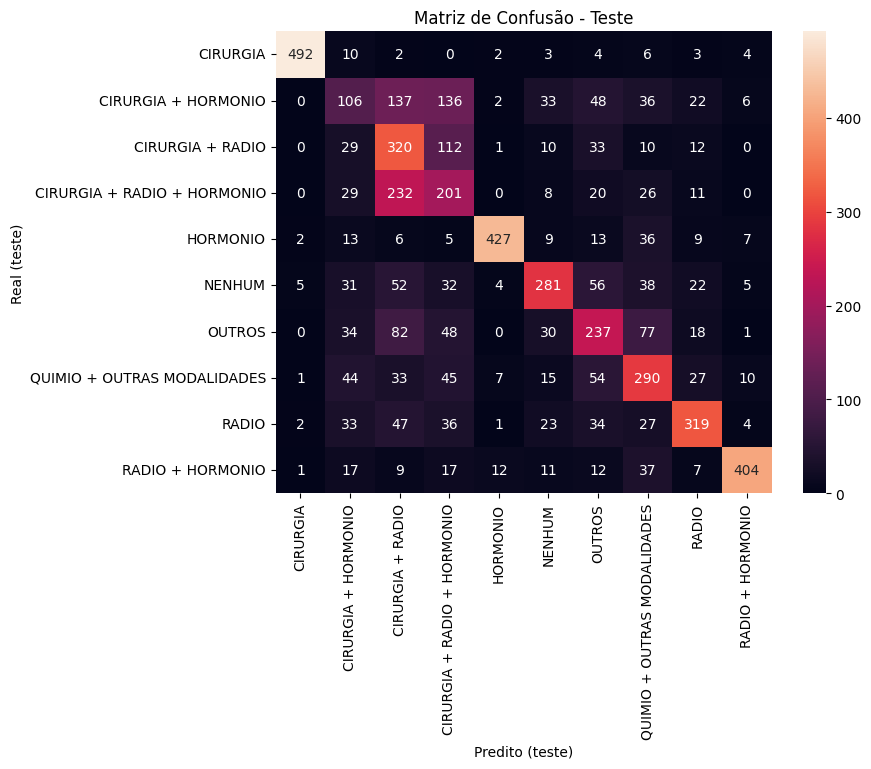

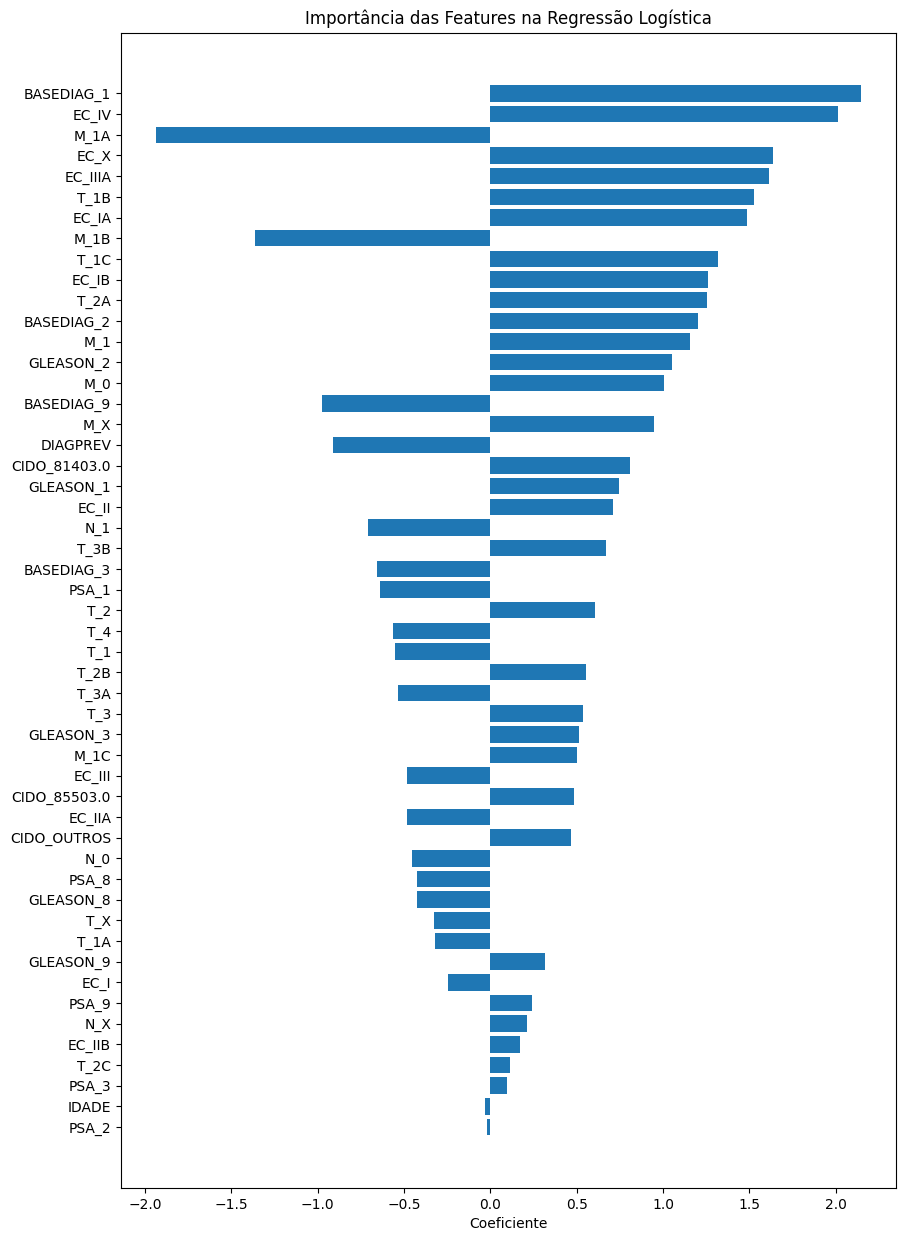

In [ ]:
logreg = LogisticRegression(
    solver='lbfgs',
    multi_class='auto',
    max_iter=1000,
    random_state=42
)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
print(logreg.classes_)
print("=== Relatório de Classificação (Treino) ===")
print(classification_report(y_train, y_train_pred))

cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_train, annot=True, fmt="d",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel("Predito (treino)")
plt.ylabel("Real (treino)")
plt.title("Matriz de Confusão - Treino")
plt.show()

y_test_pred = logreg.predict(X_test)
print("=== Relatório de Classificação (Teste) ===")
print(classification_report(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt="d",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel("Predito (teste)")
plt.ylabel("Real (teste)")
plt.title("Matriz de Confusão - Teste")
plt.show()

importance = logreg.coef_[0]

feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', key=abs, ascending=False)

plt.figure(figsize=(10, 15))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.xlabel('Coeficiente')
plt.title('Importância das Features na Regressão Logística')
plt.gca().invert_yaxis()
plt.show()

O DecisionTreeClassifier funciona construindo uma árvore de decisão onde, em cada nó, ocorre uma divisão dos dados com base na característica (feature) que oferece a melhor separação entre as classes. Essa divisão é feita utilizando critérios como Gini, Entropia (Information Gain) ou outros, que medem o grau de pureza dos grupos resultantes. A árvore continua se ramificando até que atinja um critério de parada, como profundidade máxima, número mínimo de amostras em um nó ou até que todos os dados em um nó pertençam à mesma classe. No momento da previsão, o algoritmo percorre a árvore a partir da raiz, seguindo os ramos de acordo com os valores das features até chegar a uma folha, que representa a classe atribuída àquela amostra.

=== Relatório de Classificação (Treino) ===
                             precision    recall  f1-score   support

                   CIRURGIA       0.99      0.96      0.97      1229
        CIRURGIA + HORMONIO       0.40      0.29      0.33      1229
           CIRURGIA + RADIO       0.29      0.79      0.43      1228
CIRURGIA + RADIO + HORMONIO       0.33      0.26      0.29      1228
                   HORMONIO       0.93      0.83      0.88      1228
                     NENHUM       0.83      0.55      0.66      1229
                     OUTROS       0.74      0.40      0.52      1228
QUIMIO + OUTRAS MODALIDADES       0.51      0.62      0.56      1229
                      RADIO       0.85      0.61      0.71      1229
           RADIO + HORMONIO       0.99      0.83      0.90      1228

                   accuracy                           0.61     12285
                  macro avg       0.69      0.61      0.63     12285
               weighted avg       0.69      0.61      0.6

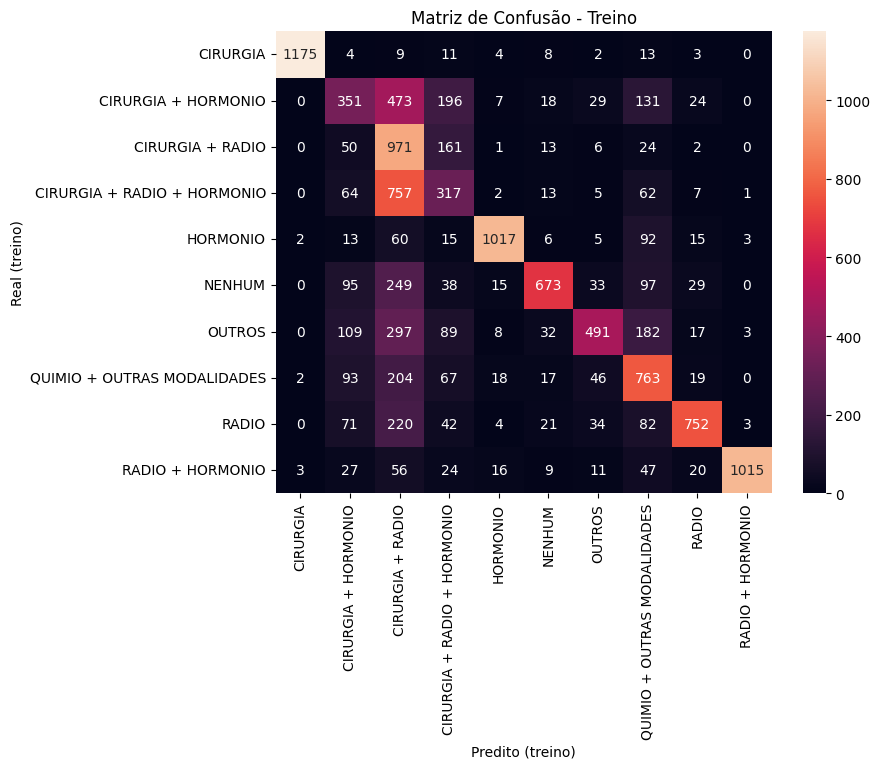

=== Relatório de Classificação (Teste) ===
                             precision    recall  f1-score   support

                   CIRURGIA       0.98      0.93      0.96       526
        CIRURGIA + HORMONIO       0.32      0.21      0.25       526
           CIRURGIA + RADIO       0.27      0.75      0.40       527
CIRURGIA + RADIO + HORMONIO       0.31      0.25      0.28       527
                   HORMONIO       0.90      0.82      0.86       527
                     NENHUM       0.78      0.51      0.62       526
                     OUTROS       0.62      0.32      0.43       527
QUIMIO + OUTRAS MODALIDADES       0.47      0.57      0.51       526
                      RADIO       0.80      0.58      0.67       526
           RADIO + HORMONIO       0.95      0.75      0.84       527

                   accuracy                           0.57      5265
                  macro avg       0.64      0.57      0.58      5265
               weighted avg       0.64      0.57      0.58

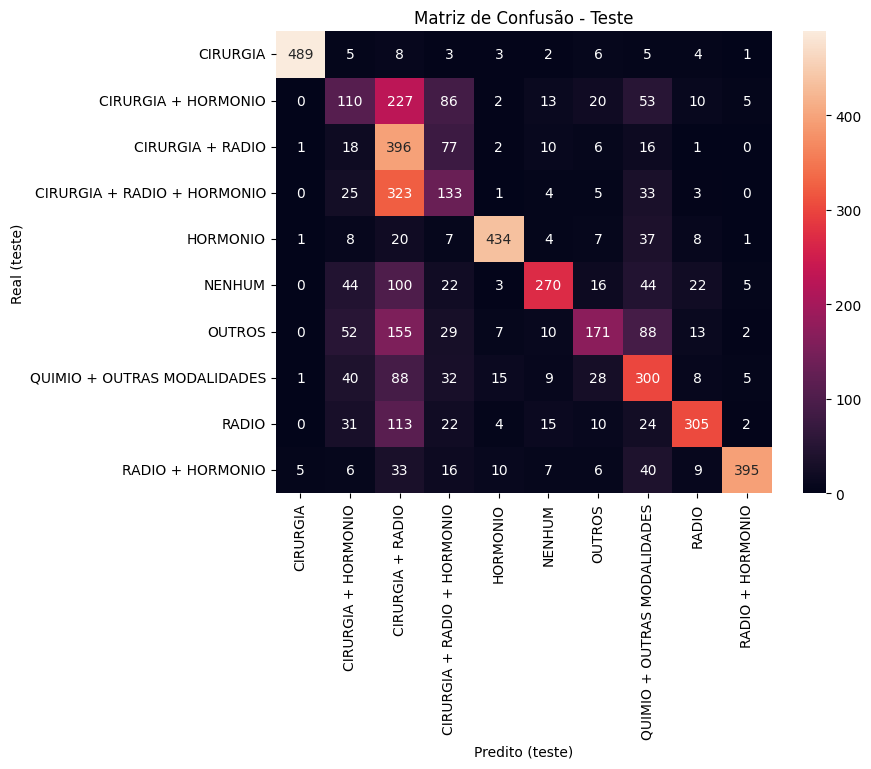

<ipython-input-66-8b09d7e82e7c>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


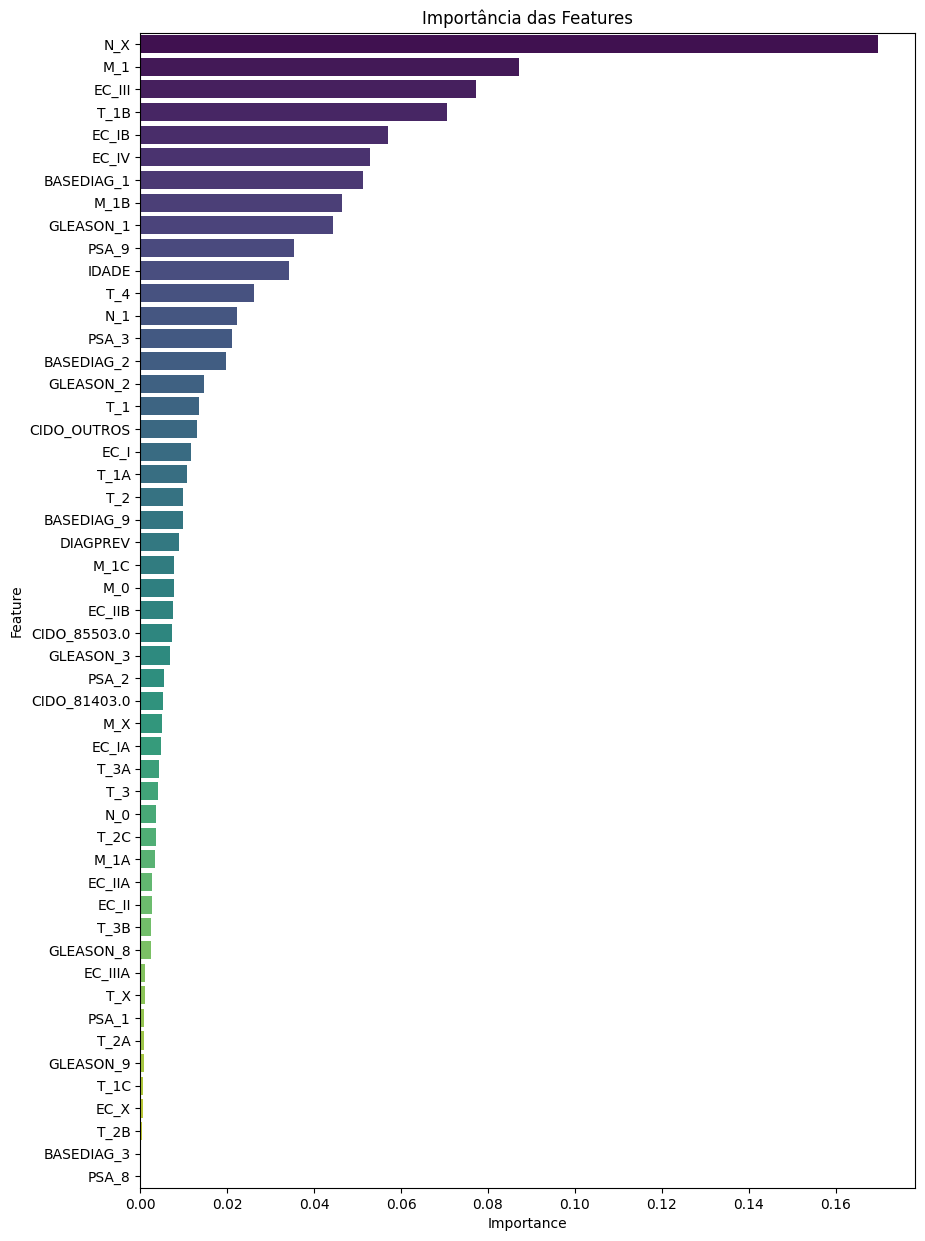

In [ ]:
dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    random_state=42
)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
print("=== Relatório de Classificação (Treino) ===")
print(classification_report(y_train, y_train_pred))

cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_train, annot=True, fmt="d",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel("Predito (treino)")
plt.ylabel("Real (treino)")
plt.title("Matriz de Confusão - Treino")
plt.show()

y_test_pred = dt.predict(X_test)
print("=== Relatório de Classificação (Teste) ===")
print(classification_report(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt="d",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel("Predito (teste)")
plt.ylabel("Real (teste)")
plt.title("Matriz de Confusão - Teste")
plt.show()

importances = dt.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,15))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")
plt.title('Importância das Features')
plt.show()

O funcionamento é baseado no Teorema de Bayes, considerando que todas as features são estatisticamente independentes entre si. O algoritmo calcula a probabilidade de uma amostra pertencer a cada classe com base na frequência das features observadas no conjunto de treinamento. A classe com a maior probabilidade é escolhida como previsão.

=== Relatório (Treino) ===
                             precision    recall  f1-score   support

                   CIRURGIA       0.70      0.95      0.81      1229
        CIRURGIA + HORMONIO       0.30      0.23      0.26      1229
           CIRURGIA + RADIO       0.31      0.68      0.43      1228
CIRURGIA + RADIO + HORMONIO       0.31      0.36      0.33      1228
                   HORMONIO       0.92      0.62      0.74      1228
                     NENHUM       0.80      0.43      0.56      1229
                     OUTROS       0.65      0.35      0.46      1228
QUIMIO + OUTRAS MODALIDADES       0.43      0.54      0.48      1229
                      RADIO       0.85      0.51      0.64      1229
           RADIO + HORMONIO       0.84      0.78      0.81      1228

                   accuracy                           0.55     12285
                  macro avg       0.61      0.55      0.55     12285
               weighted avg       0.61      0.55      0.55     12285



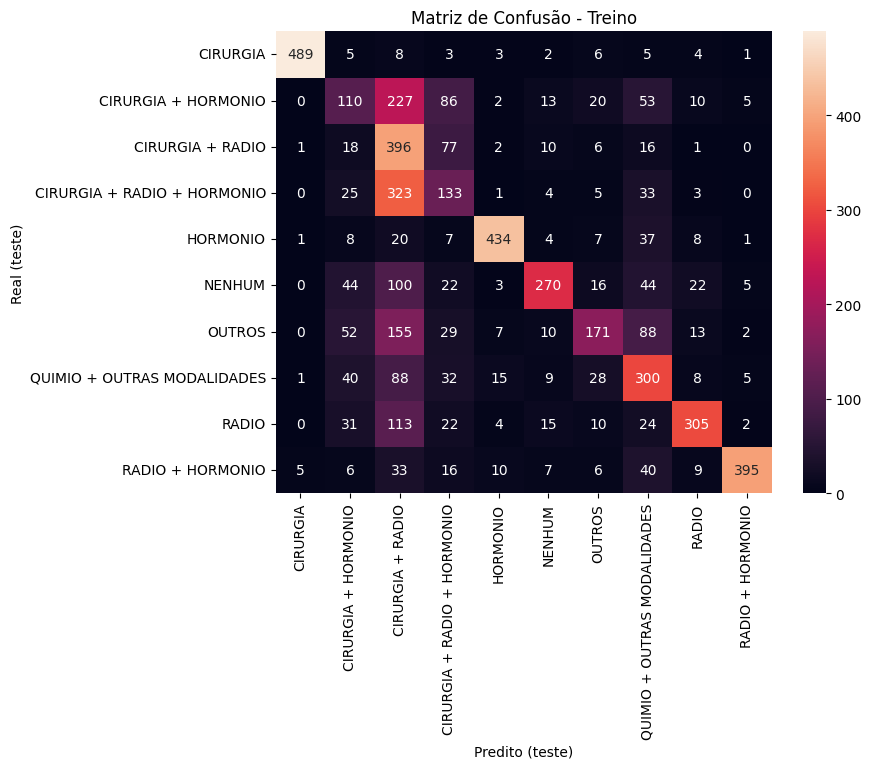

=== Relatório (Teste) ===
                             precision    recall  f1-score   support

                   CIRURGIA       0.68      0.93      0.79       526
        CIRURGIA + HORMONIO       0.28      0.21      0.24       526
           CIRURGIA + RADIO       0.30      0.65      0.41       527
CIRURGIA + RADIO + HORMONIO       0.29      0.35      0.32       527
                   HORMONIO       0.93      0.63      0.75       527
                     NENHUM       0.81      0.45      0.58       526
                     OUTROS       0.63      0.33      0.43       527
QUIMIO + OUTRAS MODALIDADES       0.44      0.56      0.50       526
                      RADIO       0.83      0.51      0.63       526
           RADIO + HORMONIO       0.82      0.74      0.78       527

                   accuracy                           0.53      5265
                  macro avg       0.60      0.53      0.54      5265
               weighted avg       0.60      0.53      0.54      5265



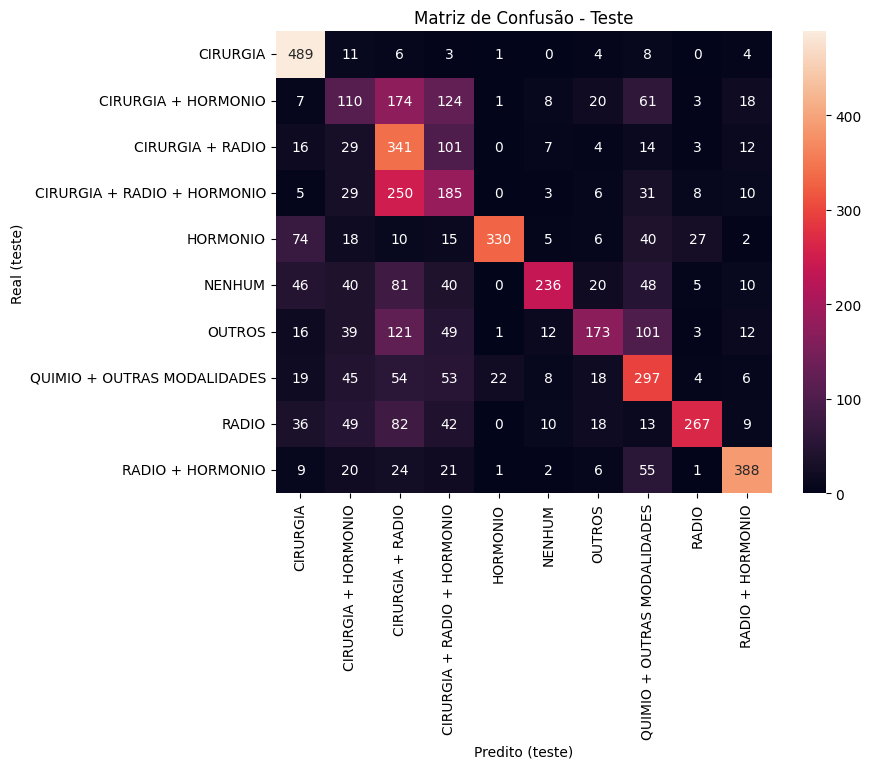

In [ ]:
scaler = MinMaxScaler()
X_train_nb = scaler.fit_transform(X_train)
X_test_nb  = scaler.transform(X_test)

mnb = MultinomialNB()
mnb.fit(X_train_nb, y_train)

y_train_pred = mnb.predict(X_train_nb)
print("=== Relatório (Treino) ===")
print(classification_report(y_train, y_train_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt="d",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel("Predito (teste)")
plt.ylabel("Real (teste)")
plt.title("Matriz de Confusão - Treino")
plt.show()

y_test_pred = mnb.predict(X_test_nb)
print("=== Relatório (Teste) ===")
print(classification_report(y_test, y_test_pred))
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt="d",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel("Predito (teste)")
plt.ylabel("Real (teste)")
plt.title("Matriz de Confusão - Teste")
plt.show()

 O RandomForestClassifier funciona construindo várias árvores de decisão (Decision Trees), onde cada árvore é treinada com um subconjunto aleatório dos dados e também com um subconjunto aleatório das features em cada divisão dos nós. Esse processo de aleatoriedade ajuda a reduzir o problema de overfitting, comum em árvores individuais. No momento da previsão, cada árvore faz sua própria classificação e, então, o modelo final escolhe a classe mais votada (maioria) entre todas as árvores. A ideia central é que um conjunto de modelos fracos (árvores simples) se combina para formar um modelo forte, mais robusto e preciso.

=== Relatório de Classificação (Treino) ===
                             precision    recall  f1-score   support

                   CIRURGIA       1.00      0.96      0.98      1229
        CIRURGIA + HORMONIO       0.52      0.28      0.37      1229
           CIRURGIA + RADIO       0.32      0.81      0.46      1228
CIRURGIA + RADIO + HORMONIO       0.34      0.42      0.37      1228
                   HORMONIO       1.00      0.81      0.89      1228
                     NENHUM       0.92      0.55      0.69      1229
                     OUTROS       0.75      0.48      0.58      1228
QUIMIO + OUTRAS MODALIDADES       0.53      0.68      0.60      1229
                      RADIO       0.99      0.60      0.74      1229
           RADIO + HORMONIO       1.00      0.82      0.90      1228

                   accuracy                           0.64     12285
                  macro avg       0.74      0.64      0.66     12285
               weighted avg       0.74      0.64      0.6

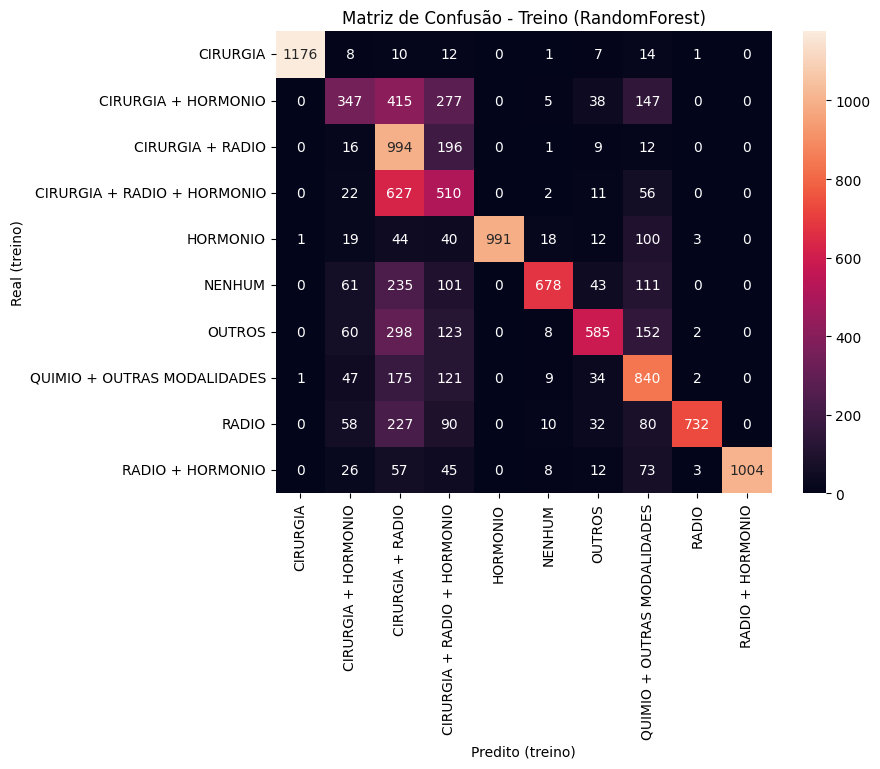

=== Relatório de Classificação (Teste) ===
                             precision    recall  f1-score   support

                   CIRURGIA       1.00      0.94      0.96       526
        CIRURGIA + HORMONIO       0.37      0.17      0.24       526
           CIRURGIA + RADIO       0.28      0.73      0.41       527
CIRURGIA + RADIO + HORMONIO       0.28      0.37      0.32       527
                   HORMONIO       0.99      0.81      0.89       527
                     NENHUM       0.87      0.52      0.65       526
                     OUTROS       0.64      0.37      0.47       527
QUIMIO + OUTRAS MODALIDADES       0.48      0.65      0.55       526
                      RADIO       0.97      0.56      0.71       526
           RADIO + HORMONIO       0.99      0.76      0.86       527

                   accuracy                           0.59      5265
                  macro avg       0.69      0.59      0.61      5265
               weighted avg       0.69      0.59      0.61

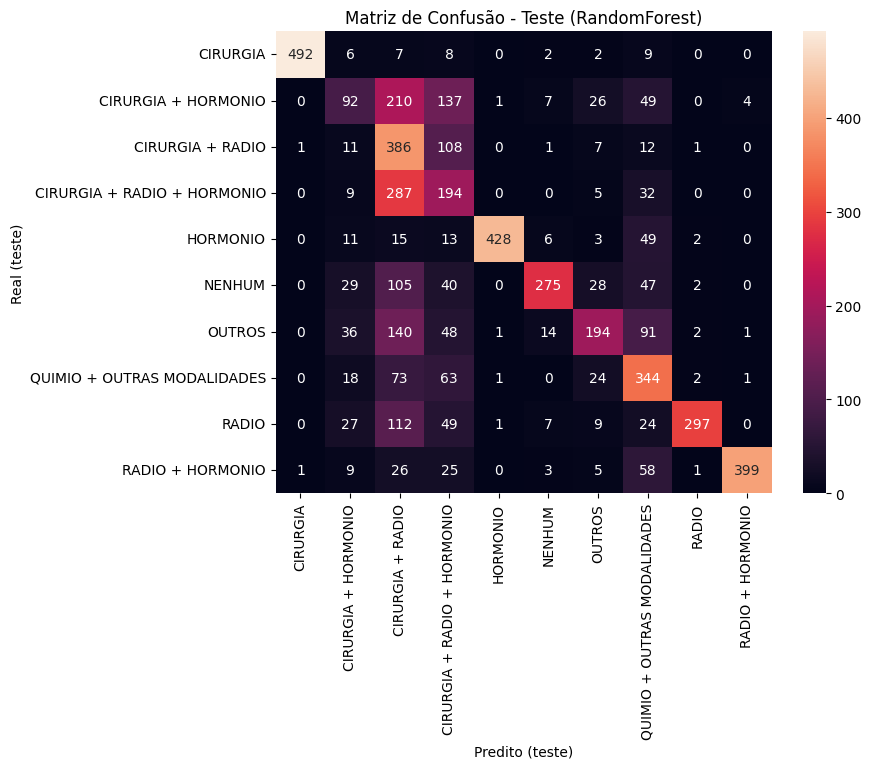

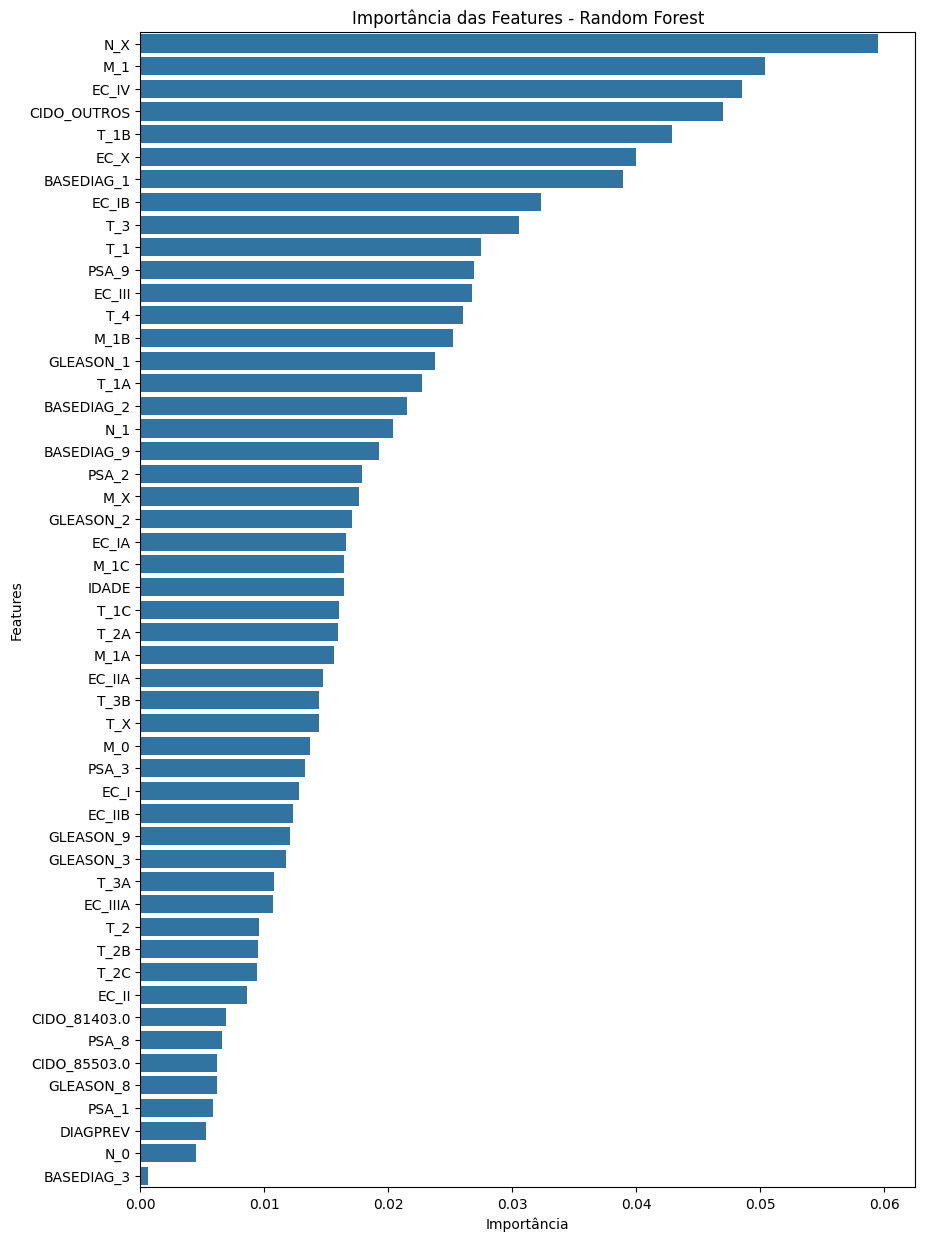

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
print("=== Relatório de Classificação (Treino) ===")
print(classification_report(y_train, y_train_pred))

cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_train, annot=True, fmt="d",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel("Predito (treino)")
plt.ylabel("Real (treino)")
plt.title("Matriz de Confusão - Treino (RandomForest)")
plt.show()

y_test_pred = rf.predict(X_test)
print("=== Relatório de Classificação (Teste) ===")
print(classification_report(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt="d",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.xlabel("Predito (teste)")
plt.ylabel("Real (teste)")
plt.title("Matriz de Confusão - Teste (RandomForest)")
plt.show()

importances = rf.feature_importances_

feature_names = X_train.columns
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,15))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Importância das Features - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()

In [ ]:
le = LabelEncoder()
df_res['TRATAMENTO_ENC'] = le.fit_transform(df_res['TRATAMENTO'])
print("Mapeamento tratamento → código:",
      dict(zip(le.classes_, le.transform(le.classes_))))

X_columns = df_res.columns.tolist()
X_columns.remove('TRATAMENTO')
X_columns.remove('TRATAMENTO_ENC')

X = df_res[X_columns]
y = df_res['TRATAMENTO_ENC']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Distribuição no treino:", Counter(y_train))
print("Distribuição no teste:", Counter(y_test))

Mapeamento tratamento → código: {'CIRURGIA': np.int64(0), 'CIRURGIA + HORMONIO': np.int64(1), 'CIRURGIA + RADIO': np.int64(2), 'CIRURGIA + RADIO + HORMONIO': np.int64(3), 'HORMONIO': np.int64(4), 'NENHUM': np.int64(5), 'OUTROS': np.int64(6), 'QUIMIO + OUTRAS MODALIDADES': np.int64(7), 'RADIO': np.int64(8), 'RADIO + HORMONIO': np.int64(9)}
Distribuição no treino: Counter({5: 1229, 7: 1229, 1: 1229, 0: 1229, 8: 1229, 6: 1228, 4: 1228, 2: 1228, 3: 1228, 9: 1228})
Distribuição no teste: Counter({4: 527, 9: 527, 6: 527, 2: 527, 3: 527, 5: 526, 0: 526, 7: 526, 8: 526, 1: 526})


O XGBClassifier funciona construindo árvores de decisão de forma sequencial, onde cada nova árvore tenta corrigir os erros cometidos pelas árvores anteriores. Em vez de simplesmente votar, como no Random Forest, o XGBoost soma as previsões das árvores anteriores, ajustando-se para reduzir o erro residual. Ele utiliza uma técnica chamada gradiente descendente para minimizar uma função de perda, melhorando progressivamente o modelo. Além disso, é altamente eficiente por conta de otimizações como paralelização, regularização (para evitar overfitting), tratamento eficiente de dados faltantes e uso inteligente de memória.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:06:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== Relatório (Treino) ===
                             precision    recall  f1-score   support

                   CIRURGIA       1.00      0.95      0.98      1229
        CIRURGIA + HORMONIO       0.48      0.27      0.35      1229
           CIRURGIA + RADIO       0.37      0.73      0.49      1228
CIRURGIA + RADIO + HORMONIO       0.34      0.43      0.38      1228
                   HORMONIO       0.98      0.82      0.89      1228
                     NENHUM       0.79      0.58      0.67      1229
                     OUTROS       0.57      0.51      0.54      1228
QUIMIO + OUTRAS MODALIDADES       0.53      0.65      0.59      1229
                      RADIO       0.86      0.62      0.72      1229
           RADIO + HORMONIO       1.00      0.81      0.90      1228

                   accuracy                           0.64     12285
                  macro avg       0.69      0.64      0.65     12285
               weighted avg       0.69      0.64      0.65     12285



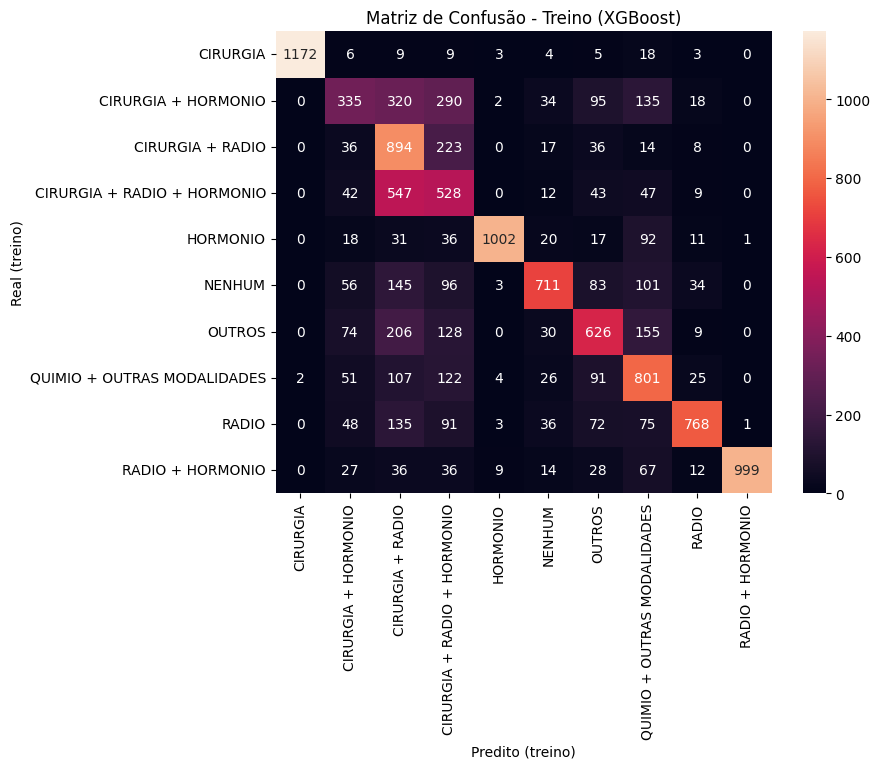

=== Relatório (Teste) ===
                             precision    recall  f1-score   support

                   CIRURGIA       0.99      0.94      0.96       526
        CIRURGIA + HORMONIO       0.40      0.20      0.27       526
           CIRURGIA + RADIO       0.34      0.69      0.46       527
CIRURGIA + RADIO + HORMONIO       0.27      0.37      0.32       527
                   HORMONIO       0.95      0.82      0.88       527
                     NENHUM       0.74      0.56      0.63       526
                     OUTROS       0.51      0.44      0.47       527
QUIMIO + OUTRAS MODALIDADES       0.49      0.60      0.54       526
                      RADIO       0.84      0.59      0.69       526
           RADIO + HORMONIO       0.98      0.76      0.86       527

                   accuracy                           0.60      5265
                  macro avg       0.65      0.60      0.61      5265
               weighted avg       0.65      0.60      0.61      5265



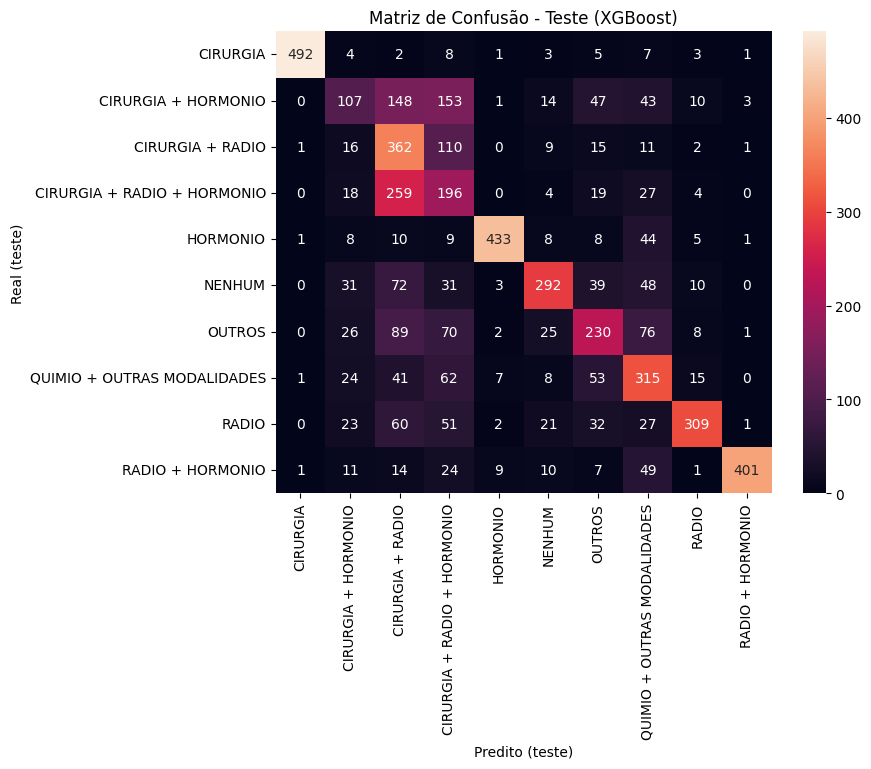

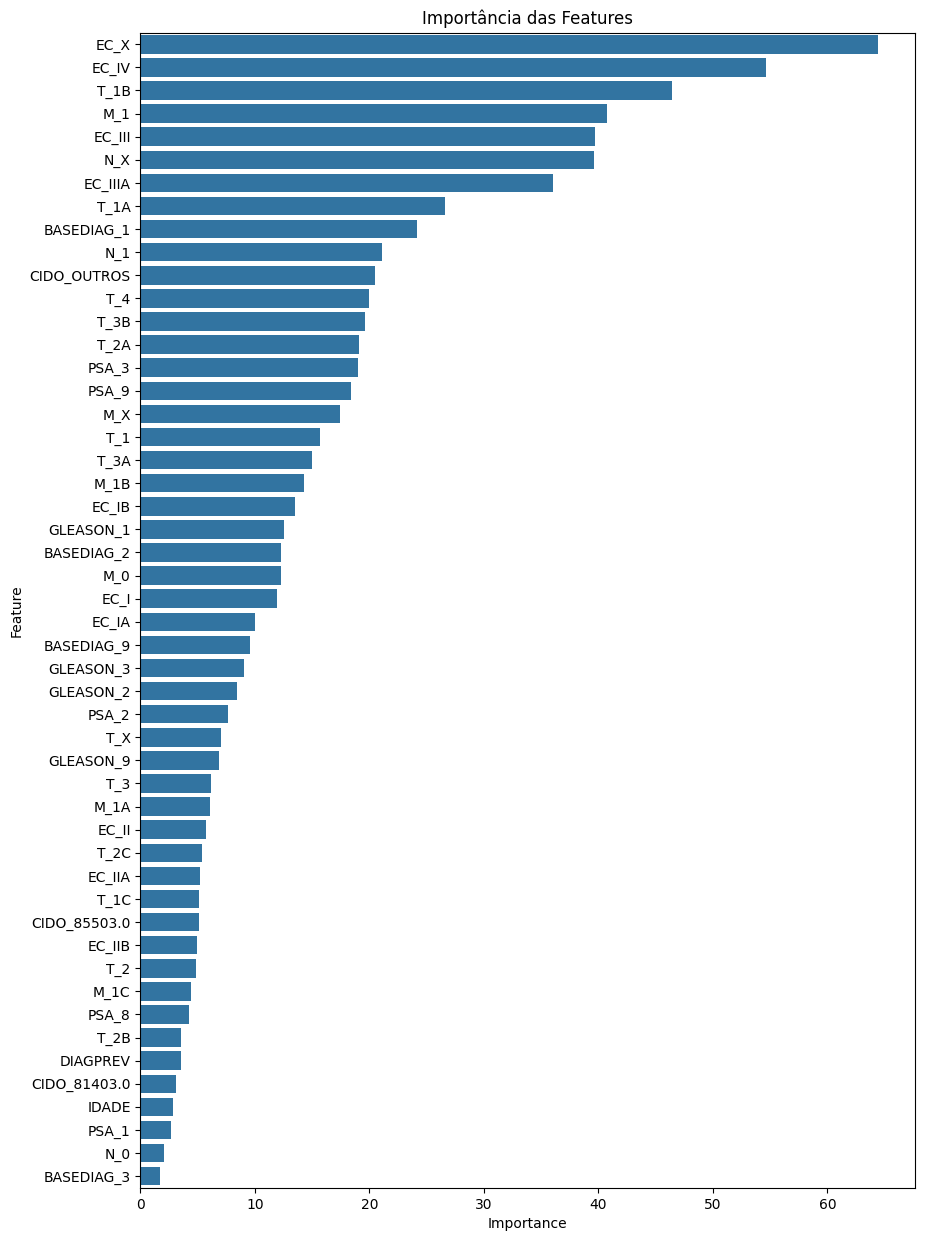

In [ ]:
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    objective='multi:softprob',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
    n_jobs=-1
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

y_train_pred = xgb.predict(X_train)
print("=== Relatório (Treino) ===")
print(classification_report(y_train, y_train_pred, target_names=le.classes_))

cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_train, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predito (treino)")
plt.ylabel("Real (treino)")
plt.title("Matriz de Confusão - Treino (XGBoost)")
plt.show()

y_test_pred = xgb.predict(X_test)
print("=== Relatório (Teste) ===")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predito (teste)")
plt.ylabel("Real (teste)")
plt.title("Matriz de Confusão - Teste (XGBoost)")
plt.show()

importance = xgb.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,15))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df
)

plt.title('Importância das Features')
plt.show()

Em síntese, a performance dos modelos variou entre 53% e 60% de acurácia, apresentando melhor desempenho na identificação de classes de tratamento únicas ou mais representadas antes do balanceamento, como CIRURGIA, HORMONIO, RADIO e RADIO + HORMONIO. Por outro lado, os modelos enfrentaram maior dificuldade em predizer rótulos que envolvem combinações de tratamentos menos frequentes, como CIRURGIA + HORMÔNIO, CIRURGIA + RADIOTERAPIA e CIRURGIA + RADIOTERAPIA + HORMÔNIO.

Em continuidade, modelos baseados em ensembles de árvores apresentaram melhor desempenho, com destaque para o XGBoost, seguido pela Floresta Aleatória, por lidarem melhor com variáveis categóricas e múltiplas colunas. Em contrapartida, algoritmos como KNN e Naive Bayes obtiveram resultados inferiores, possivelmente por serem mais sensíveis ao aumento da dimensionalidade dos dados.
Apesar dos avanços, a performance dos modelos ainda é considerada insatisfatória para aplicação direta em contextos clínicos.

Como próximos passos, sugere-se o estudo e a implementação de uma arquitetura de Rede Neural que possa capturar padrões mais complexos nos dados. Além disso, etapas anteriores de análise e pré-processamento devem ser reavaliadas, a fim de extrair novas percepções, assim como é recomendada a busca por bases de dados adicionais que complementem as classes com menor representatividade.

Concluiu-se, assim, o escopo previsto para o projeto, incluindo análise exploratória, pré-processamento dos dados, treinamento dos modelos e avaliação por métricas. Com as melhorias sugeridas, espera-se que o sistema possa futuramente auxiliar profissionais da saúde na sugestão de tratamentos, oferecendo apoio à decisão médica por meio da análise de grandes volumes de informações complexas, contribuindo para novos insights.

Dessa forma, almeja-se um tratamento mais assertivo, aumentando as chances de sucesso terapêutico, reduzindo efeitos colaterais decorrentes de intervenções excessivas ou ineficazes, e promovendo uma melhor qualidade de vida para os pacientes, familiares, amigos e demais envolvidos no processo.
